# House Price Prediction Regression Project

# Load module / Libraries  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler
sns.set()

# Load data

In [2]:
train_data_path=r"C:\Users\CHAYAN GHOSH\OneDrive\Desktop\house price prediction project\data\train (1).csv"
test_data_path=r"C:\Users\CHAYAN GHOSH\OneDrive\Desktop\house price prediction project\data\test (1).csv"

df_train=pd.read_csv(train_data_path)
df_test=pd.read_csv(test_data_path)
df=pd.read_csv(train_data_path)

print("Shape of df_train ",df_train.shape)
# print("Shape of df_test ",df_test.shape)


Shape of df_train  (1460, 81)


In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
# df_test.head()

# Data integration

In [6]:
# df=pd.concat([df_train,df_test])
# print("Shape of integrated Data/df",df.shape)

In [7]:
# df.head()

In [8]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
int_feature=df.select_dtypes(include=["int64"]).columns
print("Total number of integer feature : ", int_feature.shape[0])
print("Integer feature names: ", int_feature)

Total number of integer feature :  35
Integer feature names:  Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [11]:
float_feature=df.select_dtypes(include=["float64"]).columns
print("Total number of float feature : ", float_feature.shape[0])
print("float feature names: ", float_feature)

Total number of float feature :  3
float feature names:  Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [12]:
cat_feature=df.select_dtypes(include=["object"]).columns
print("Total number of cat feature : ", cat_feature.shape[0])
print("cat feature names: ", cat_feature)

Total number of cat feature :  43
cat feature names:  Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


# Get the Statistical in formation of Numerical Features

In [13]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [14]:
df.describe().shape

(8, 38)

# Handeling the Missing value 
# Visualise null / Misiing value

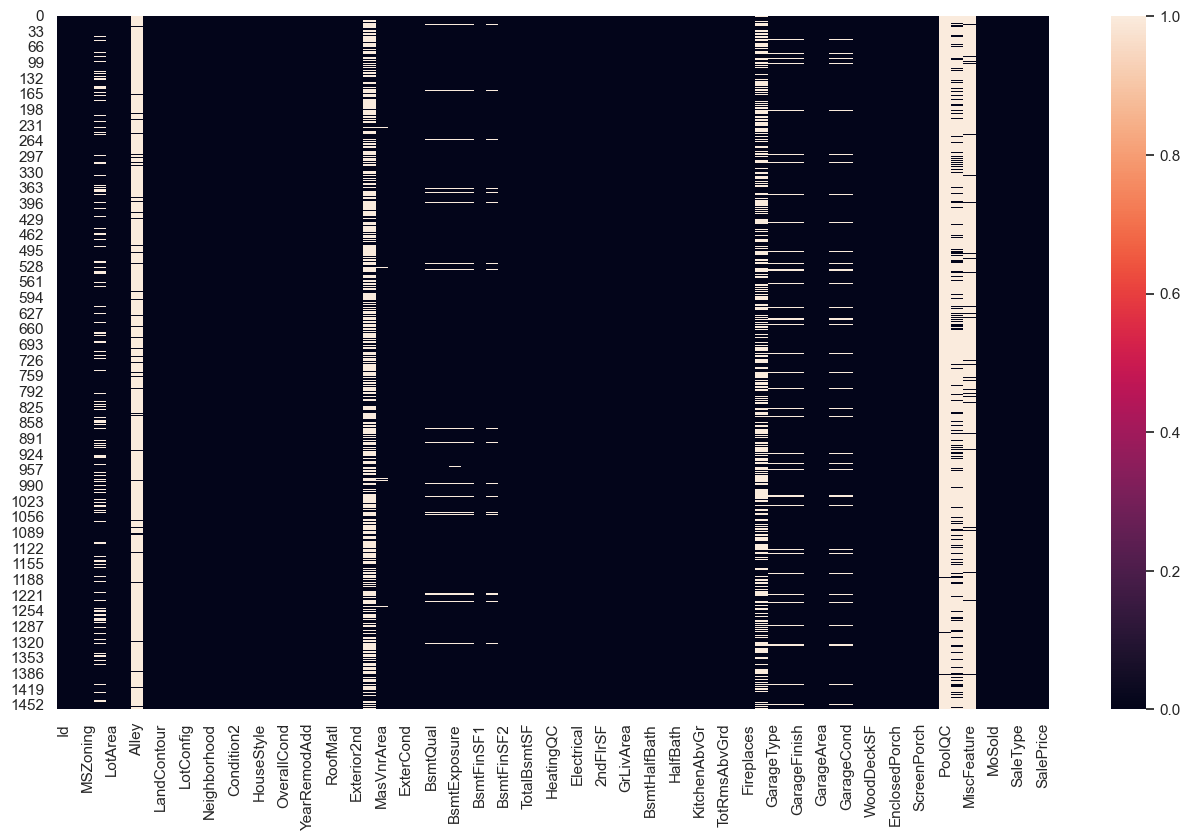

In [15]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("C:/Users/CHAYAN GHOSH/OneDrive/Desktop/house price prediction project/EDA_img/heatmap_Df_of_null_values.png")

# Get the Null value percentage for every feature 

In [16]:
df=df.set_index("Id")

In [17]:
null_count=df.isnull().sum()
null_count

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [18]:
null_percent=null_count/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

# Drop columns/Features

In [19]:
miss_value_50_perc=null_percent[null_percent >50]
miss_value_50_perc

Alley          93.767123
MasVnrType     59.726027
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64

In [20]:
df.drop('PoolQC', axis=1, inplace=True)

In [21]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [22]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [23]:
miss_value_20_50_perc=null_percent[(null_percent >20) & (null_percent <50)]
miss_value_20_50_perc

FireplaceQu    47.260274
dtype: float64

In [24]:
miss_value_5_20_perc=null_percent[(null_percent >5) & (null_percent <20)]
miss_value_5_20_perc

LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

In [25]:
df['LotFrontage'].value_counts().head()

LotFrontage
60.0    143
70.0     70
80.0     69
50.0     57
75.0     53
Name: count, dtype: int64

<Axes: ylabel='Id'>

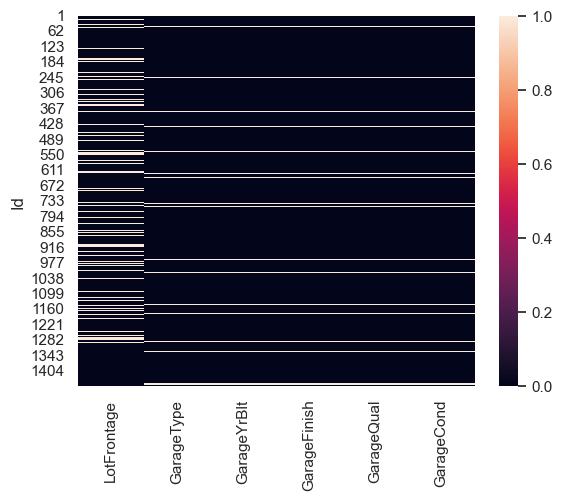

In [26]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

# Missing Value imputation

In [27]:
missing_value_fature=null_percent[null_percent >0]
print("Number of misiing value fature",len(missing_value_fature))

Number of misiing value fature 19


In [28]:
missing_value_fature

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [29]:
cat_missing_feature=missing_value_fature[missing_value_fature.keys().isin(cat_feature)]
print("Total number of catagorical missing feature",len(cat_missing_feature))

Total number of catagorical missing feature 16


In [30]:
cat_missing_feature


Alley           93.767123
MasVnrType      59.726027
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [31]:
numerical_missing_feature = missing_value_fature[~missing_value_fature.keys().isin(cat_feature)]

print("Total number of Numerical missing feature",len(numerical_missing_feature))

Total number of Numerical missing feature 3


In [32]:
numerical_missing_feature

LotFrontage    17.739726
MasVnrArea      0.547945
GarageYrBlt     5.547945
dtype: float64

# Handeling MSZoning =0.137033

In [33]:
df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

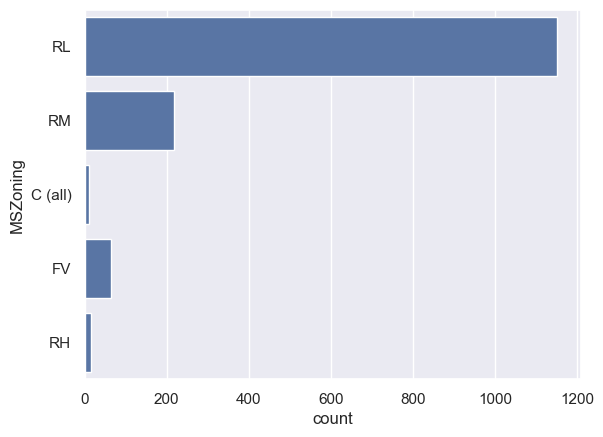

In [34]:
sns.countplot(df["MSZoning"])

In [35]:
mszoning_mode=df["MSZoning"].mode()[0]
mszoning_mode

'RL'

In [36]:
## backup
df_mvi=df.copy()

In [37]:
# df_mvi["MSZoning"].replace(np.nan,mszoning_mode,inplace=True)

In [38]:
def old_new_CountPlot (df,df_new,feature):
    plt.subplot(121)
    sns.countplot(df[feature])
    plt.title("Old Data Distribution")
    plt.subplot(122)
    sns.countplot(df_new[feature])
    plt.title("New Data Distribution")
    

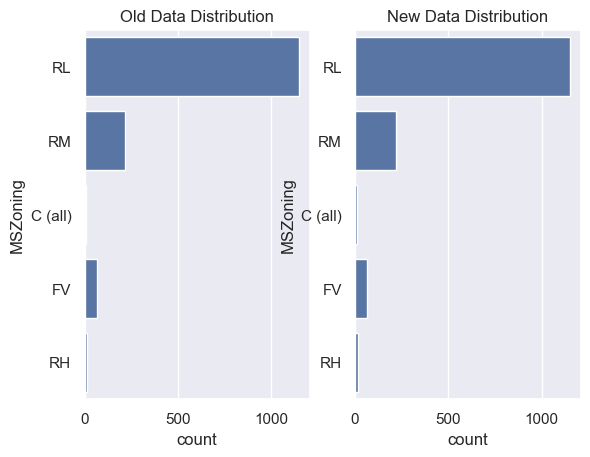

In [39]:
old_new_CountPlot (df,df_mvi,"MSZoning")

# Handeling Alley=93.216855

In [40]:
df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [41]:
alley_count ="NA"
df_mvi["Alley"].replace(np.nan,alley_count,inplace=True)
df_mvi["Alley"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\1549213823.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Alley"].replace(np.nan,alley_count,inplace=True)


0

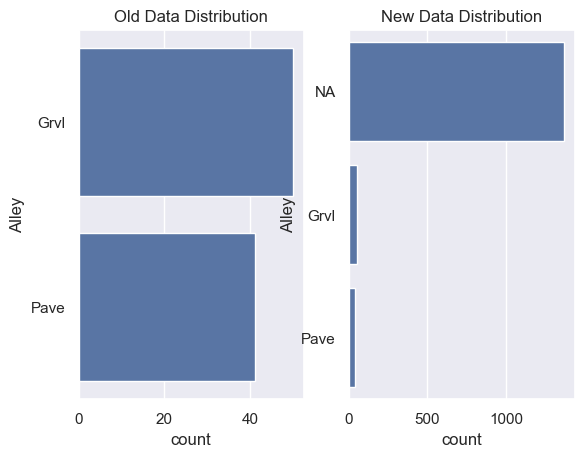

In [42]:
old_new_CountPlot (df,df_mvi,"Alley")

## HAndling LotFrontage = 16.649538

In [43]:

def boxHistPlot(df,figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.histplot(df, kde=True)

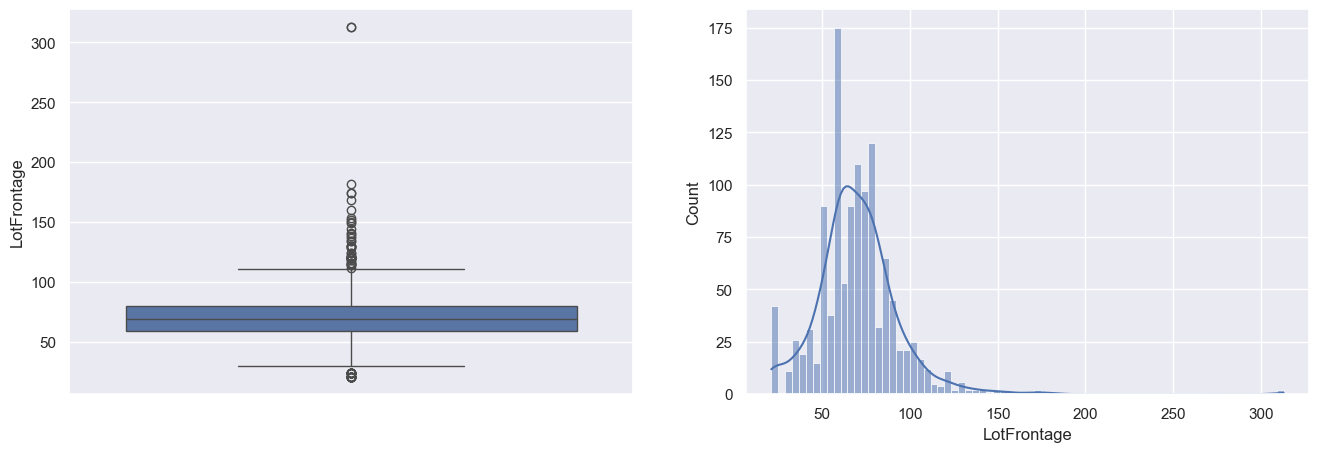

In [44]:
boxHistPlot(df["LotFrontage"])

In [45]:
lotfrontage_mean=df["LotFrontage"].mean()
lotfrontage_mean

70.04995836802665

In [46]:
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace=True)
df_mvi["LotFrontage"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\2171727899.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean, inplace=True)


0

In [47]:
def old_new_boxhistPlot (df,df_new,feature,figsize=(16,8)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title("Old Data Distribution")
    plt.subplot(222)
    sns.histplot(df[feature], kde=True)
    plt.title("Old Data Distribution")

    
    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title("New Data Distribution")
    plt.subplot(224)
    sns.histplot(df[feature], kde=True)
    plt.title("New Data Distribution")

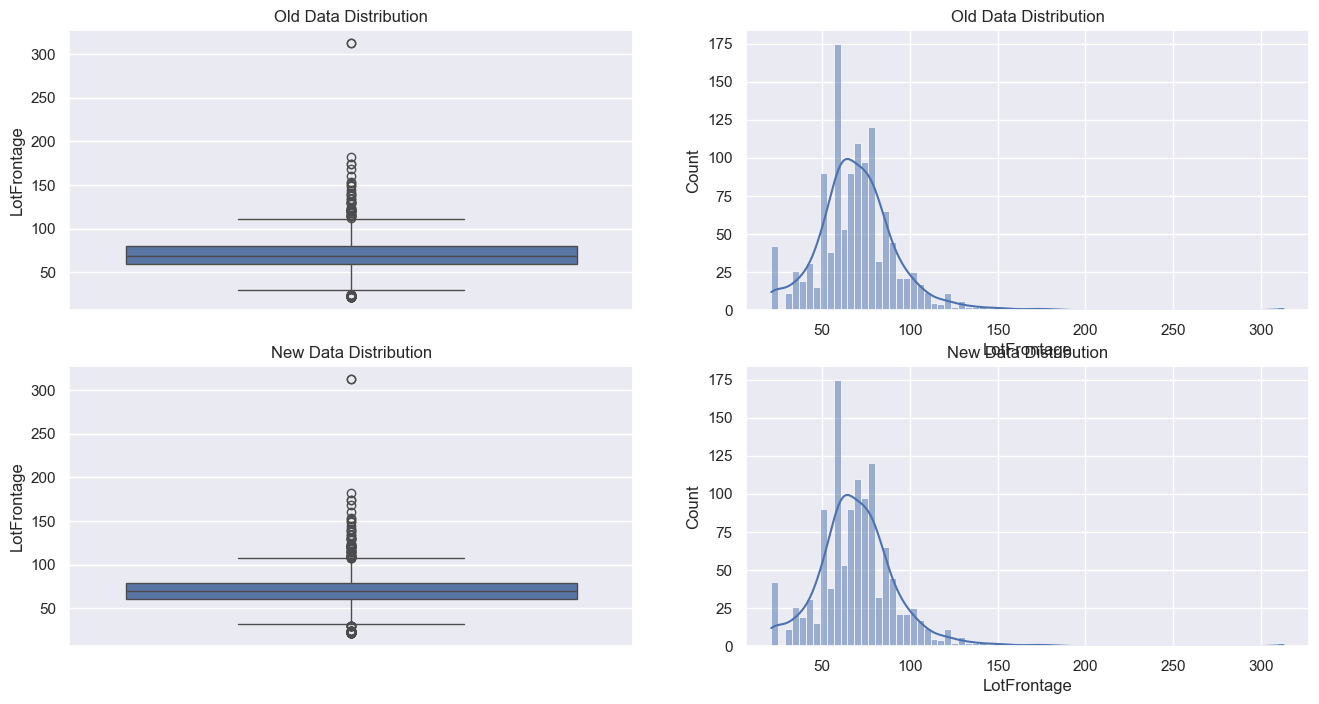

In [48]:
old_new_boxhistPlot(df,df_mvi,"LotFrontage")

## handelling Utilities=0.068517

<Axes: xlabel='count', ylabel='Utilities'>

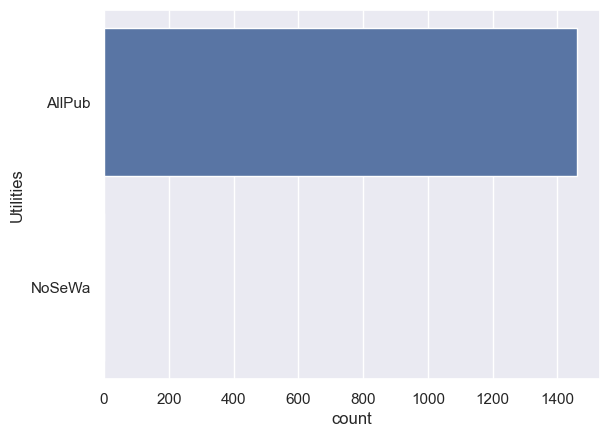

In [49]:
sns.countplot(df["Utilities"])

In [50]:
df["Utilities"].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [51]:
Utilities_mode=df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, Utilities_mode, inplace=True)
df_mvi["Utilities"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\3994162748.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan, Utilities_mode, inplace=True)


0

## Exterior1st=0.034258
## Exterior2nd =0.034258

In [52]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [53]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [54]:
Exterior1st_mode=df["Exterior1st"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, Exterior1st_mode, inplace=True)
df_mvi["Exterior1st"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\3739335752.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan, Exterior1st_mode, inplace=True)


0

In [55]:
Exterior2nd_mode=df["Exterior2nd"].mode()[0]
df_mvi["Exterior2nd"].replace(np.nan, Exterior2nd_mode, inplace=True)
df_mvi["Exterior2nd"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\2128098003.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior2nd"].replace(np.nan, Exterior2nd_mode, inplace=True)


0

## Handeling MasVnrType = 60.500171 and MasVnrArea = 0.787941

In [56]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [57]:
df["MasVnrType"].head(8)

Id
1    BrkFace
2        NaN
3    BrkFace
4        NaN
5    BrkFace
6        NaN
7      Stone
8      Stone
Name: MasVnrType, dtype: object

In [58]:
MasVnrType_count="NA"
df_mvi["MasVnrType"].replace(np.nan,MasVnrType_count,inplace=True)
df_mvi["MasVnrType"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\2771846150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrType"].replace(np.nan,MasVnrType_count,inplace=True)


0

In [59]:
df_mvi["MasVnrType"].head(8)

Id
1    BrkFace
2         NA
3    BrkFace
4         NA
5    BrkFace
6         NA
7      Stone
8      Stone
Name: MasVnrType, dtype: object

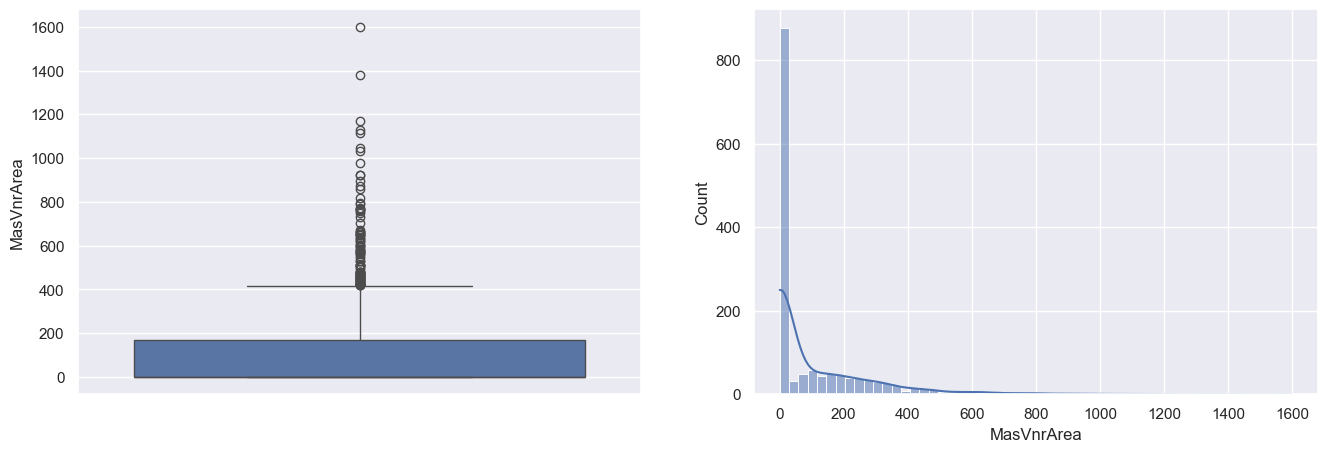

In [60]:
boxHistPlot(df["MasVnrArea"])

In [61]:
MasVnrArea_count=0
df_mvi["MasVnrArea"].replace(np.nan,MasVnrArea_count,inplace=True)
df_mvi["MasVnrArea"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\654781767.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["MasVnrArea"].replace(np.nan,MasVnrArea_count,inplace=True)


0

# handelling all bsmt feature
'''cat_bsmt_feature=["BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2"]    

num_bsmt_feat=["BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"BsmtFullBath",
"BsmtHalfBath"]'''

In [62]:
cat_bsmt_feature=["BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2"]    

num_bsmt_feat=["BsmtFinSF1",
"BsmtFinSF2",
"BsmtUnfSF",
"TotalBsmtSF",
"BsmtFullBath",
"BsmtHalfBath"]

<Axes: ylabel='Id'>

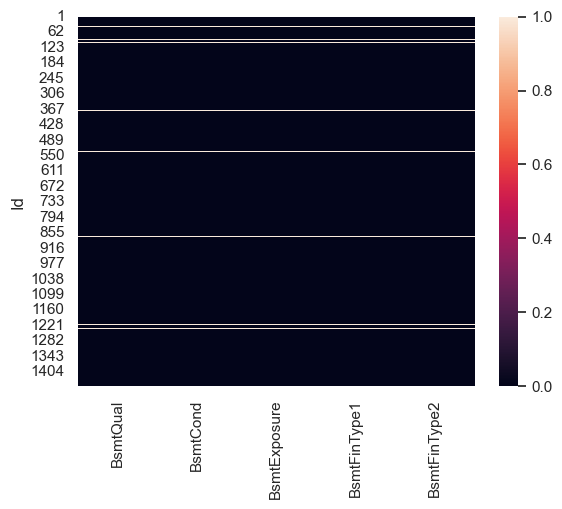

In [63]:
sns.heatmap(df[cat_bsmt_feature].isnull())

In [64]:
for i in cat_bsmt_feature:
    print(f"Value count of {i} : {df[i].value_counts()}")

Value count of BsmtQual : BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
Value count of BsmtCond : BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
Value count of BsmtExposure : BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
Value count of BsmtFinType1 : BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
Value count of BsmtFinType2 : BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64


In [65]:
cat_bsmt_const="NA"
for i in cat_bsmt_feature:
    df_mvi[i].replace(np.nan,cat_bsmt_const,inplace=True)  

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\2832951584.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[i].replace(np.nan,cat_bsmt_const,inplace=True)


In [66]:
df_mvi[cat_bsmt_feature].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

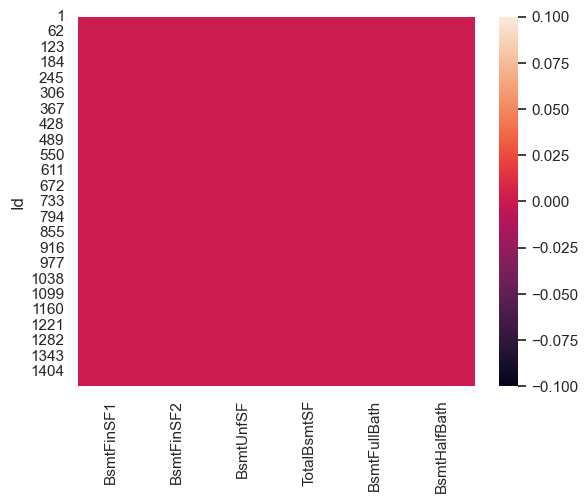

In [67]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [68]:
df_bsmt=df[cat_bsmt_feature + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  BsmtFinSF1  \
Id                                                                          
18        NaN      NaN          NaN          NaN          NaN           0   
40        NaN      NaN          NaN          NaN          NaN           0   
91        NaN      NaN          NaN          NaN          NaN           0   
103       NaN      NaN          NaN          NaN          NaN           0   
157       NaN      NaN          NaN          NaN          NaN           0   
183       NaN      NaN          NaN          NaN          NaN           0   
260       NaN      NaN          NaN          NaN          NaN           0   
333        Gd       TA           No          GLQ          NaN        1124   
343       NaN      NaN          NaN          NaN          NaN           0   
363       NaN      NaN          NaN          NaN          NaN           0   
372       NaN      NaN          NaN          NaN          NaN           0   
393       NaN      NaN          NaN          NaN          NaN           0   
521       NaN      NaN          NaN          NaN          NaN           0   
533       NaN      NaN          NaN          NaN          NaN           0   
534       NaN      NaN          NaN          NaN          NaN           0   
554       NaN      NaN          NaN          NaN          NaN           0   
647       NaN      NaN          NaN          NaN          NaN           0   
706       NaN      NaN          NaN          NaN          NaN           0   
737       NaN      NaN          NaN          NaN          NaN           0   
750       NaN      NaN          NaN          NaN          NaN           0   
779       NaN      NaN          NaN          NaN          NaN           0   
869       NaN      NaN          NaN          NaN          NaN           0   
895       NaN      NaN          NaN          NaN          NaN           0   
898       NaN      NaN          NaN          NaN          NaN           0   
949        Gd       TA          NaN          Unf          Unf           0   
985       NaN      NaN          NaN          NaN          NaN           0   
1001      NaN      NaN          NaN          NaN          NaN           0   
1012      NaN      NaN          NaN          NaN          NaN           0   
1036      NaN      NaN          NaN          NaN          NaN           0   
1046      NaN      NaN          NaN          NaN          NaN           0   
1049      NaN      NaN          NaN          NaN          NaN           0   
1050      NaN      NaN          NaN          NaN          NaN           0   
1091      NaN      NaN          NaN          NaN          NaN           0   
1180      NaN      NaN          NaN          NaN          NaN           0   
1217      NaN      NaN          NaN          NaN          NaN           0   
1219      NaN      NaN          NaN          NaN          NaN           0   
1233      NaN      NaN          NaN          NaN          NaN           0   
1322      NaN      NaN          NaN          NaN          NaN           0   
1413      NaN      NaN          NaN          NaN          NaN           0   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath  
Id                                                                    
18             0          0            0             0             0  
40             0          0            0             0             0  
91             0          0            0             0             0  
103            0          0            0             0             0  
157            0          0            0             0             0  
183            0          0            0             0             0  
260            0          0            0             0             0  
333          479       1603         3206             1             0  
343            0          0            0             0             0  
363            0          0            0             0            

In [69]:
num_bsmt_const=0
for i in num_bsmt_feat:
    df_mvi[i].replace(np.nan,num_bsmt_const,inplace=True) 

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\3470822280.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[i].replace(np.nan,num_bsmt_const,inplace=True)


In [70]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

## handeling Electrical = 0.034258 and KitchenQual = 0.034258

In [71]:
df["KitchenQual"].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [72]:
df["Electrical"].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [73]:
df_electrical_kitchen=df[["KitchenQual","Electrical","KitchenAbvGr"]]
df_electrical_kitchen[df_electrical_kitchen.isnull().any(axis=1)]

KitchenQual Electrical  KitchenAbvGr
Id                                       
1380          Gd        NaN             1

In [74]:
KitchenQual_mode=df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan, KitchenQual_mode, inplace=True)
df_mvi["KitchenQual"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\1389458410.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["KitchenQual"].replace(np.nan, KitchenQual_mode, inplace=True)


0

In [75]:
Electrical_mode=df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, Electrical_mode, inplace=True)
df_mvi["Electrical"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\2103685027.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Electrical"].replace(np.nan, Electrical_mode, inplace=True)


0

 ## Handeling remaing cat feature

In [76]:
df["Functional"].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [77]:
Functional_mode=df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan, Functional_mode, inplace=True)
df_mvi["Functional"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\1082594837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Functional"].replace(np.nan, Functional_mode, inplace=True)


0

In [78]:
df["SaleType"].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [79]:
SaleType_mode=df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan, SaleType_mode, inplace=True)
df_mvi["SaleType"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\1818604836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["SaleType"].replace(np.nan, SaleType_mode, inplace=True)


0

In [80]:
df["FireplaceQu"].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [81]:
FireplaceQu_mode="NA"
df_mvi["FireplaceQu"].replace(np.nan, FireplaceQu_mode, inplace=True)
df_mvi["FireplaceQu"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\375250115.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["FireplaceQu"].replace(np.nan, FireplaceQu_mode, inplace=True)


0

In [82]:
df["Fence"].value_counts()

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: count, dtype: int64

In [83]:
Fence_mode="NA"
df_mvi["Fence"].replace(np.nan, Fence_mode, inplace=True)
df_mvi["Fence"].isnull().sum()

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\969256196.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Fence"].replace(np.nan, Fence_mode, inplace=True)


0

In [84]:
df["MiscFeature"].value_counts()

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [85]:
df.drop('MiscFeature',axis=1,inplace=True)

# Handeling garage misiing value

In [86]:
cat_garage_feat=["GarageType",
"GarageFinish",
"GarageQual",
"GarageCond"]

num_garage_feat=["GarageYrBlt",
"GarageCars",
"GarageArea"]

In [87]:
df_garage=df[cat_garage_feat + num_garage_feat]
df_garage[df_garage.isnull().any(axis=1)]

GarageType GarageFinish GarageQual GarageCond  GarageYrBlt  GarageCars  \
Id                                                                            
40          NaN          NaN        NaN        NaN          NaN           0   
49          NaN          NaN        NaN        NaN          NaN           0   
79          NaN          NaN        NaN        NaN          NaN           0   
89          NaN          NaN        NaN        NaN          NaN           0   
90          NaN          NaN        NaN        NaN          NaN           0   
100         NaN          NaN        NaN        NaN          NaN           0   
109         NaN          NaN        NaN        NaN          NaN           0   
126         NaN          NaN        NaN        NaN          NaN           0   
128         NaN          NaN        NaN        NaN          NaN           0   
141         NaN          NaN        NaN        NaN          NaN           0   
149         NaN          NaN        NaN        NaN          NaN           0   
156         NaN          NaN        NaN        NaN          NaN           0   
164         NaN          NaN        NaN        NaN          NaN           0   
166         NaN          NaN        NaN        NaN          NaN           0   
199         NaN          NaN        NaN        NaN          NaN           0   
211         NaN          NaN        NaN        NaN          NaN           0   
242         NaN          NaN        NaN        NaN          NaN           0   
251         NaN          NaN        NaN        NaN          NaN           0   
288         NaN          NaN        NaN        NaN          NaN           0   
292         NaN          NaN        NaN        NaN          NaN           0   
308         NaN          NaN        NaN        NaN          NaN           0   
376         NaN          NaN        NaN        NaN          NaN           0   
387         NaN          NaN        NaN        NaN          NaN           0   
394         NaN          NaN        NaN        NaN          NaN           0   
432         NaN          NaN        NaN        NaN          NaN           0   
435         NaN          NaN        NaN        NaN          NaN           0   
442         NaN          NaN        NaN        NaN          NaN           0   
465         NaN          NaN        NaN        NaN          NaN           0   
496         NaN          NaN        NaN        NaN          NaN           0   
521         NaN          NaN        NaN        NaN          NaN           0   
529         NaN          NaN        NaN        NaN          NaN           0   
534         NaN          NaN        NaN        NaN          NaN           0   
536         NaN          NaN        NaN        NaN          NaN           0   
563         NaN          NaN        NaN        NaN          NaN           0   
583         NaN          NaN        NaN        NaN          NaN           0   
614         NaN          NaN        NaN        NaN          NaN           0   
615         NaN          NaN        NaN        NaN          NaN           0   
621         NaN          NaN        NaN        NaN          NaN           0   
636         NaN          NaN        NaN        NaN          NaN           0   
637         NaN          NaN        NaN        NaN          NaN           0   
639         NaN          NaN        NaN        NaN          NaN           0   
650         NaN          NaN        NaN        NaN          NaN           0   
706         NaN          NaN        NaN        NaN          NaN           0   
711         NaN          NaN        NaN        NaN          NaN           0   
739         NaN          NaN        NaN        NaN          NaN           0   
751         NaN          NaN        NaN        NaN          NaN           0   
785         NaN          NaN        NaN        NaN          NaN           0   
827         NaN          NaN        NaN        NaN          NaN           0   
844         NaN          NaN        NaN        NaN     

In [88]:
cat_garage_const="NA"
for i in cat_garage_feat:
    df_mvi[i].replace(np.nan,cat_garage_const,inplace=True)  

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\2062374057.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[i].replace(np.nan,cat_garage_const,inplace=True)


In [89]:
df_mvi[cat_garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [90]:
num_garage_const=0
for i in num_garage_feat:
    df_mvi[i].replace(np.nan,num_garage_const,inplace=True)

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\1465291240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[i].replace(np.nan,num_garage_const,inplace=True)


In [91]:
df_mvi[num_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [92]:
df_mvi.isnull().any(axis=1).sum()

1406

# Out layer

In [93]:
float_feature=df_mvi.select_dtypes(include=["float64"]).columns
print("Total number of float feature : ", float_feature.shape[0])
print("float feature names: ", float_feature)


Total number of float feature :  3
float feature names:  Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')


In [94]:
int_feature=df_mvi.select_dtypes(include=["int64"]).columns
print("Total number of integer feature : ", int_feature.shape[0])
print("Integer feature names: ", int_feature)

Total number of integer feature :  34
Integer feature names:  Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [95]:
df_mvi['MSSubClass'].skew()

1.4076567471495591

# from sklearn.preprocessing import PowerTransformer




In [96]:
# from sklearn.preprocessing import PowerTransformer
# def transformation(df):
#     df = df.copy()
    
  
#     numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
   
#     for col in numeric_features:

#         skewness = df[col].skew()
#         print(f"Column name: {col}, Skewness: {skewness}")


#         if skewness > 0.5 or skewness < -0.5:
#             pt = PowerTransformer(standardize=False)  
#             df[col] = pt.fit_transform(df[[col]])  

#     return df

In [97]:
# df_mvi = transformation(df_mvi)

In [98]:
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\315319718.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,7))


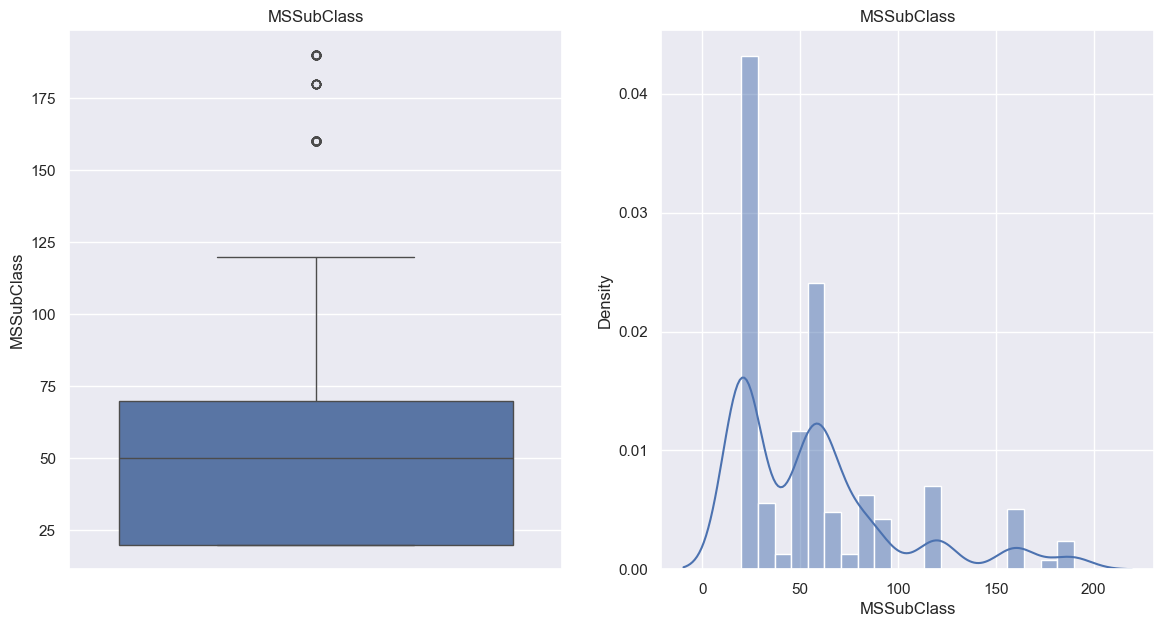

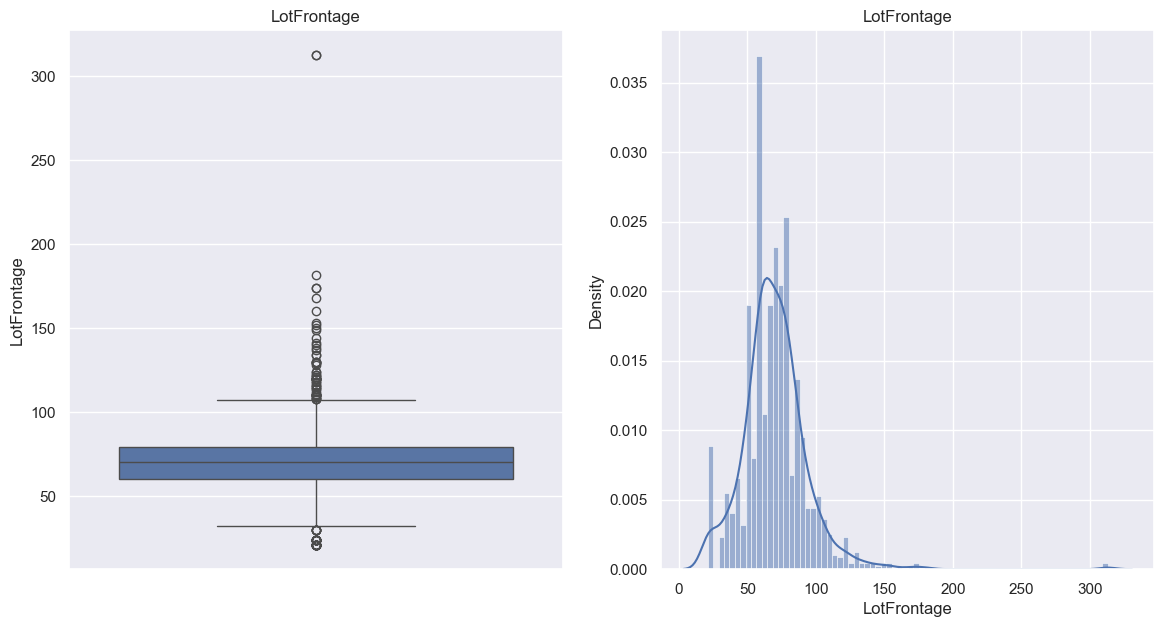

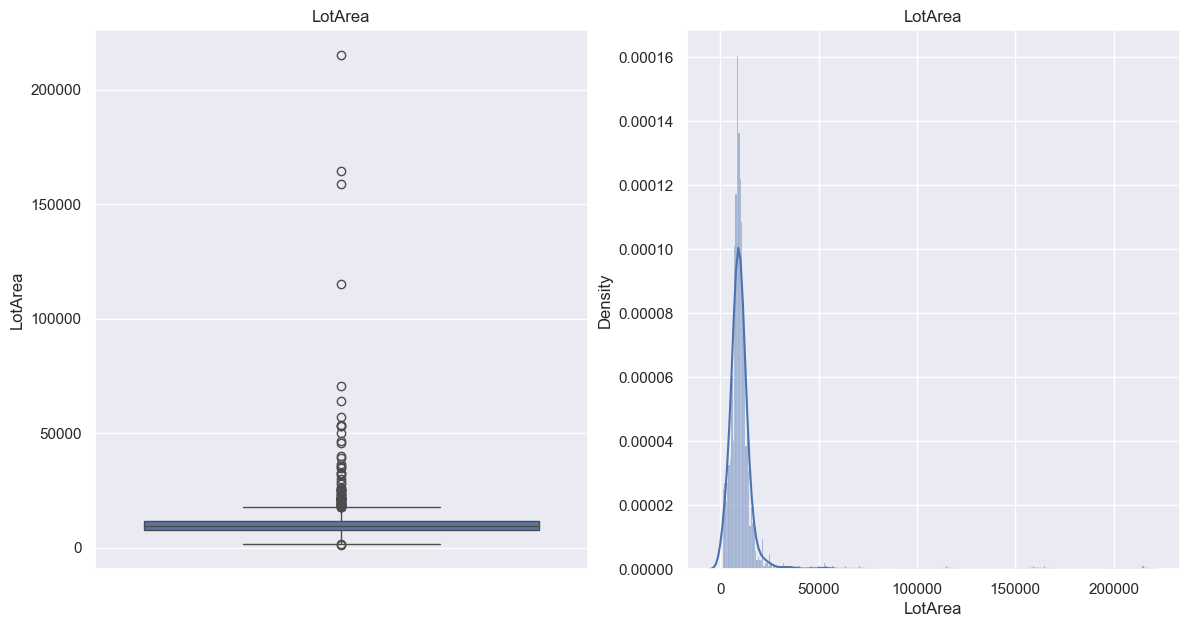

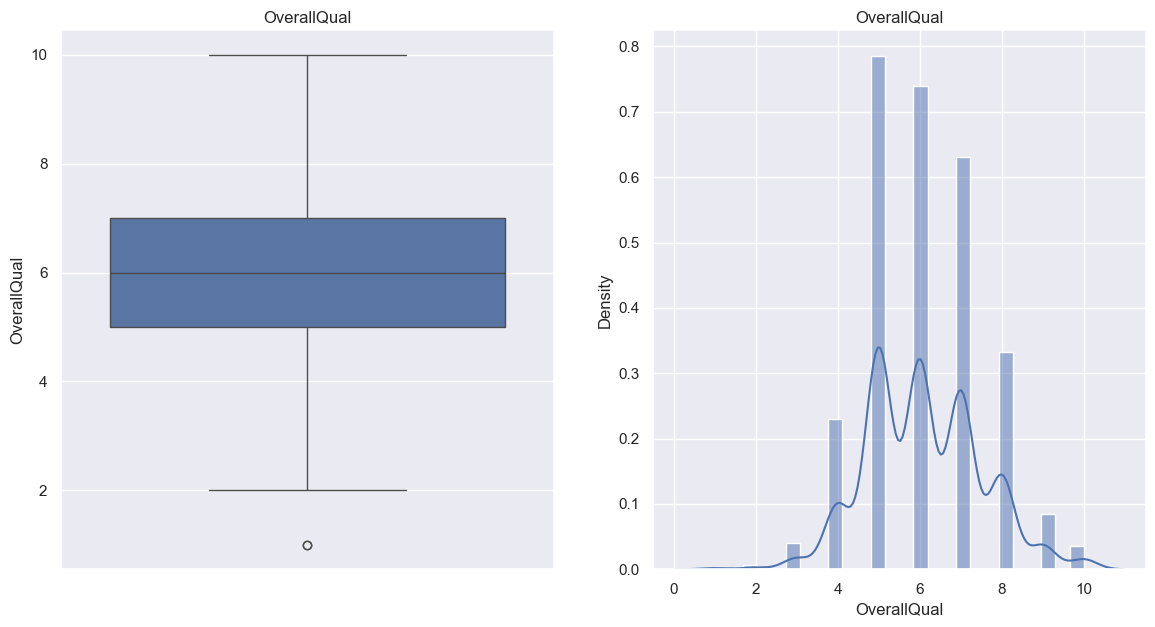

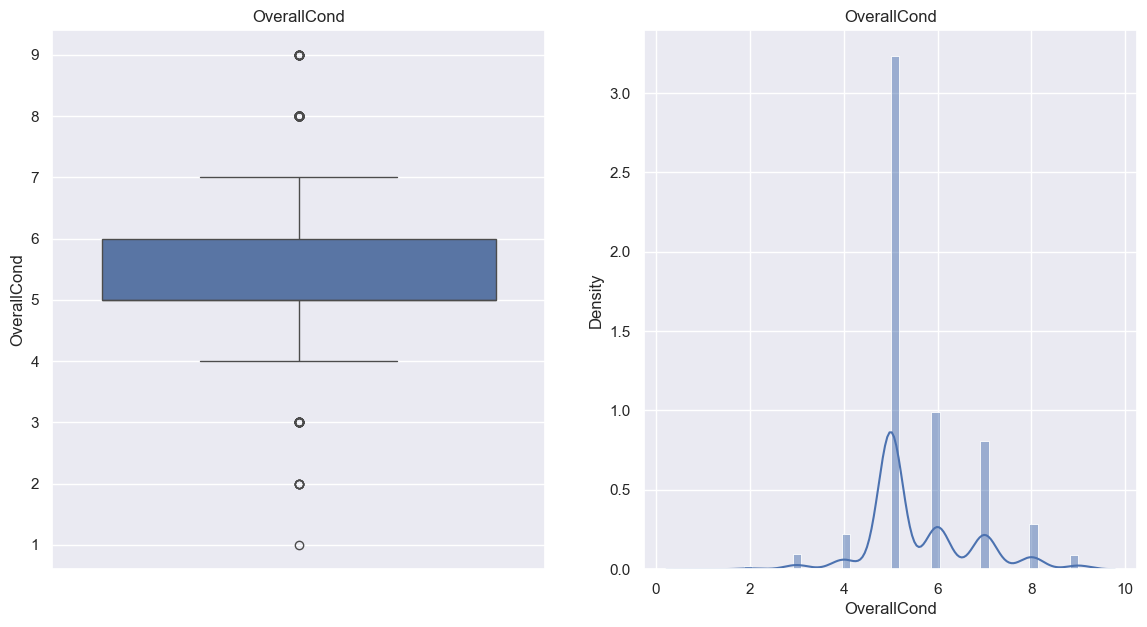

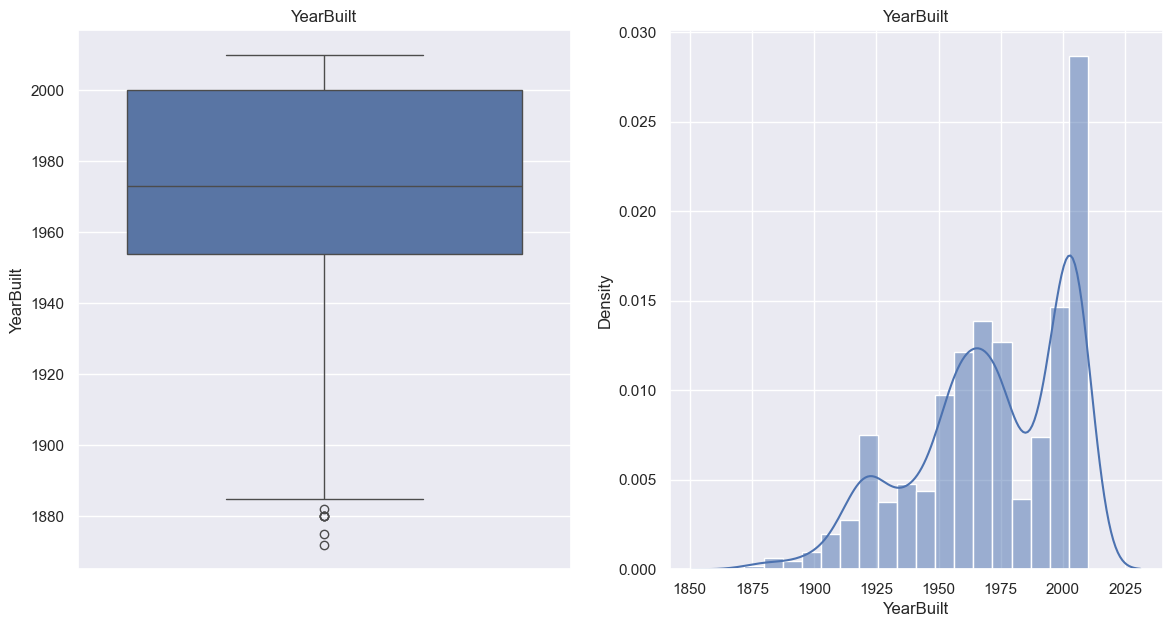

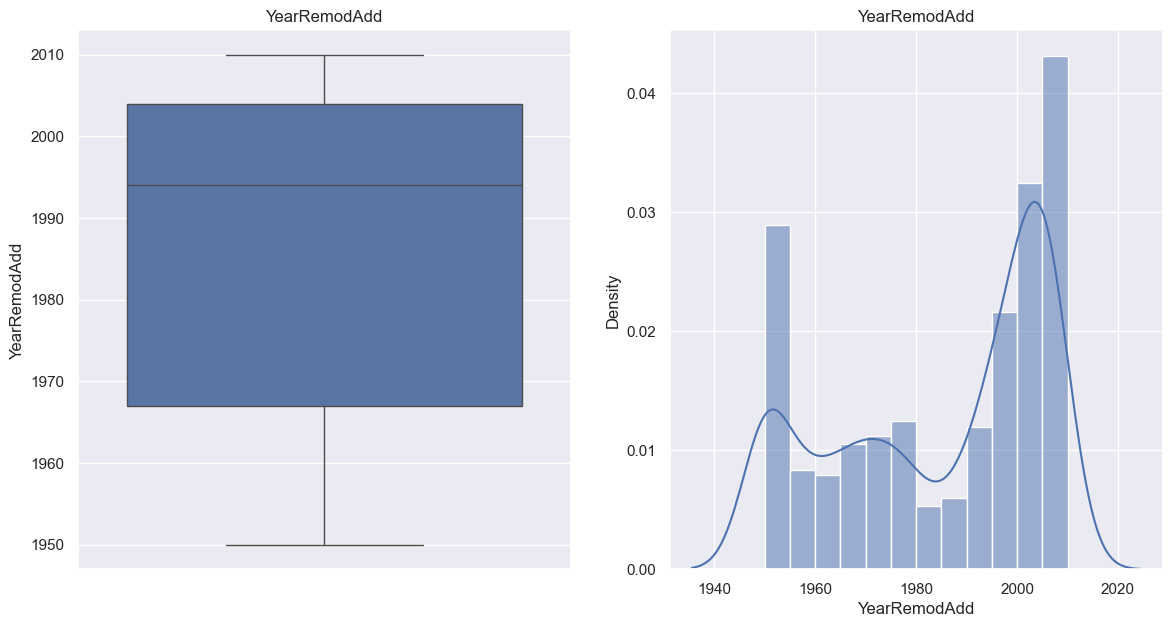

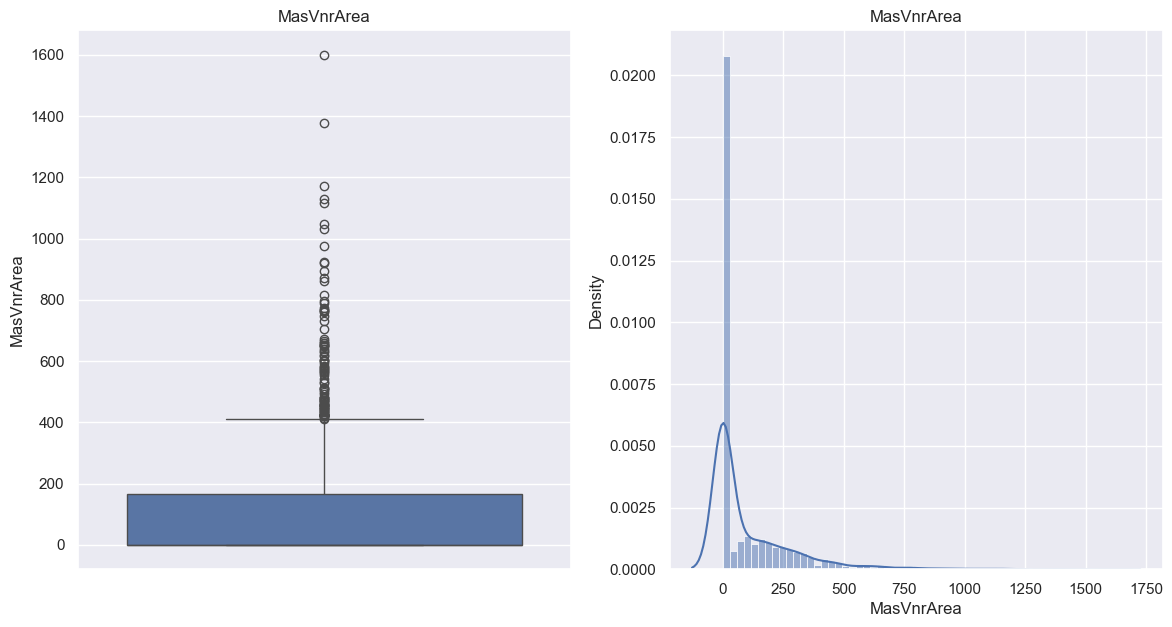

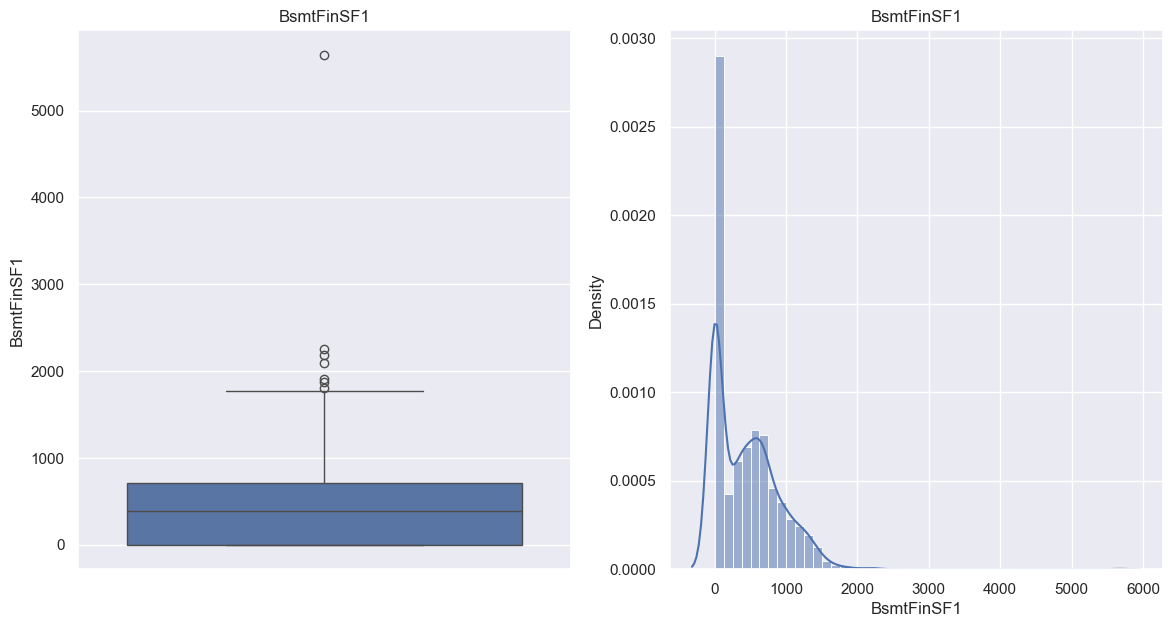

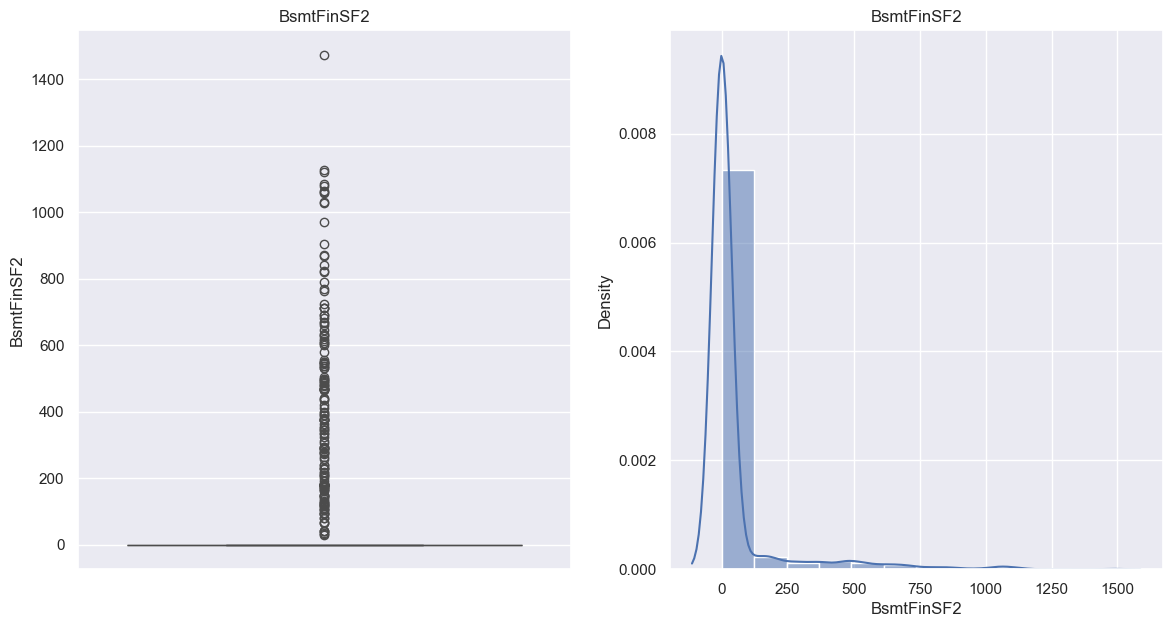

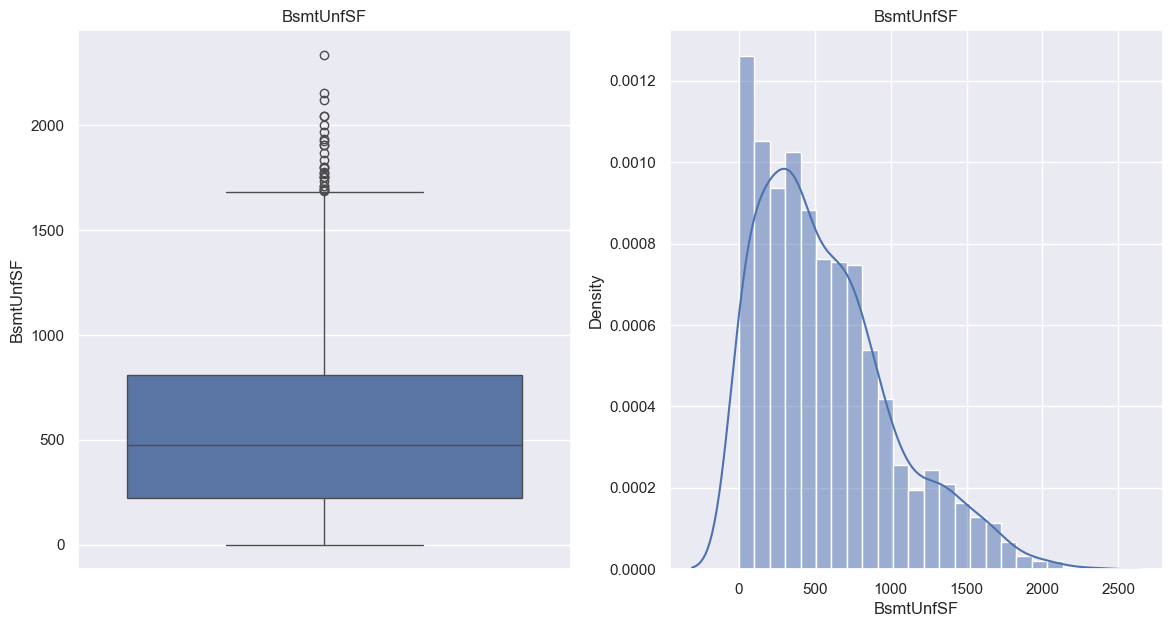

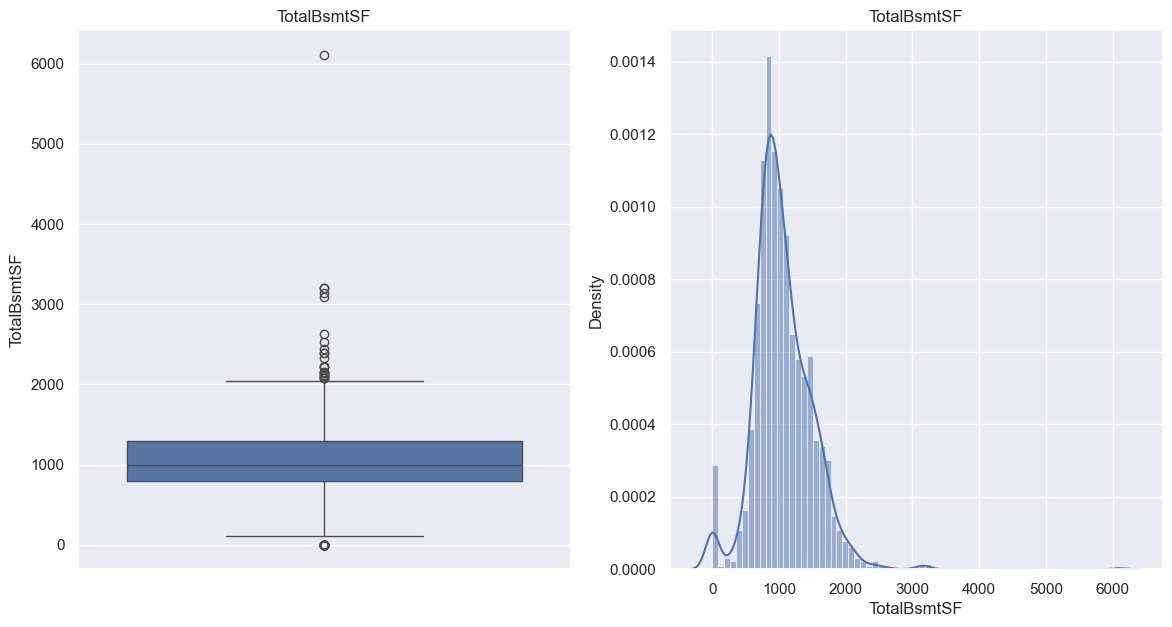

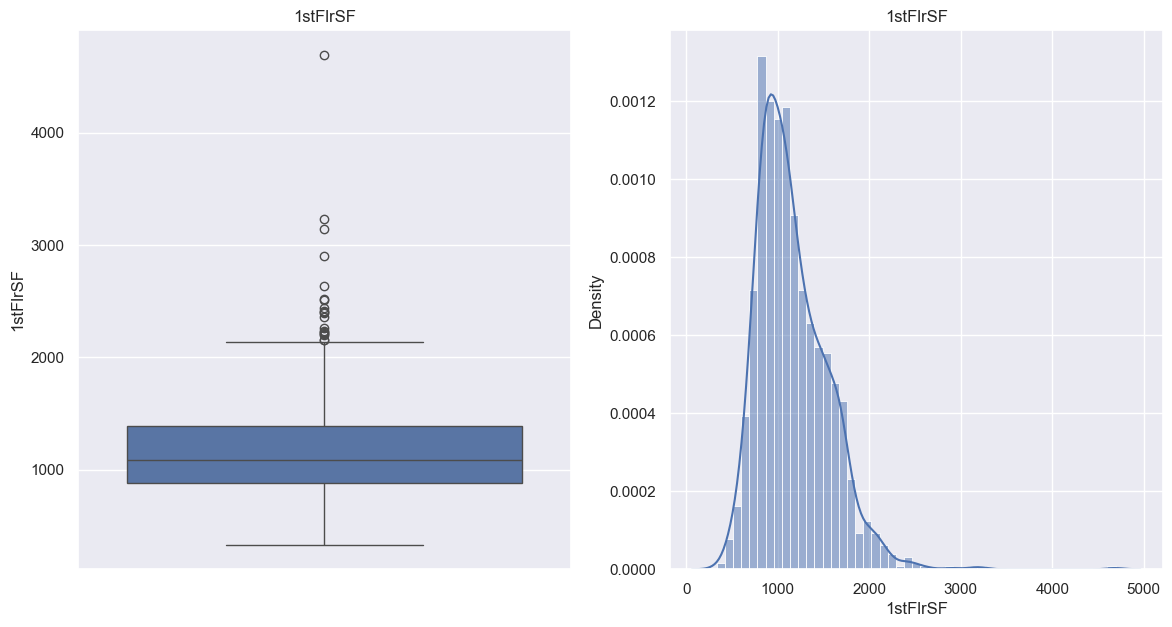

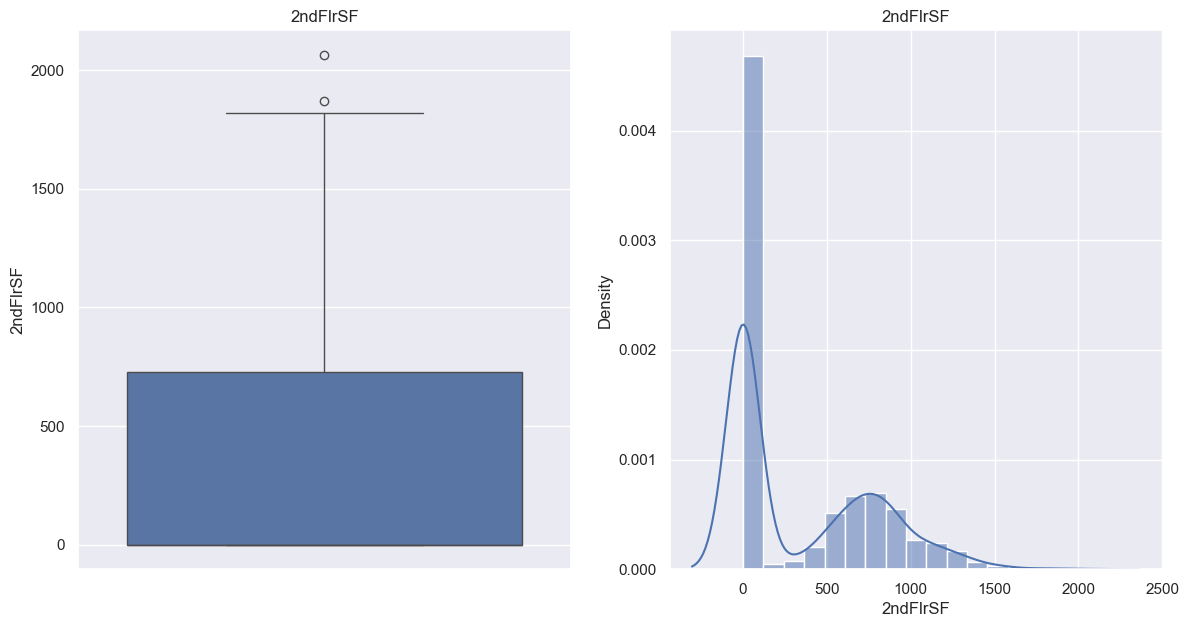

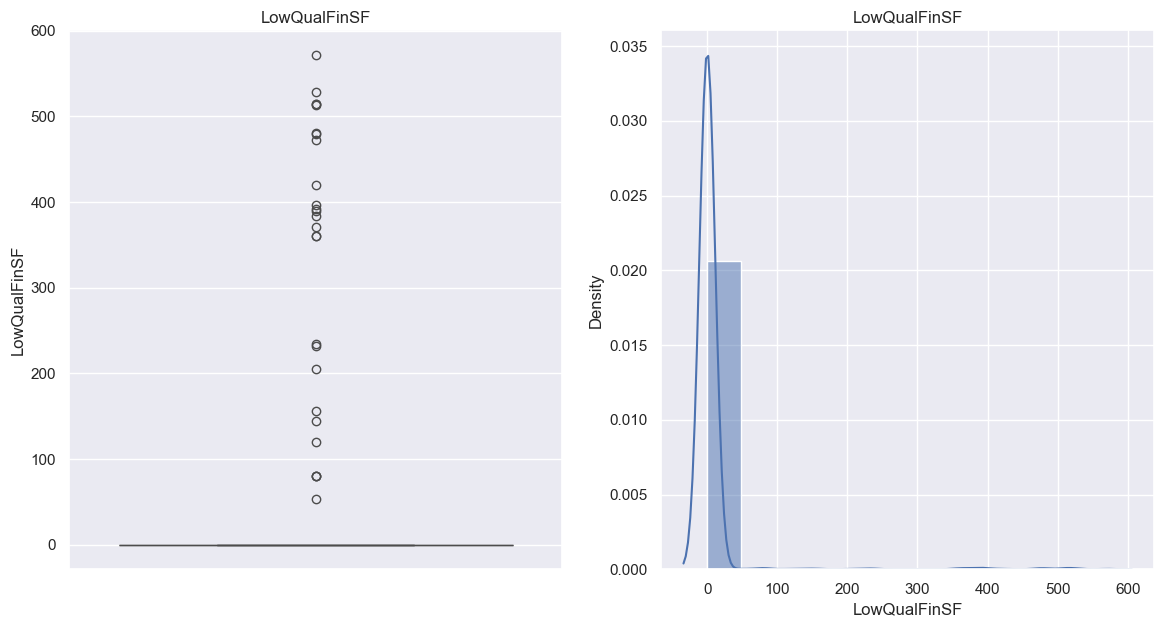

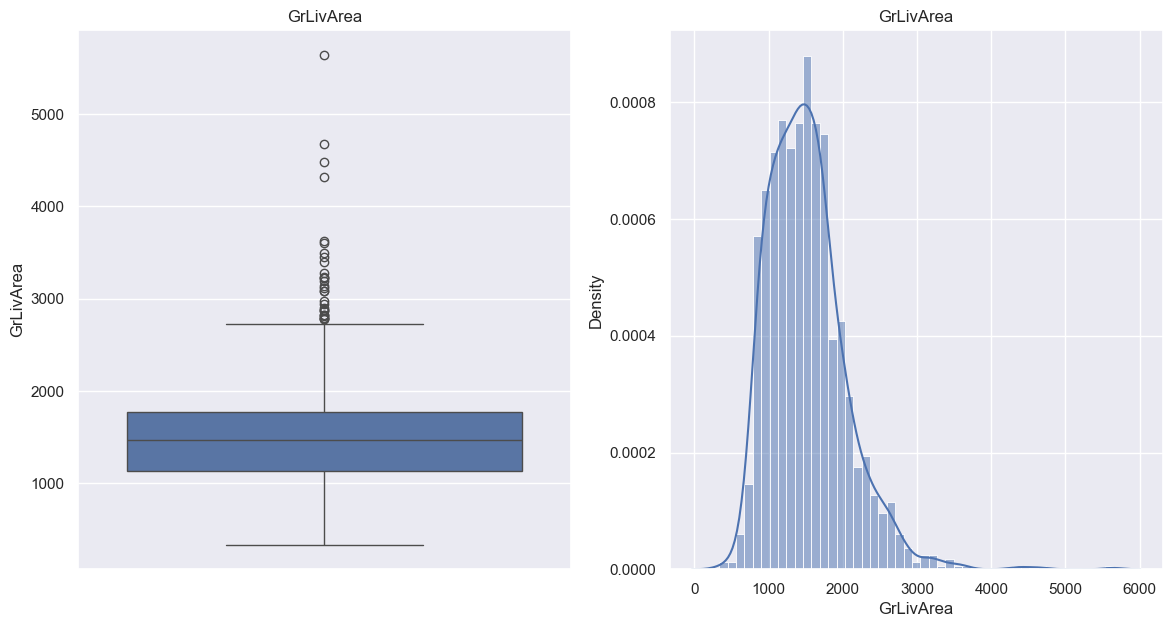

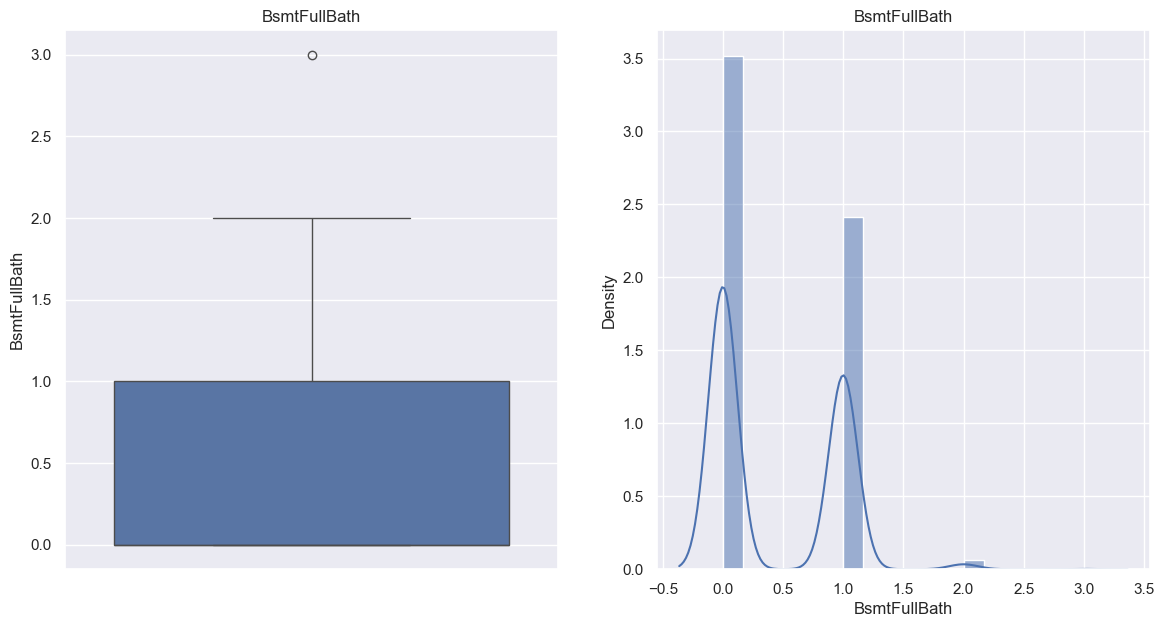

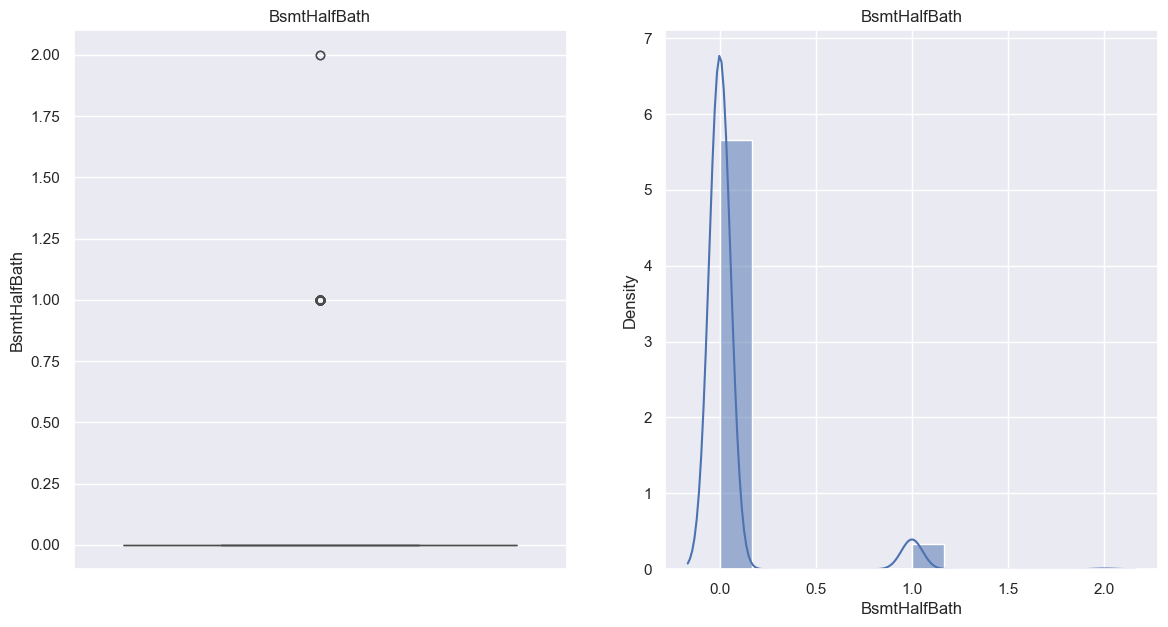

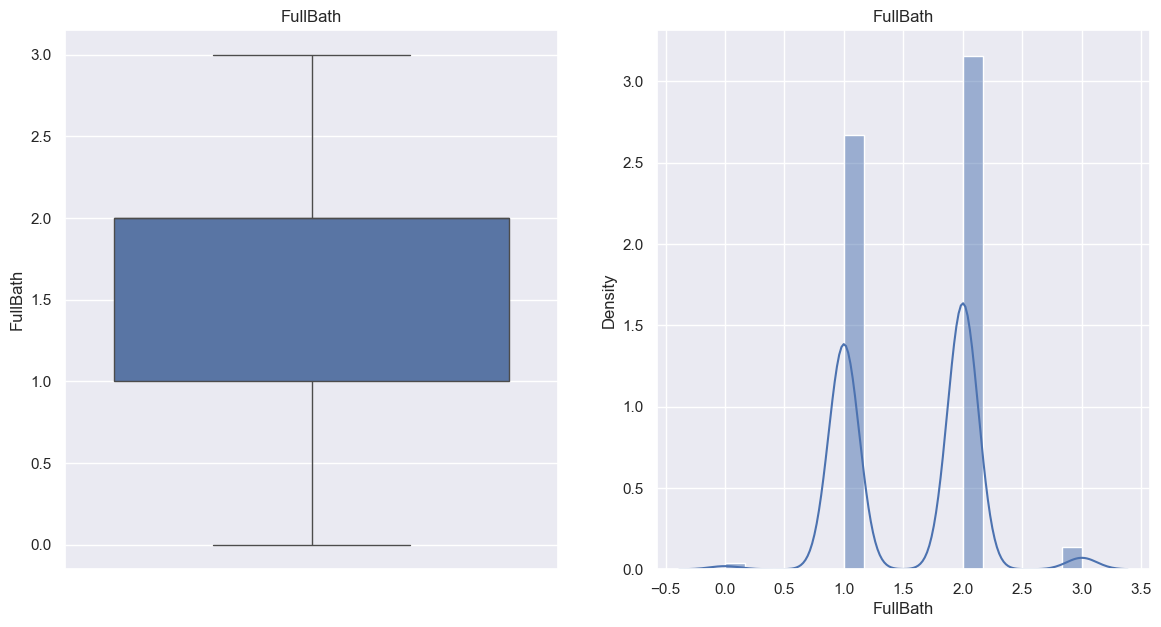

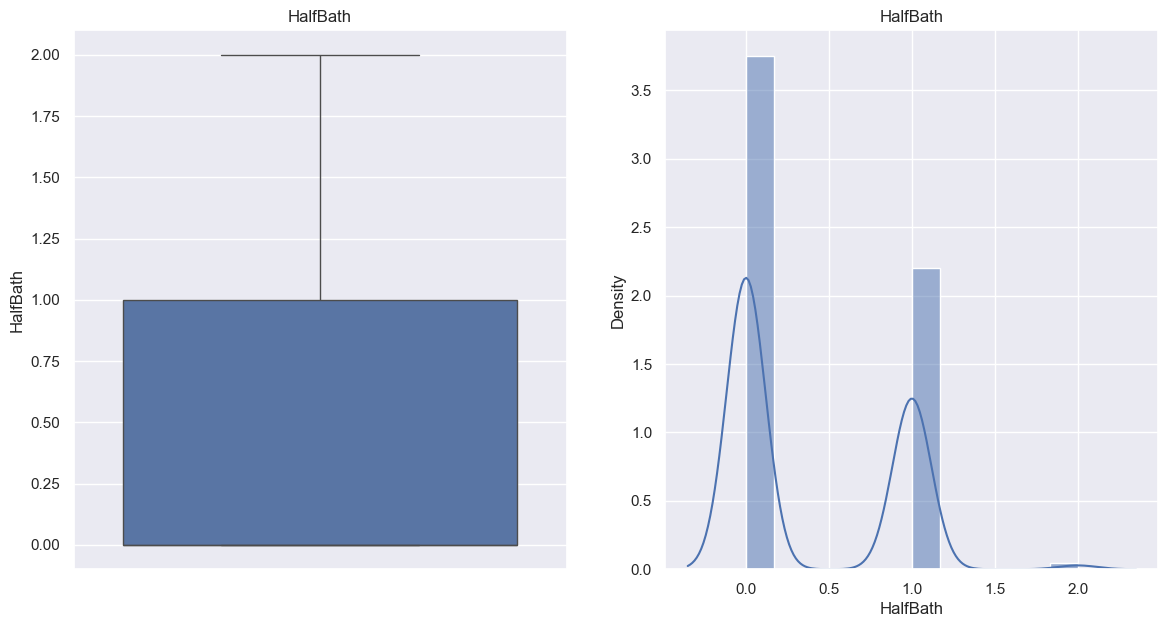

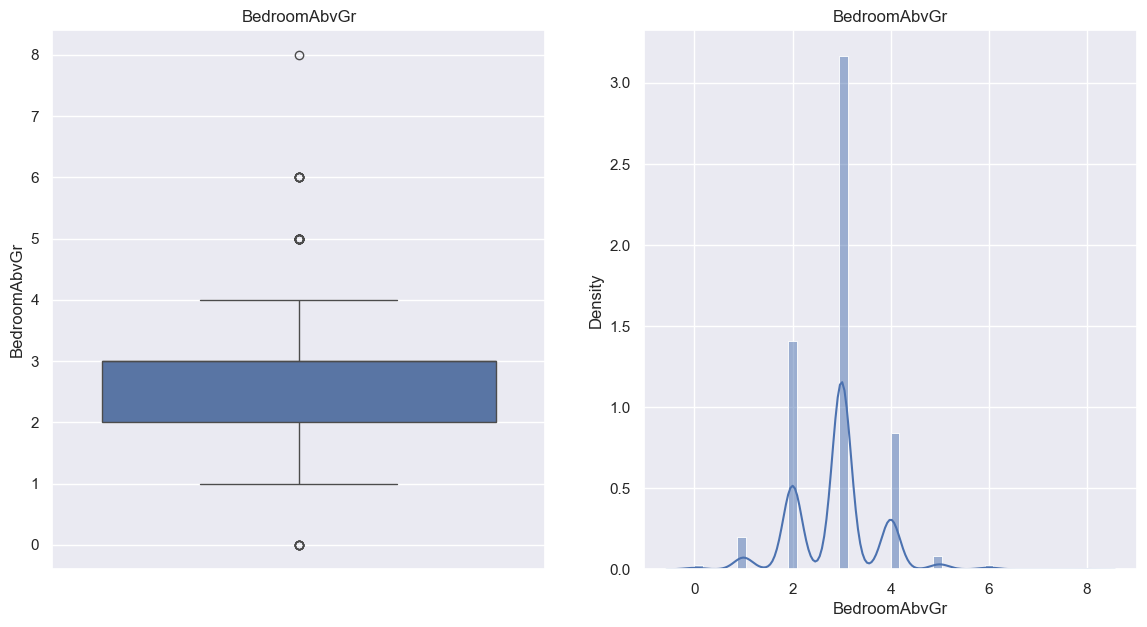

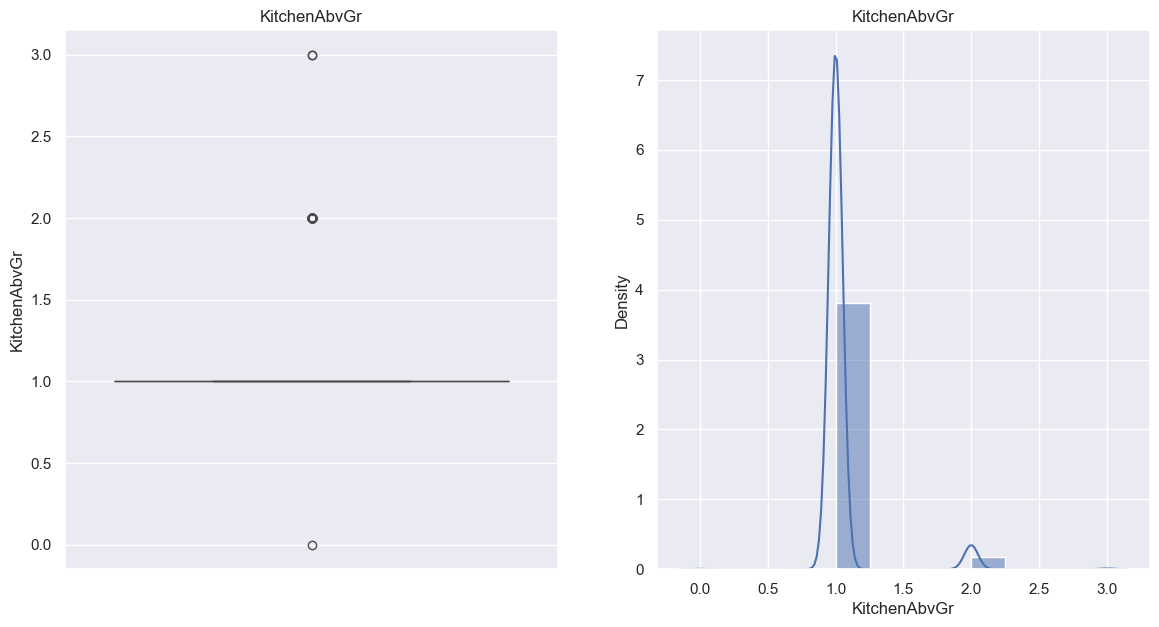

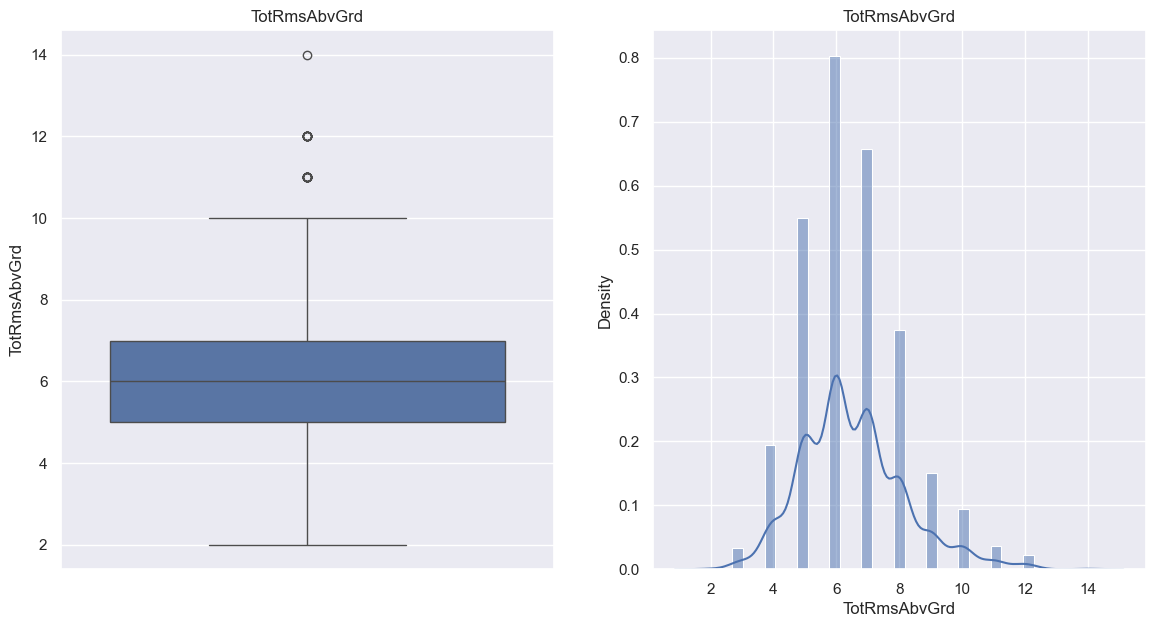

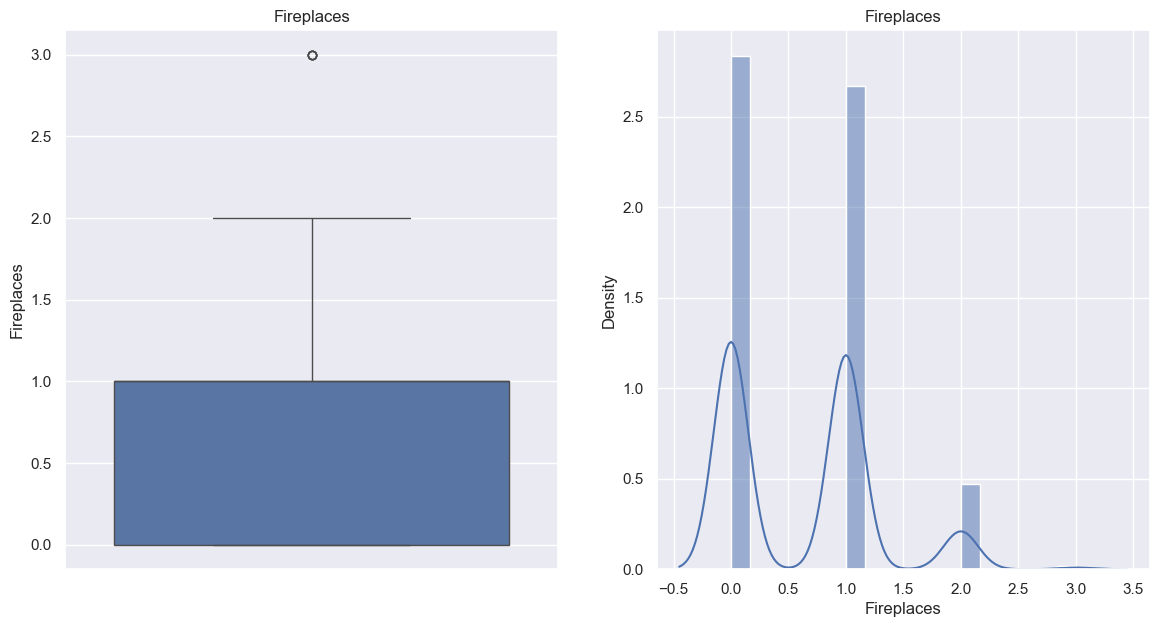

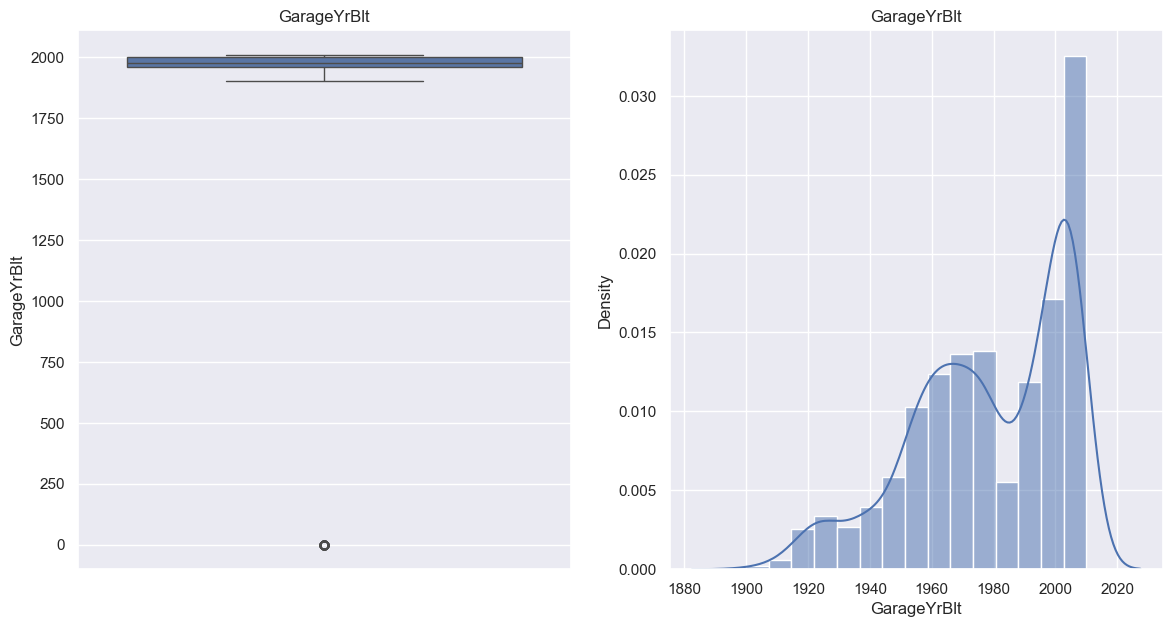

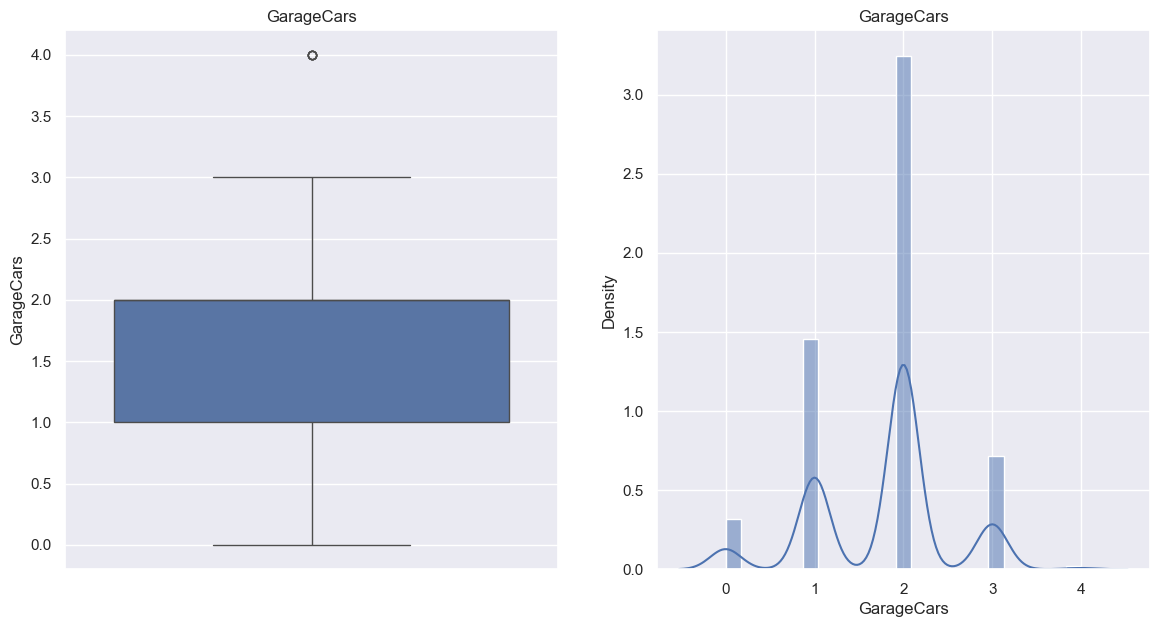

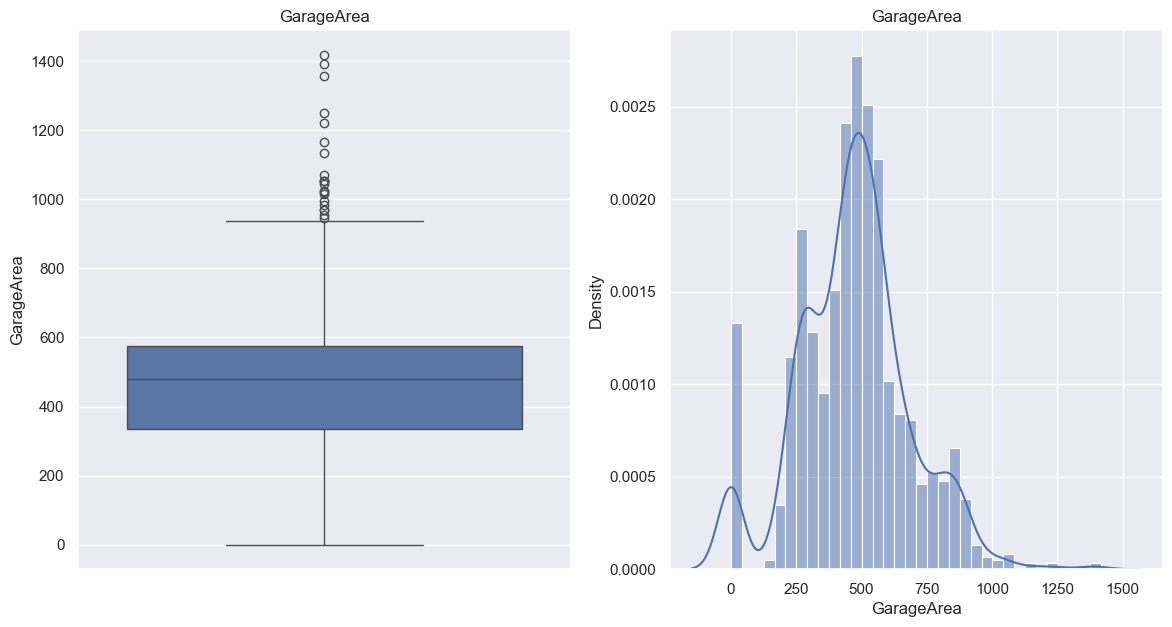

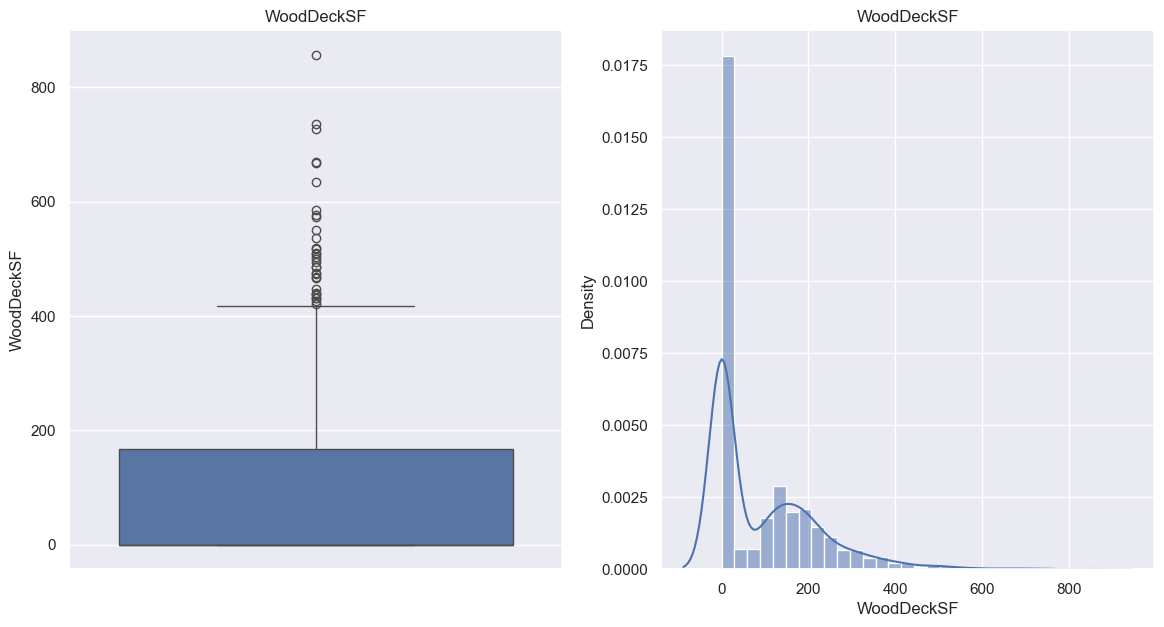

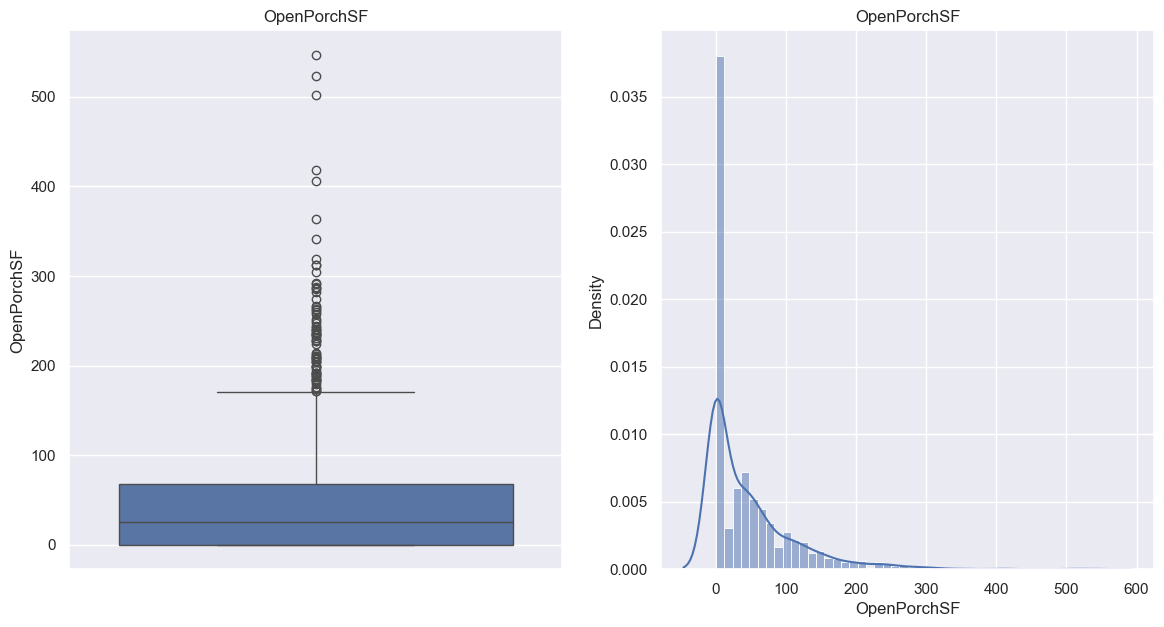

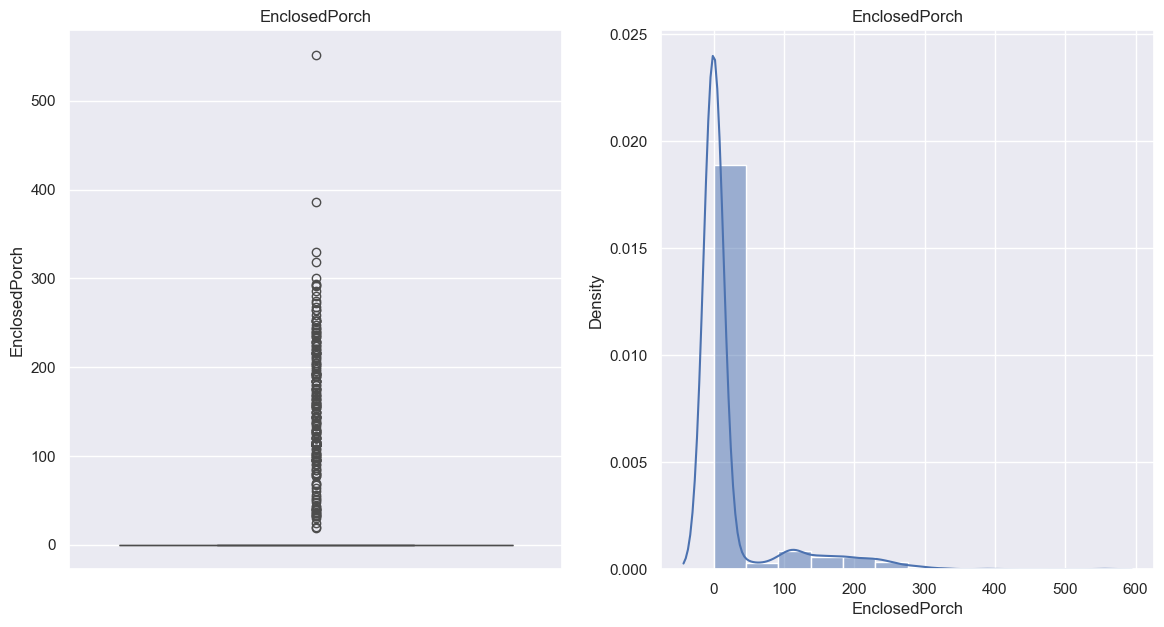

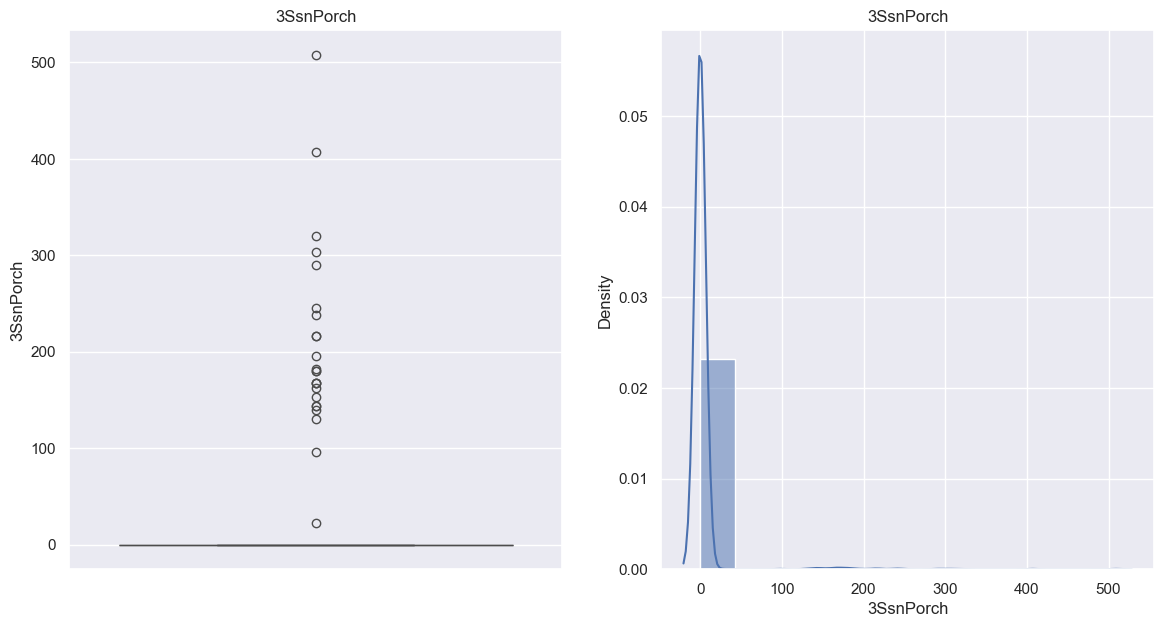

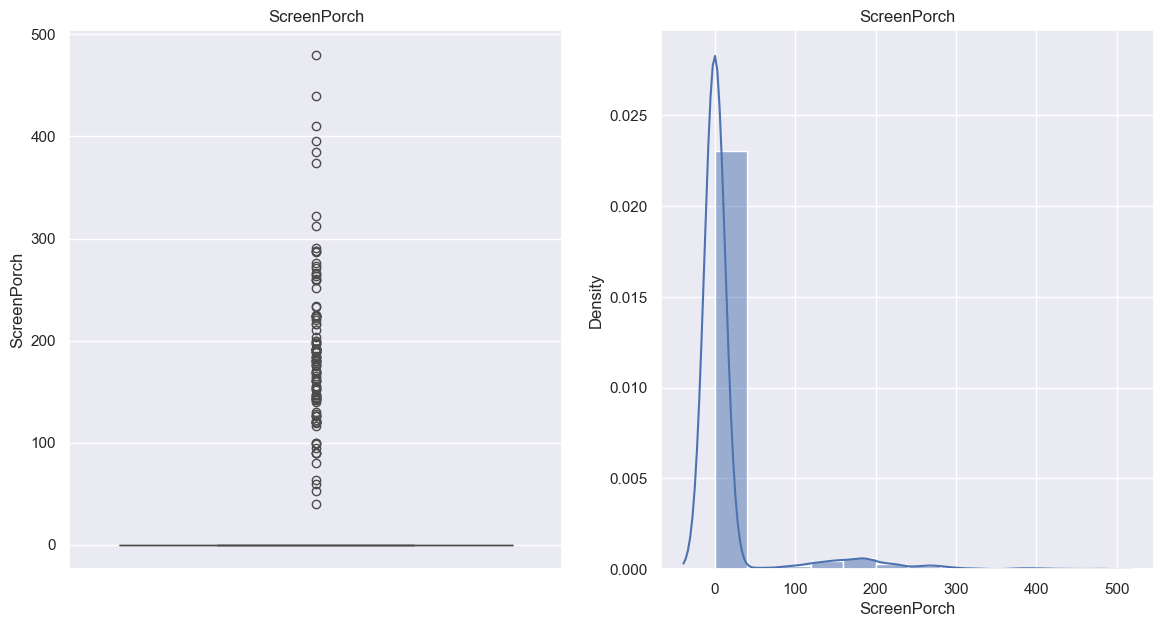

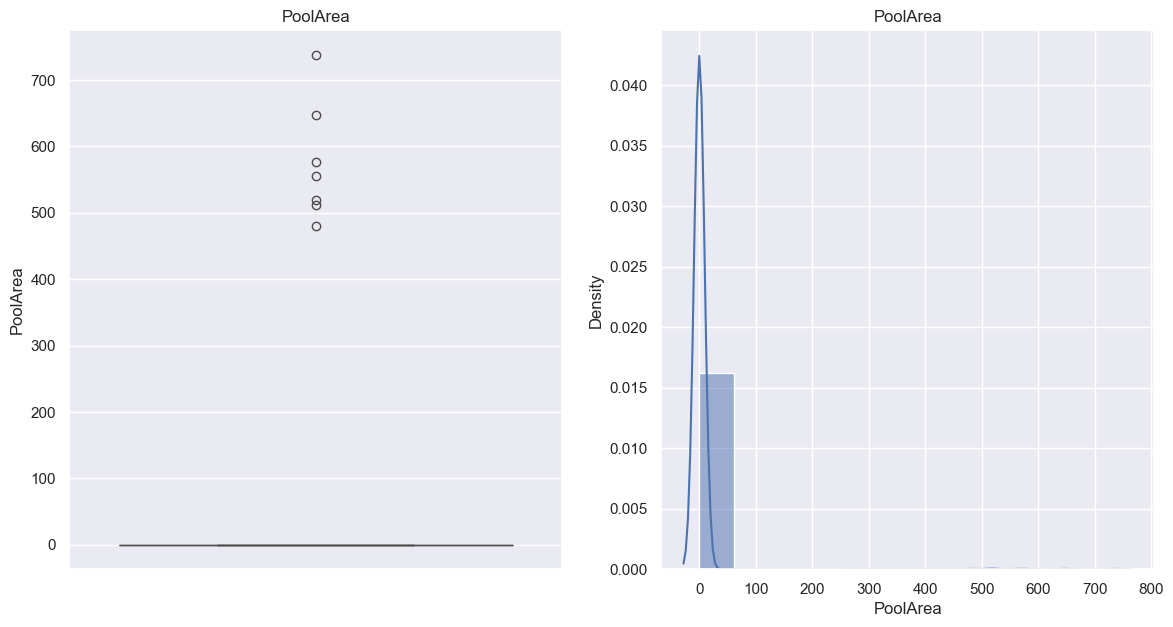

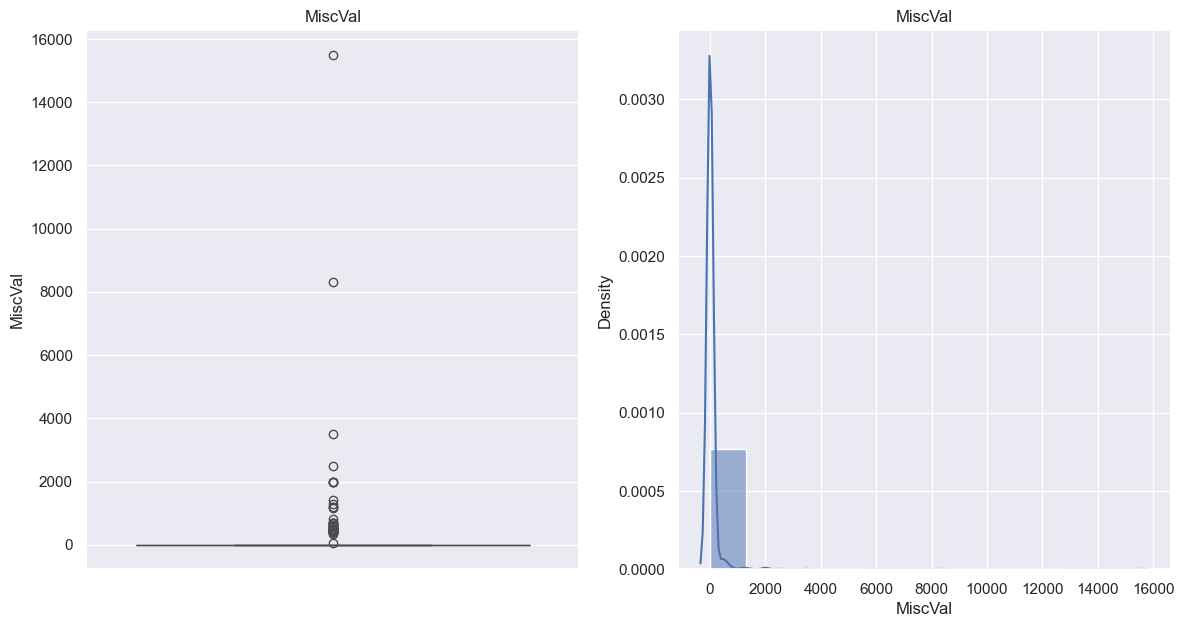

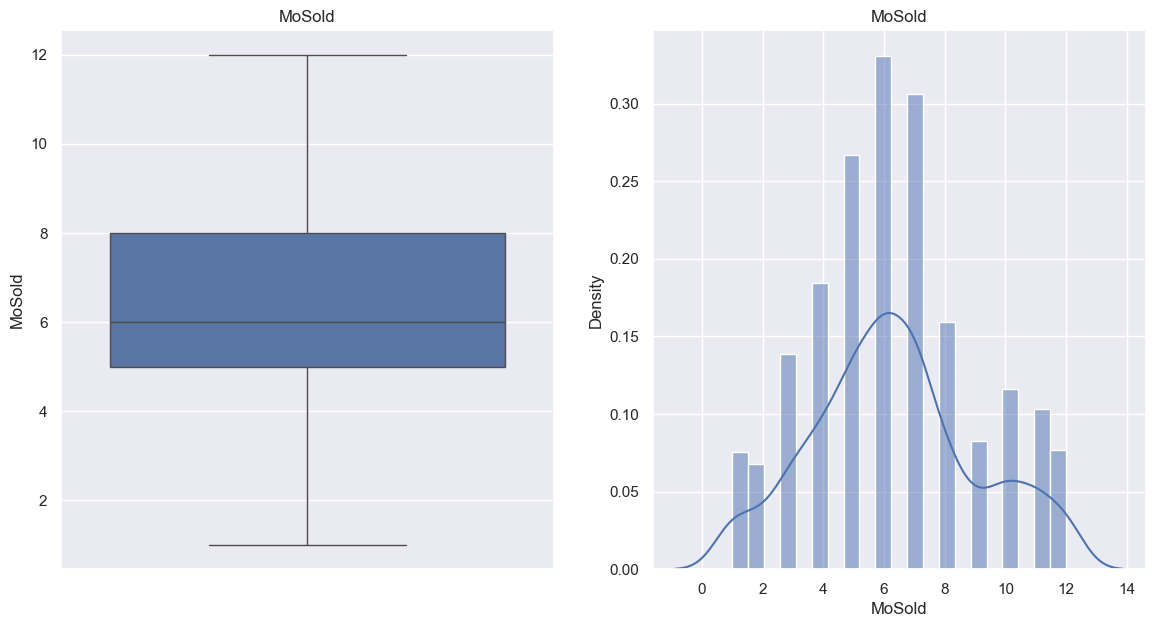

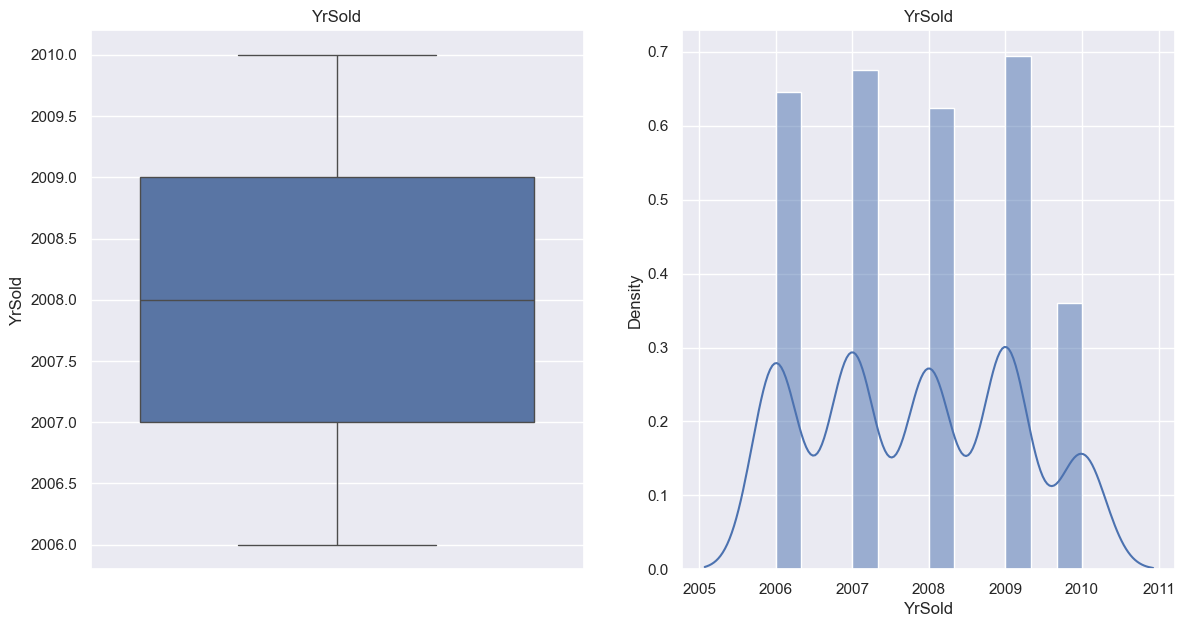

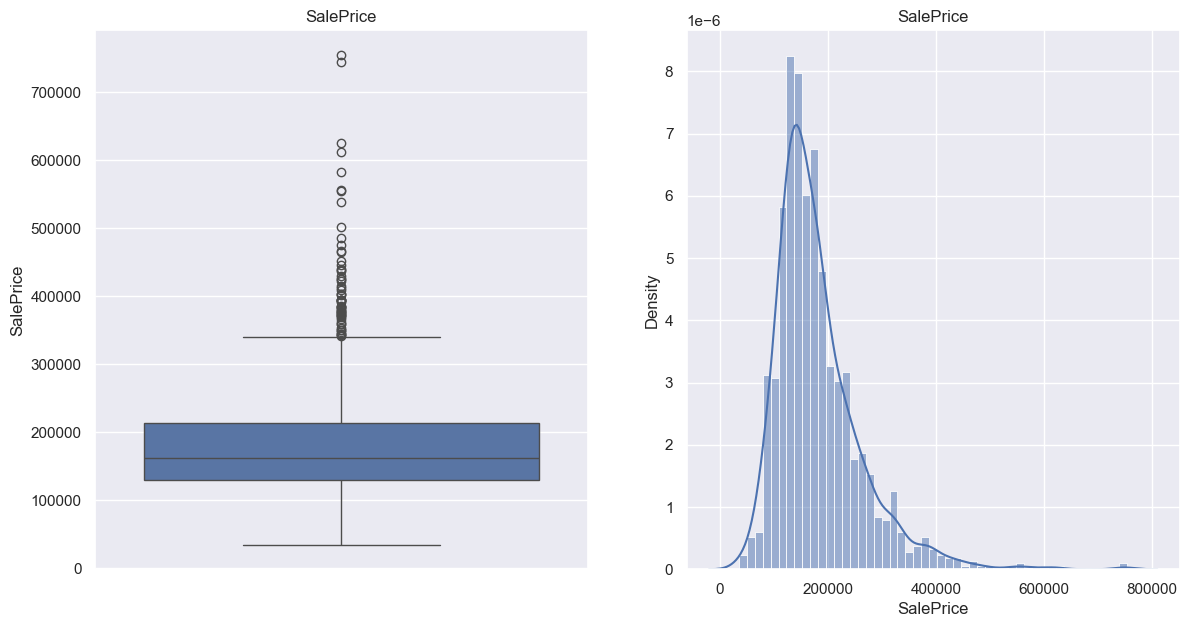

In [99]:
for col in numeric_features:
   plt.figure(figsize=(14,7))
   plt.subplot(121)
   sns.boxplot(df_mvi[col])
   plt.title(col)
    
   plt.subplot(122)
   sns.histplot(df[col], kde=True,stat="density", kde_kws=dict(cut=3))
   plt.title(col)
plt.show()

In [100]:
new_df_cap = df_mvi.copy()
for col in numeric_features:
       percentile25 = df_mvi[col].quantile(0.25)
       percentile75 = df_mvi[col].quantile(0.75)

       iqr = percentile75 - percentile25

       upper_limit = percentile75 + 1.5 * iqr
       lower_limit = percentile25 - 1.5 * iqr
       #capping
       
 
       new_df_cap[col] = np.where(
         new_df_cap[col] > upper_limit,
         upper_limit,
         np.where(
                  new_df_cap[col] < lower_limit,
                  lower_limit,
                  new_df_cap[col]
                  )
       )

C:\Users\CHAYAN GHOSH\AppData\Local\Temp\ipykernel_6472\216110122.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,7))


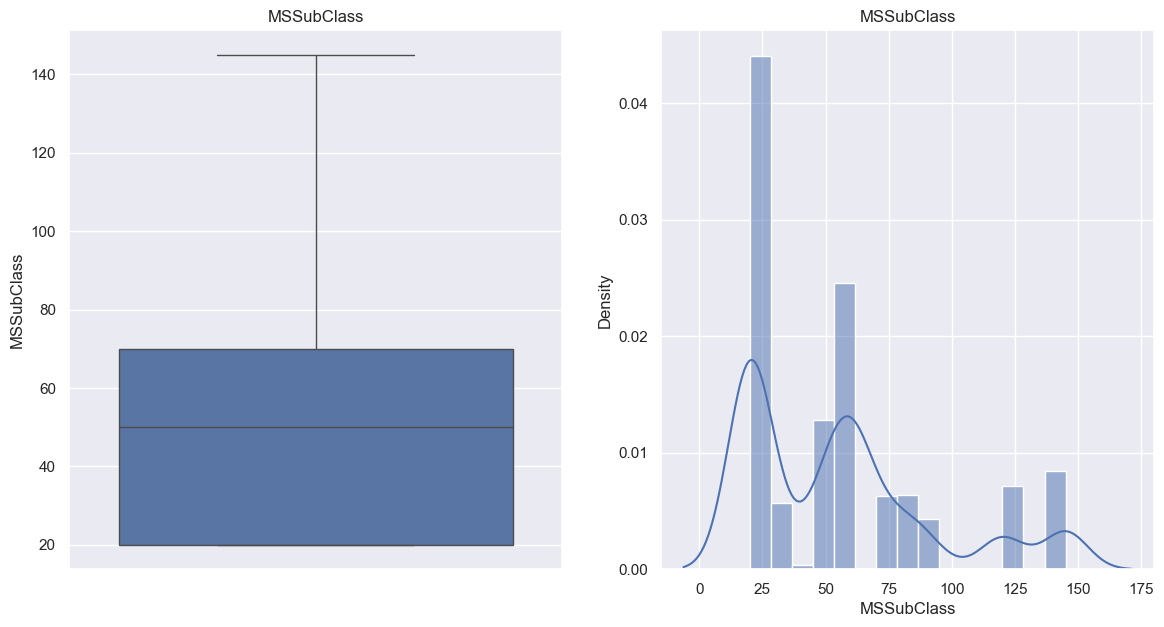

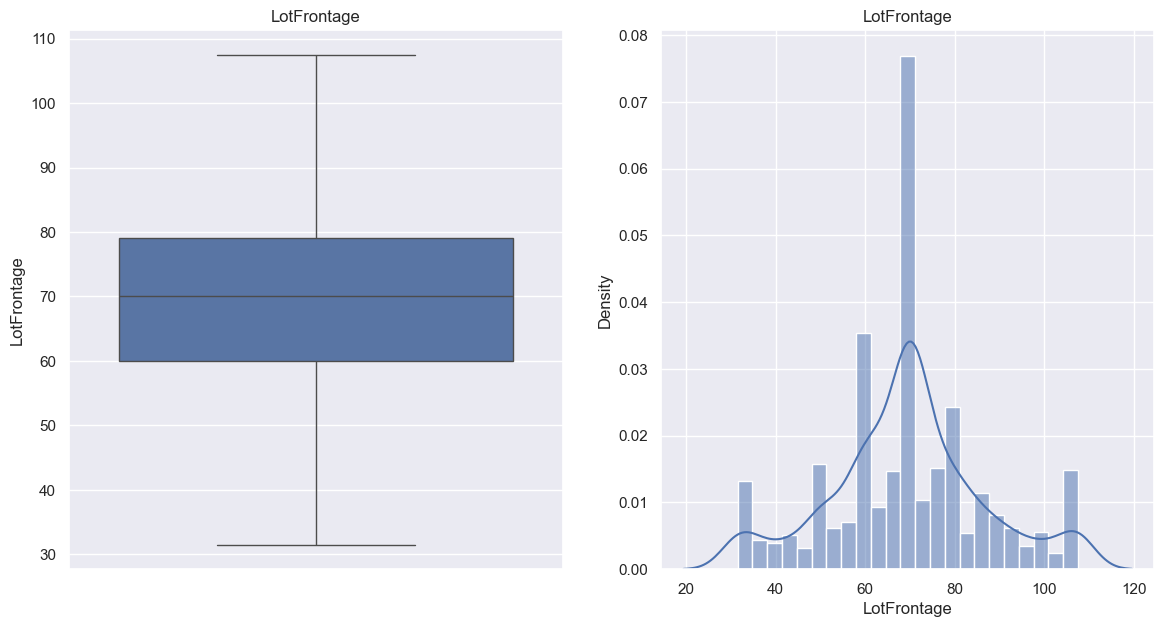

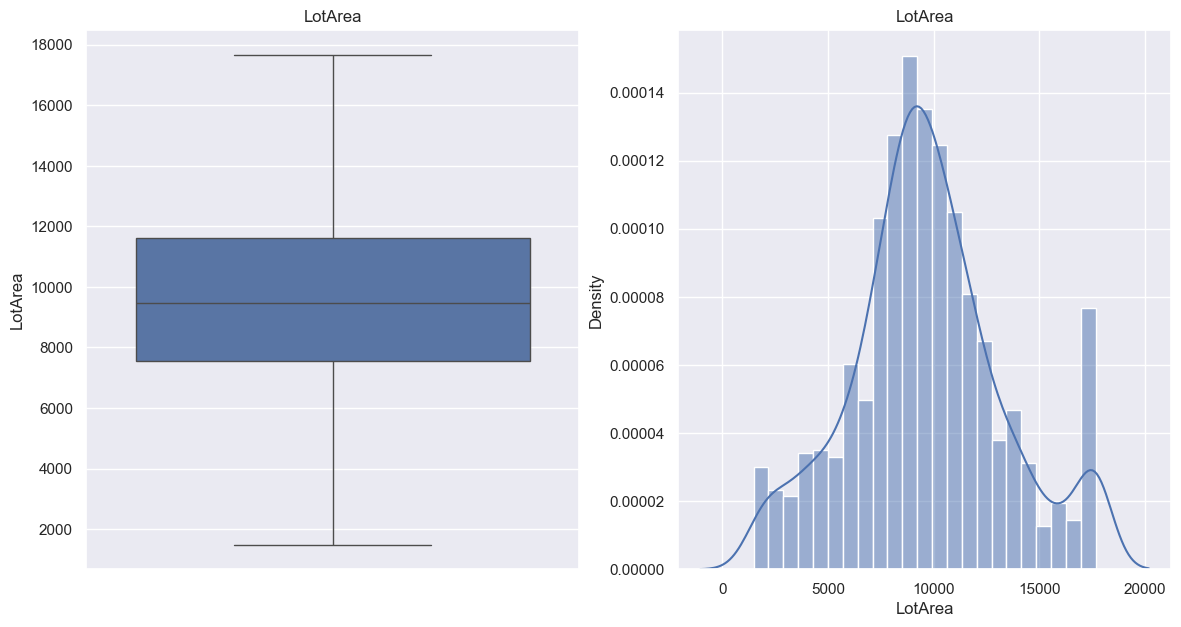

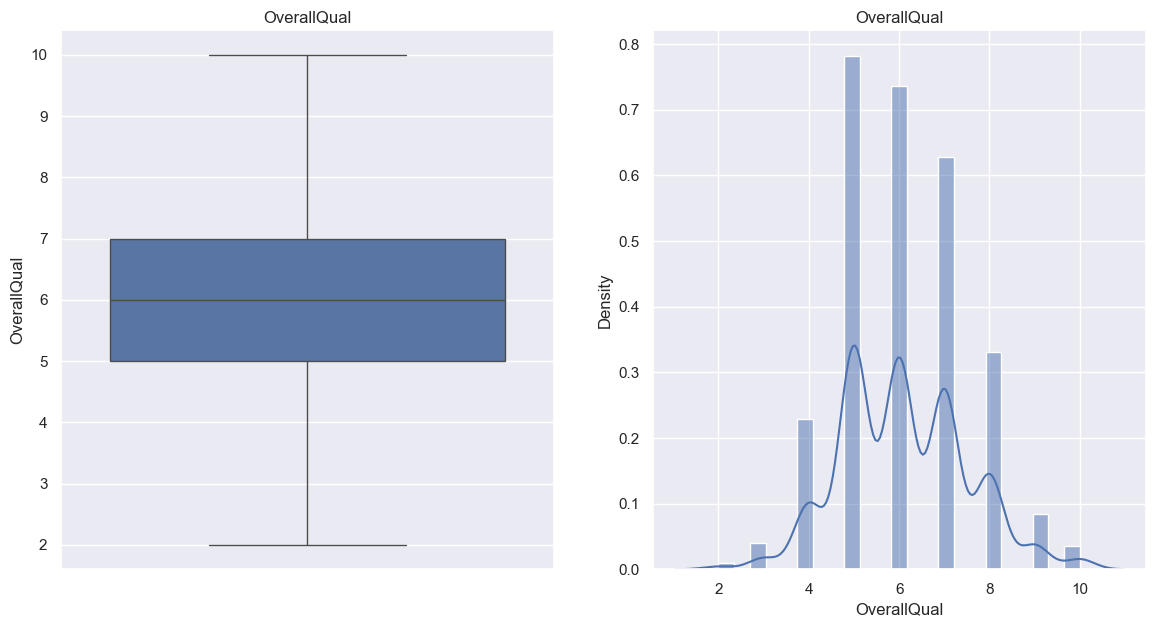

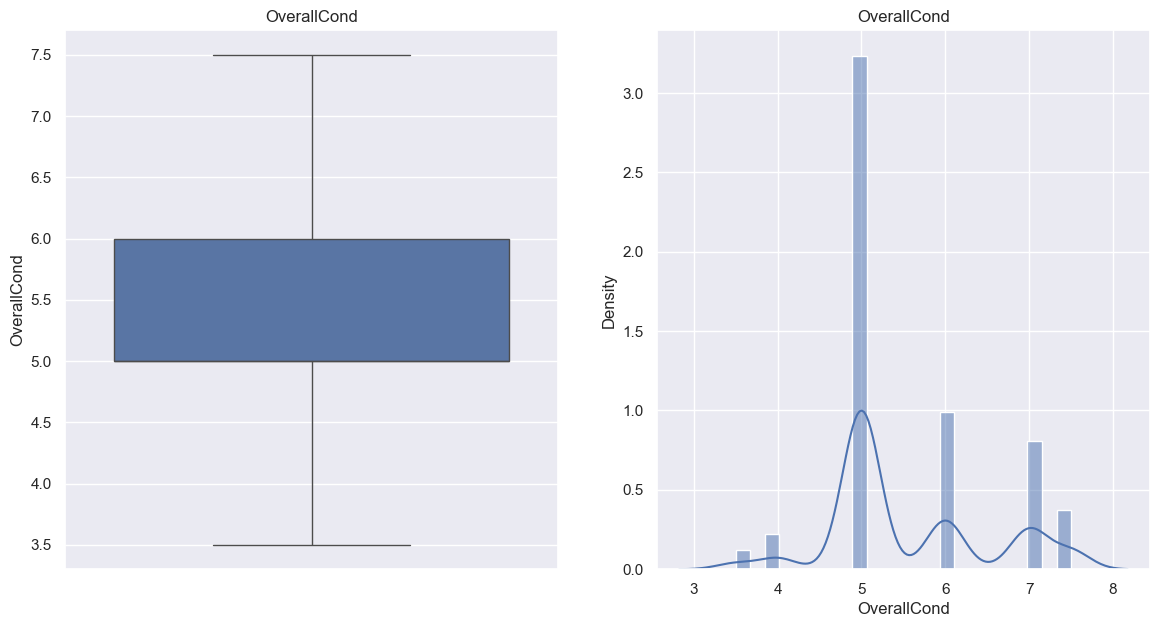

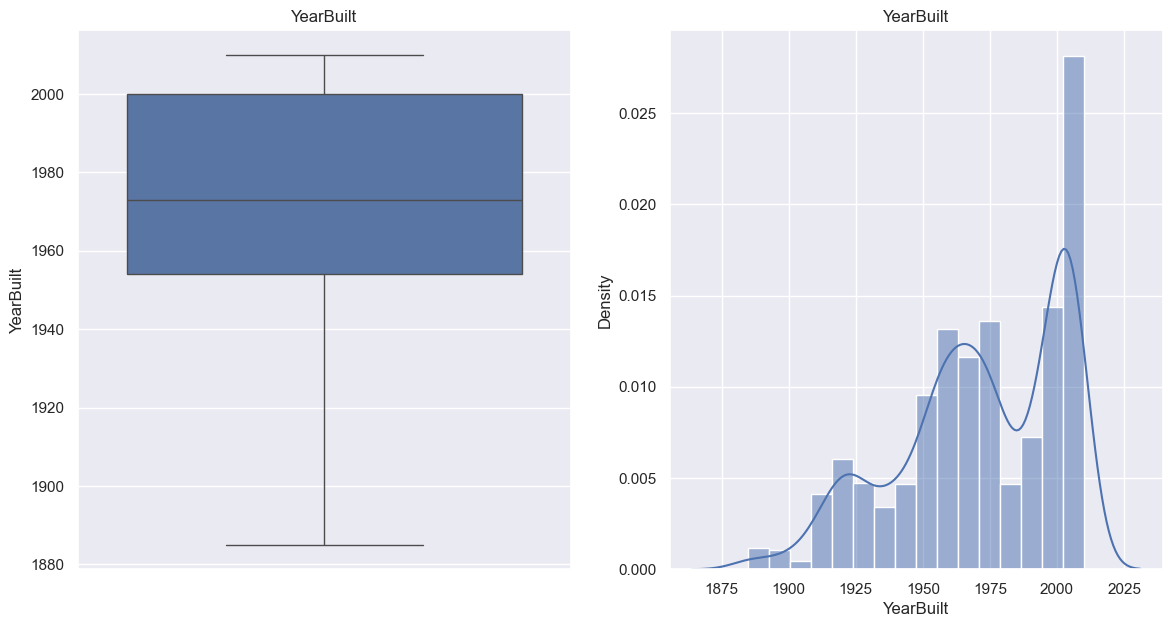

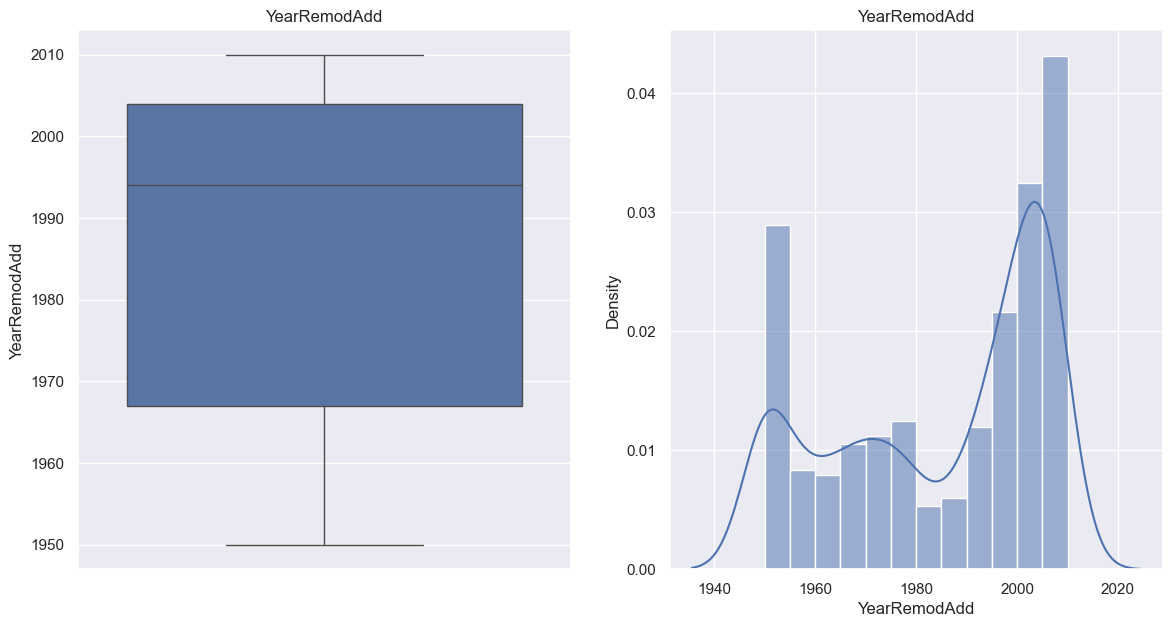

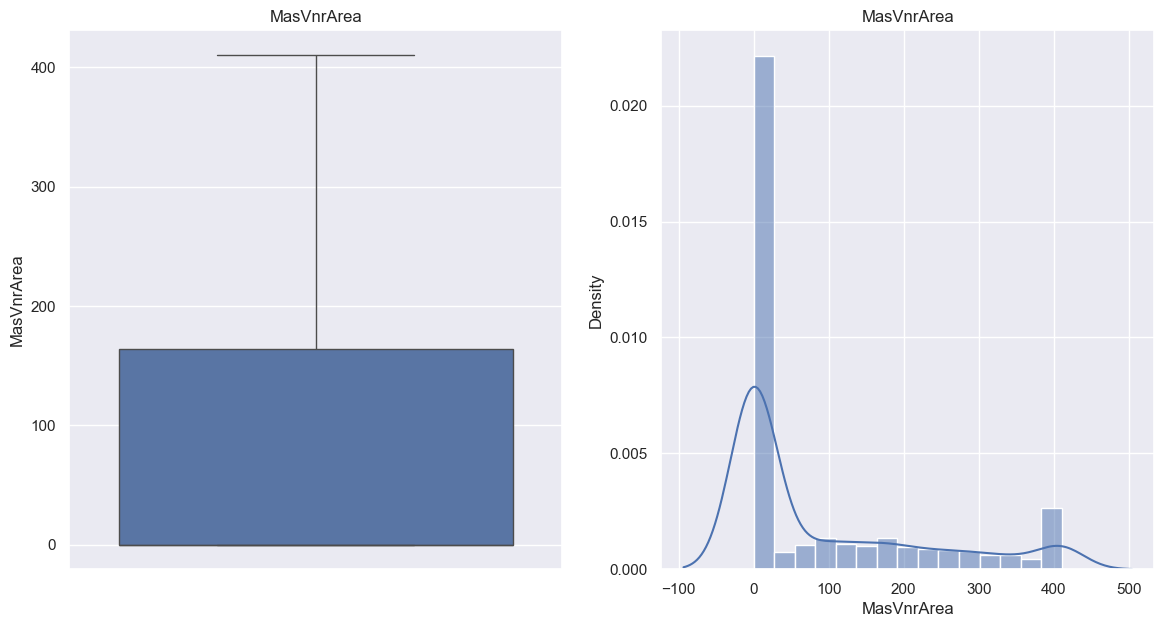

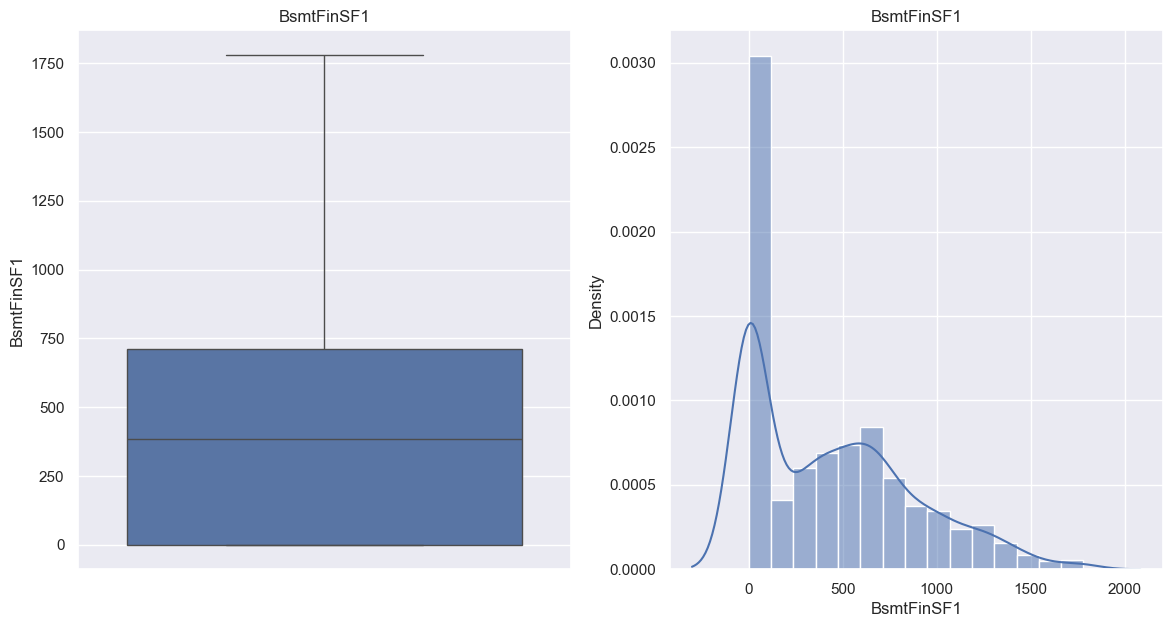

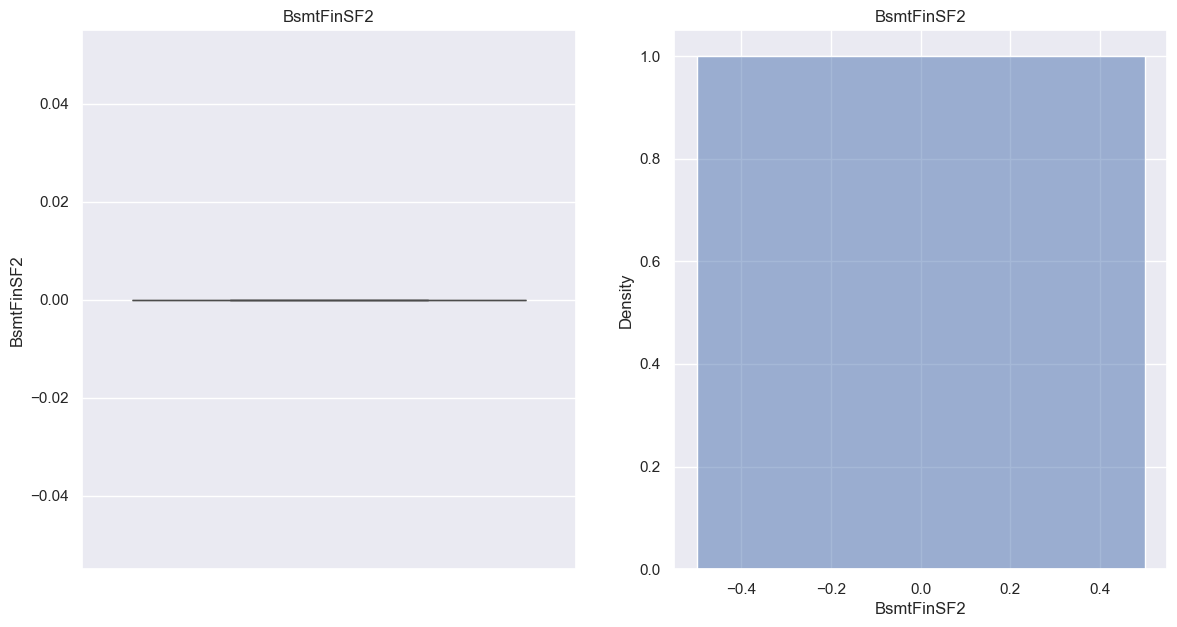

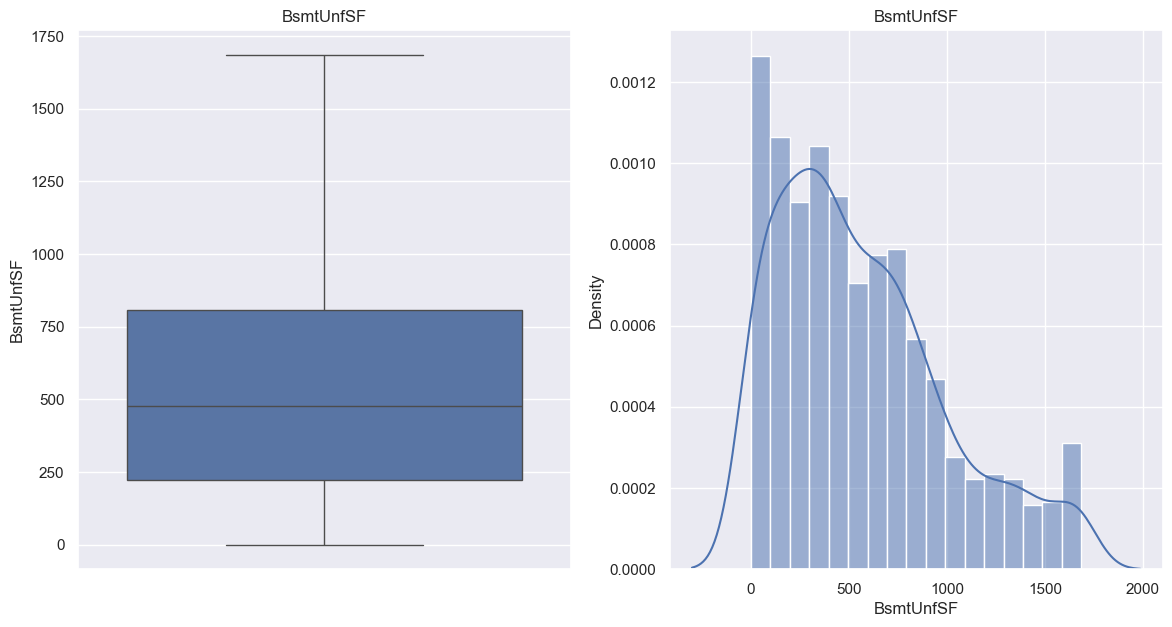

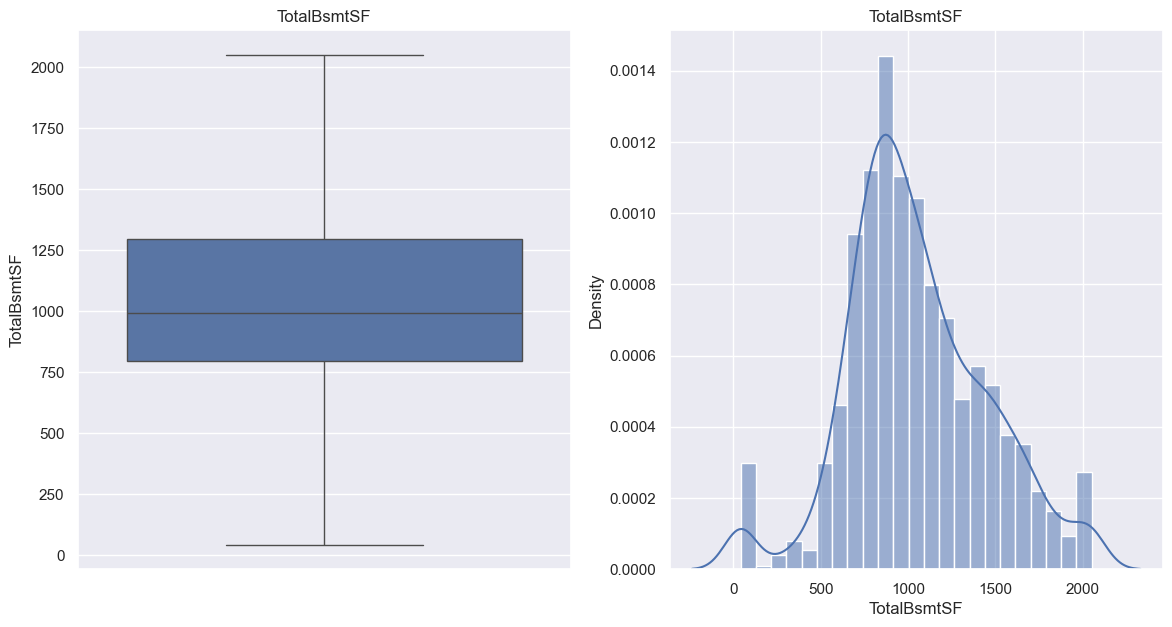

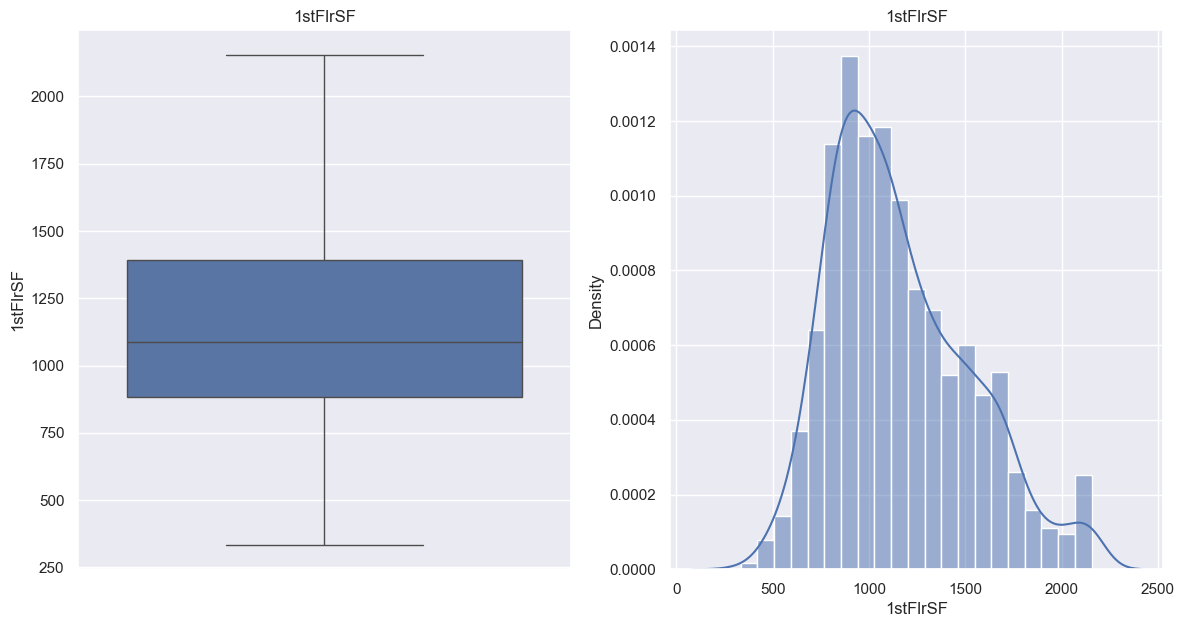

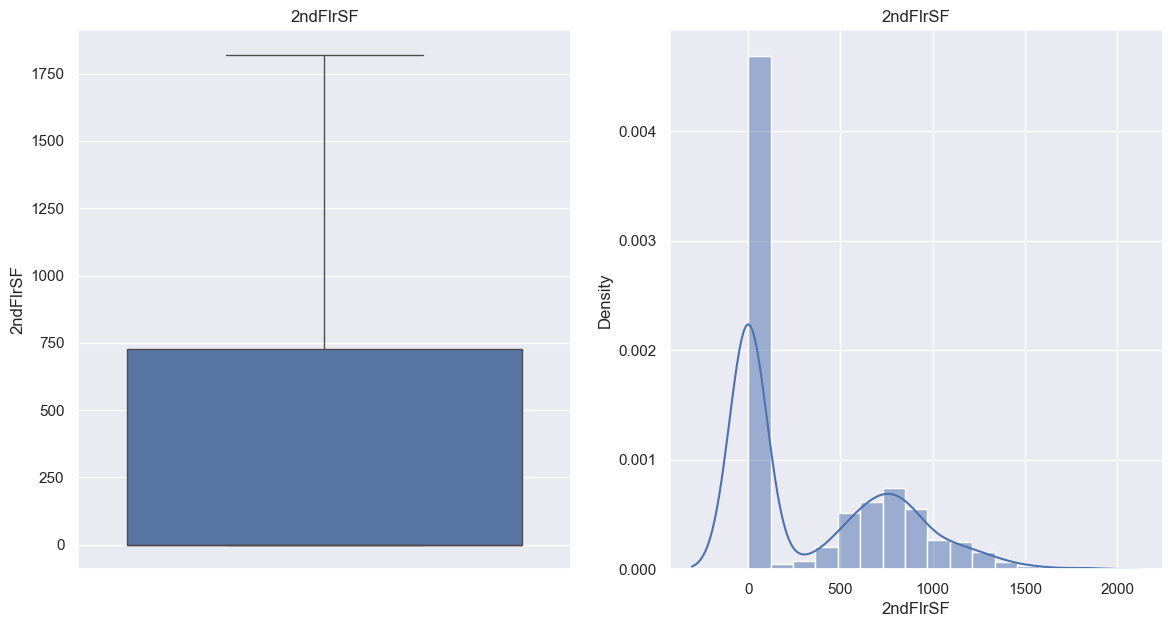

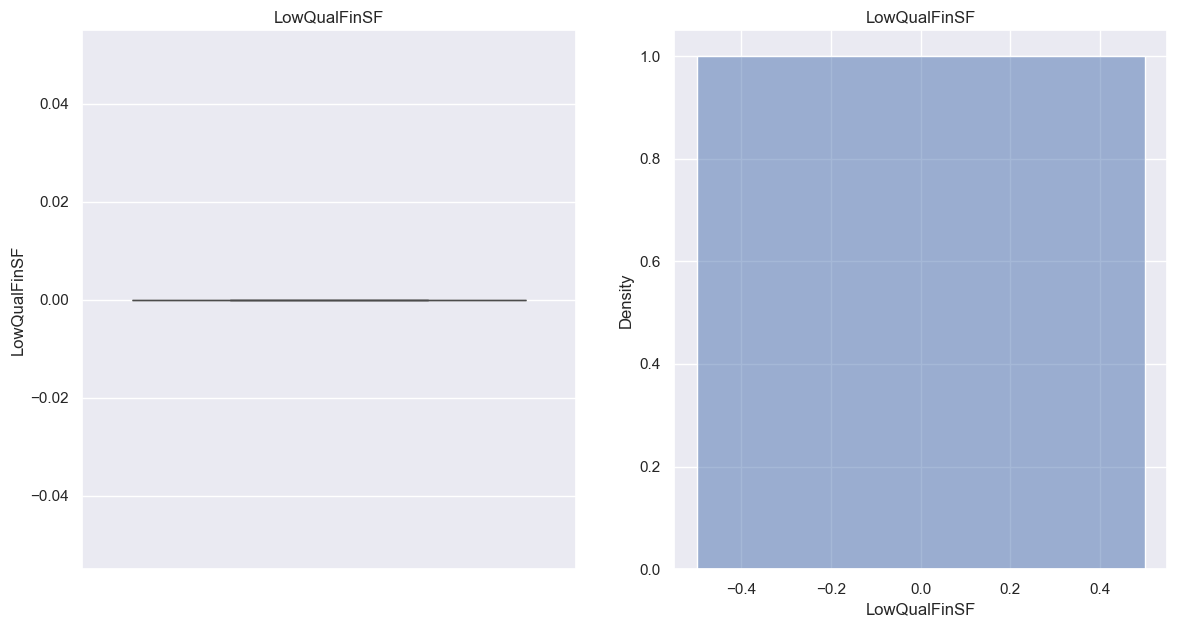

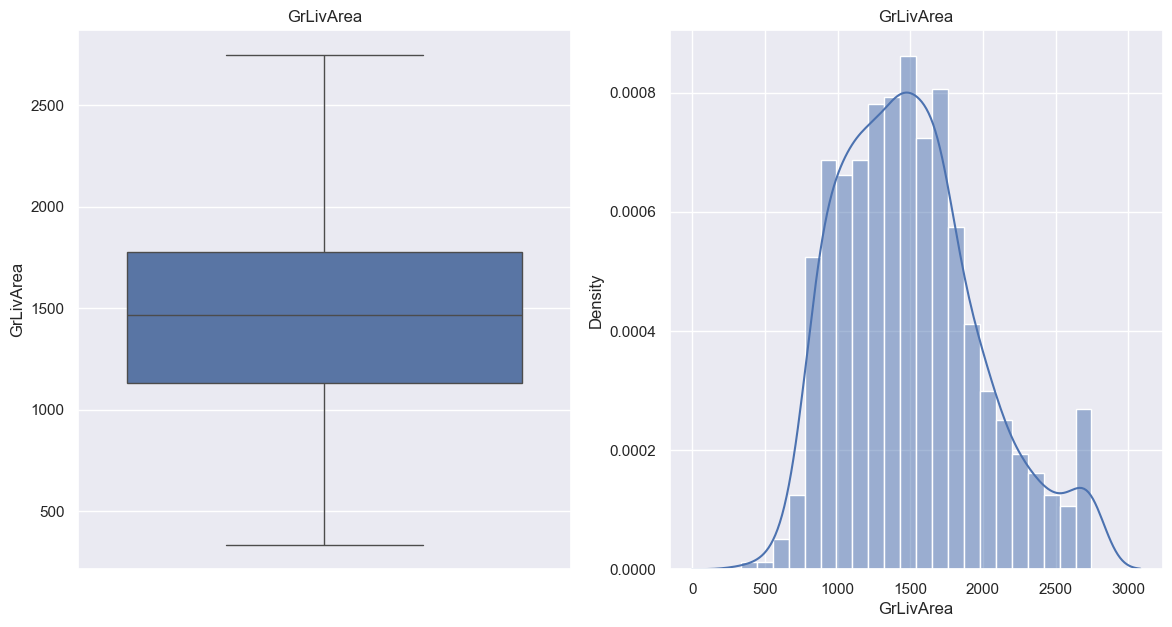

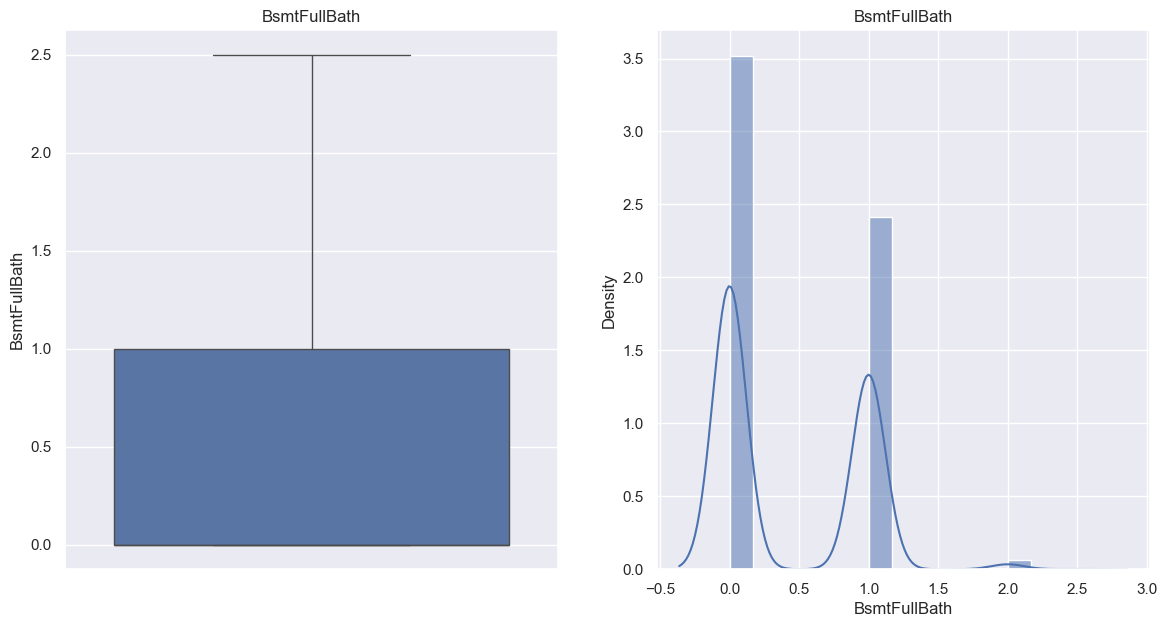

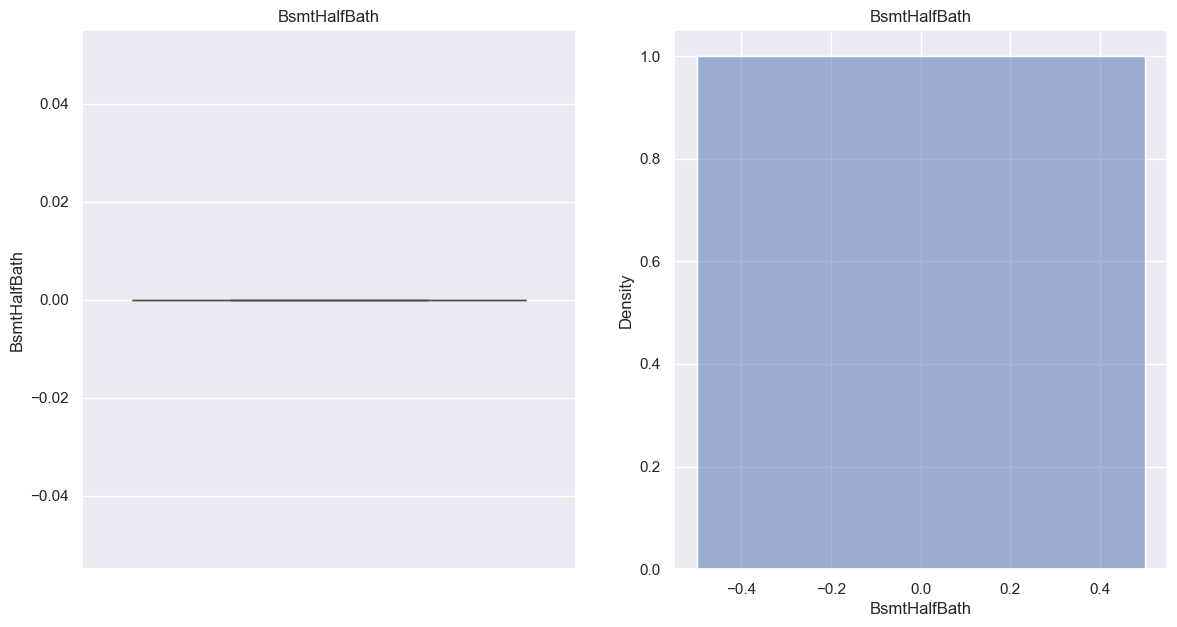

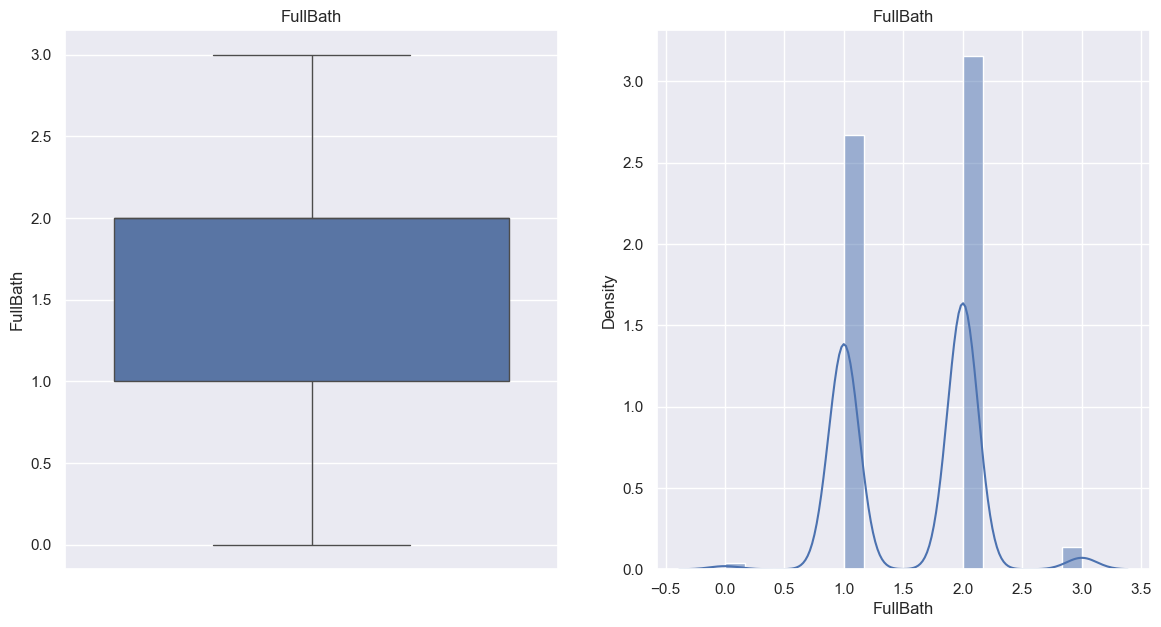

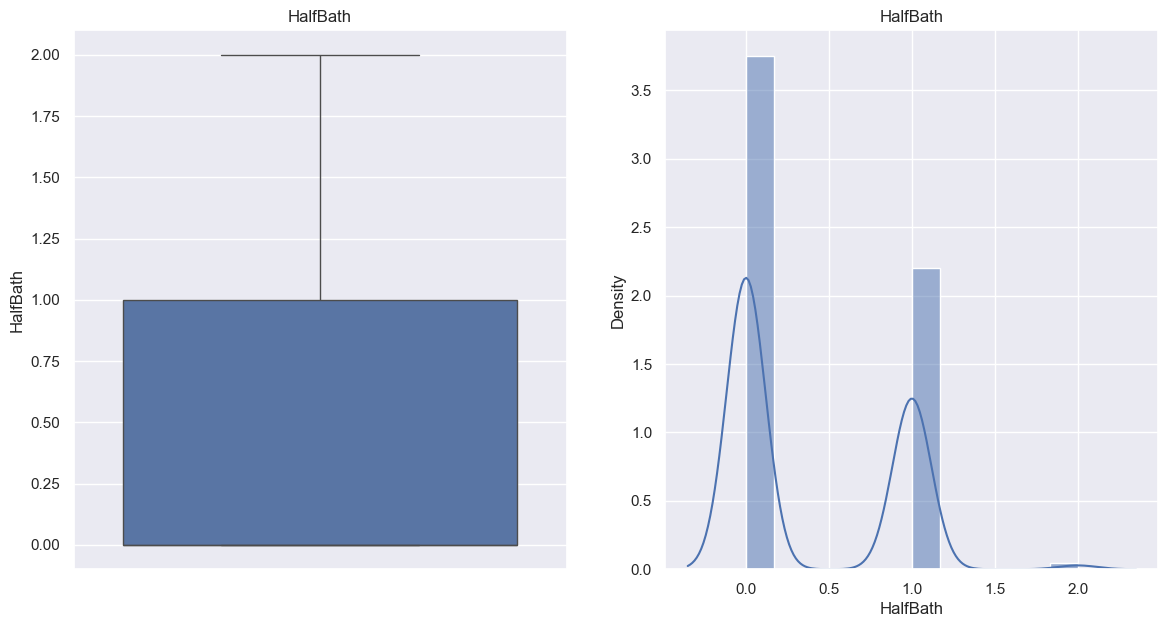

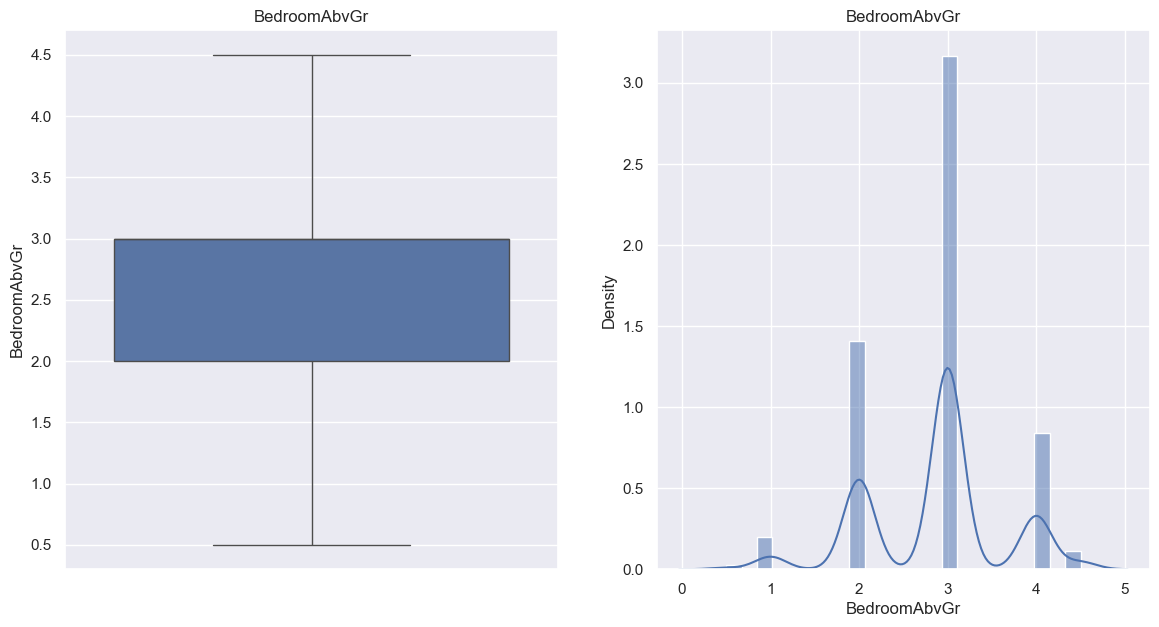

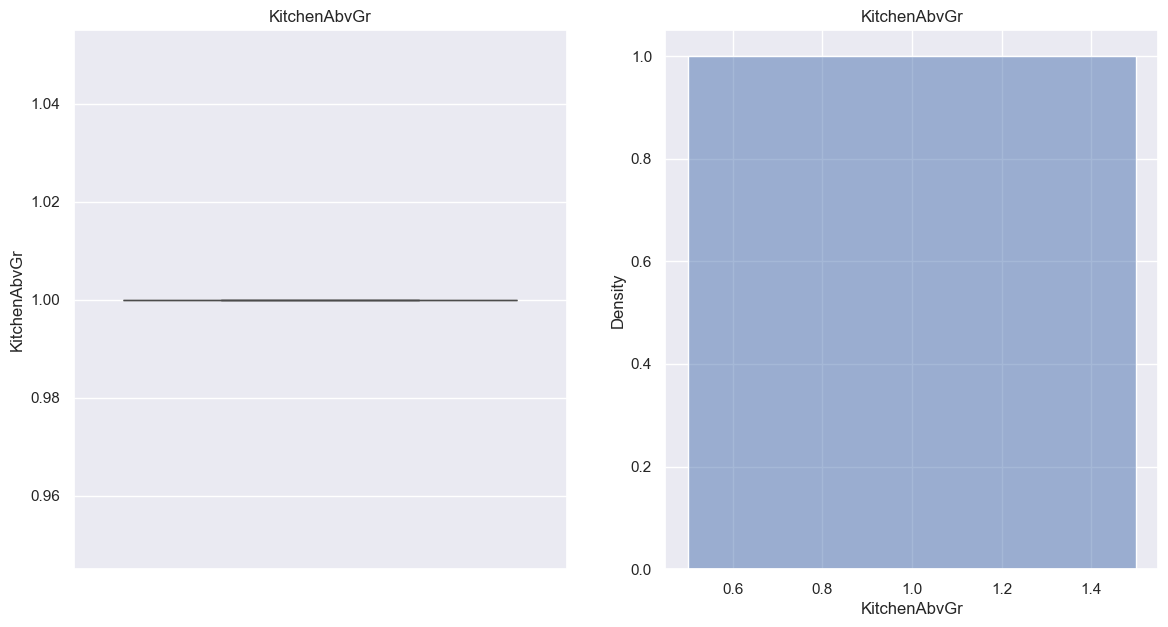

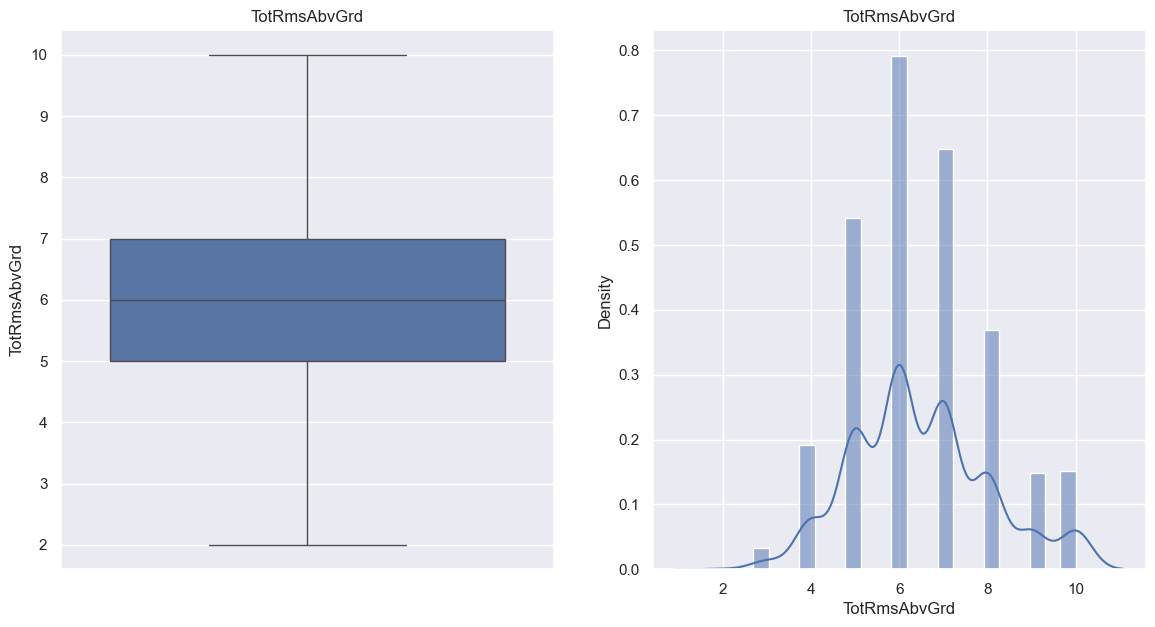

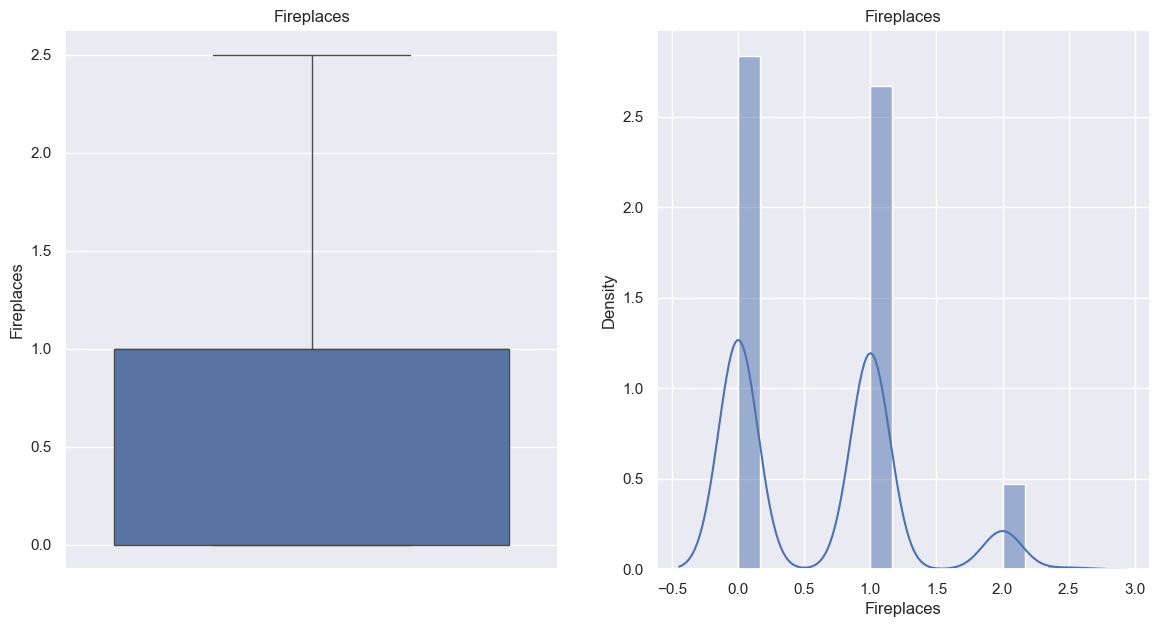

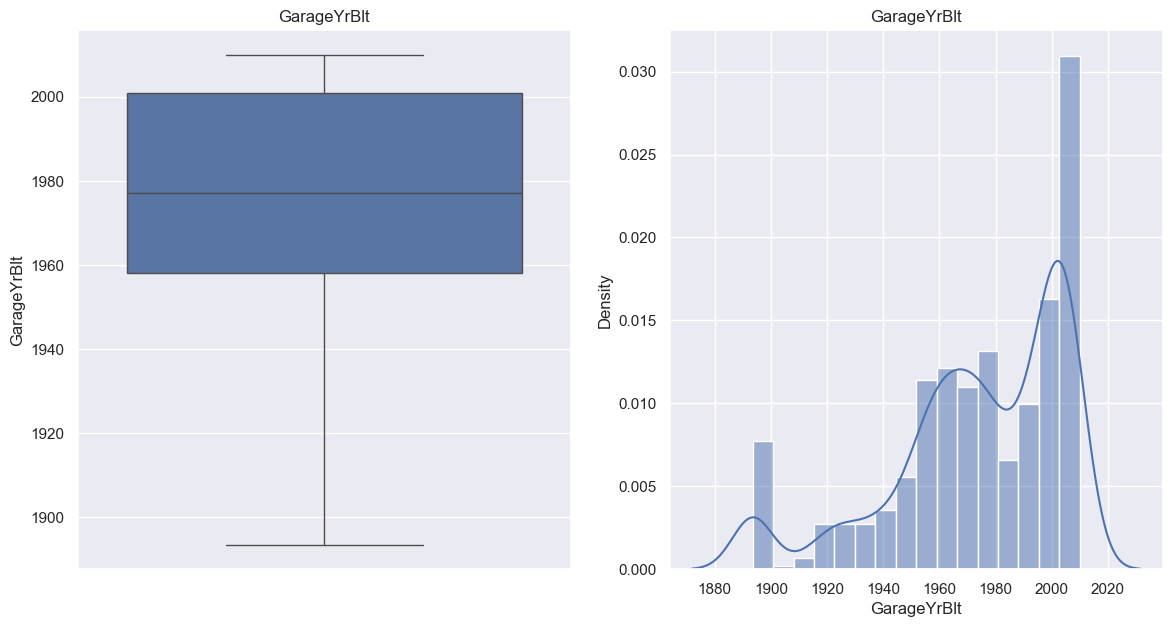

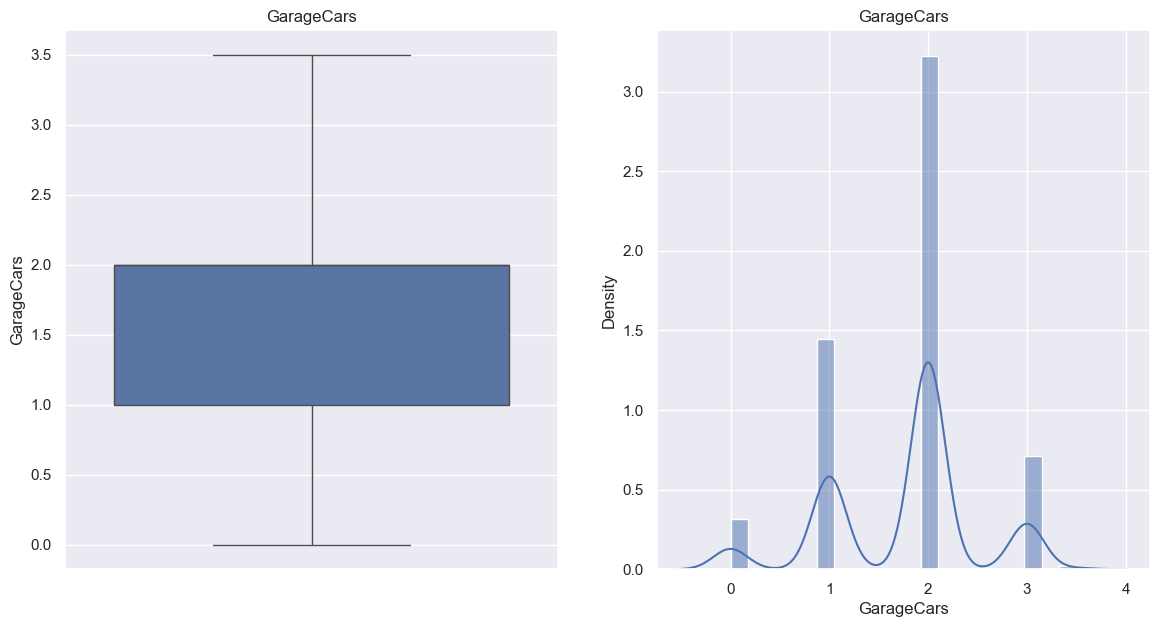

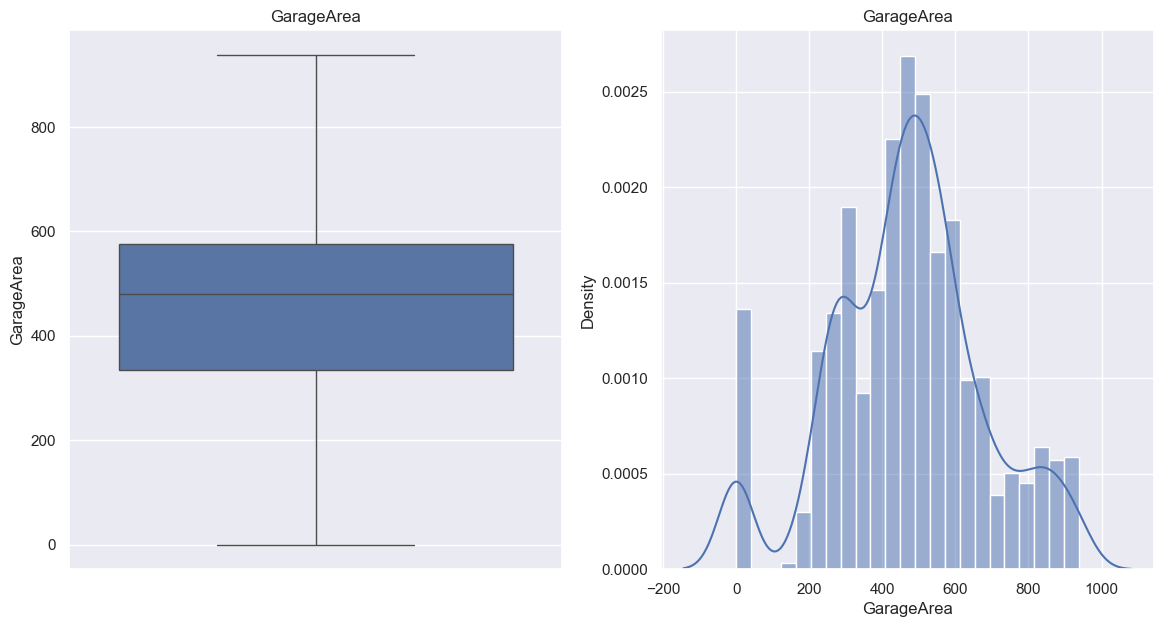

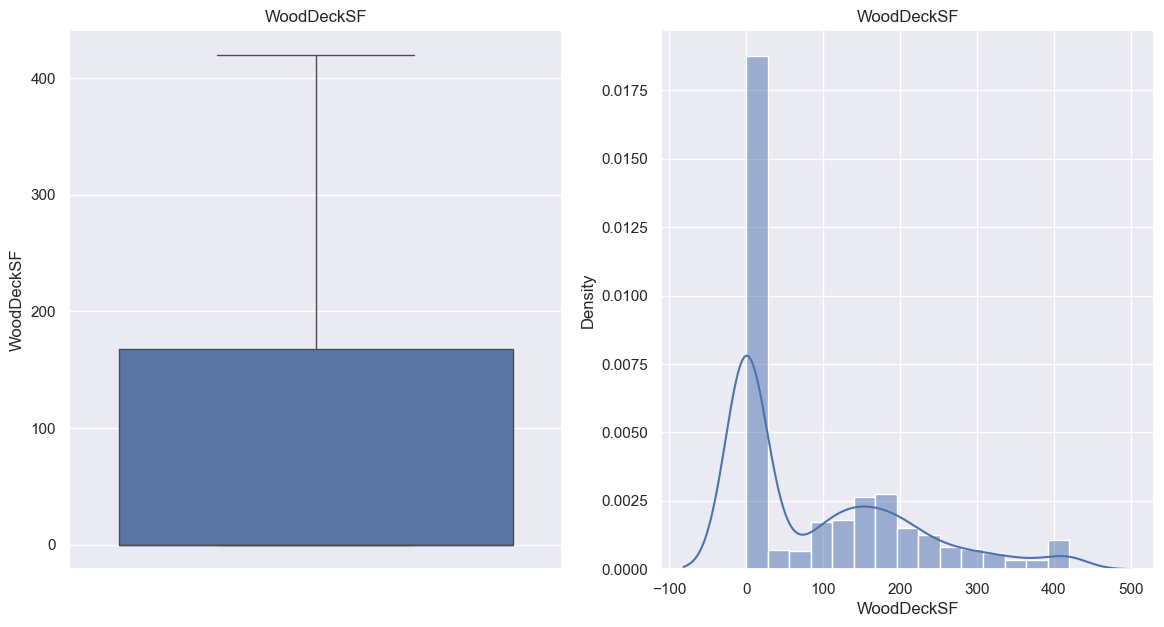

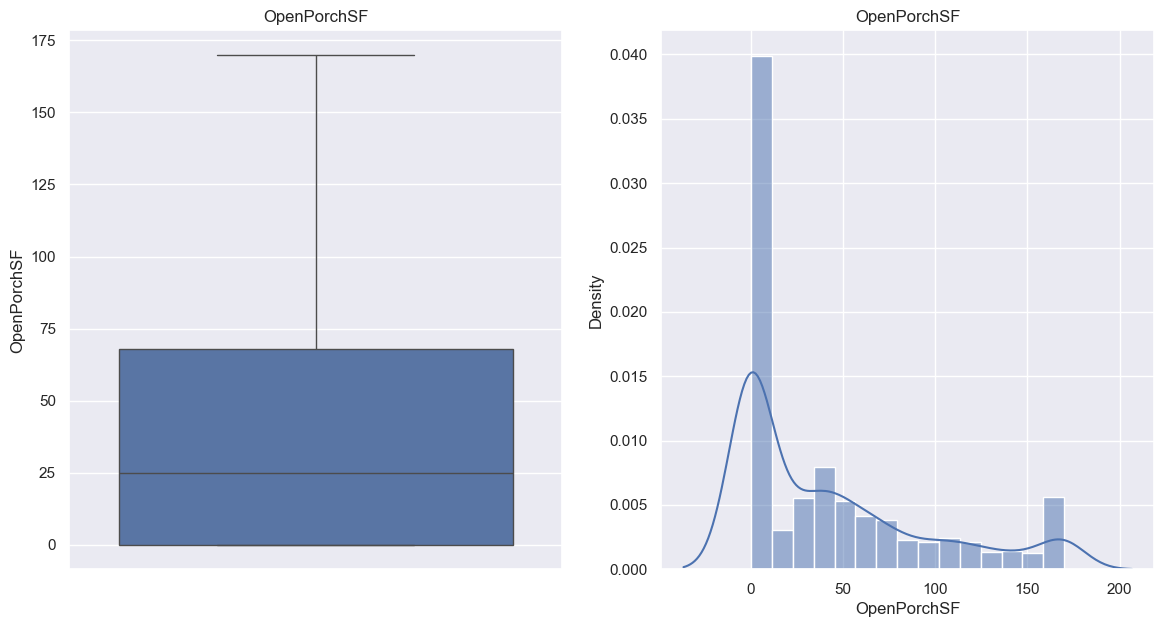

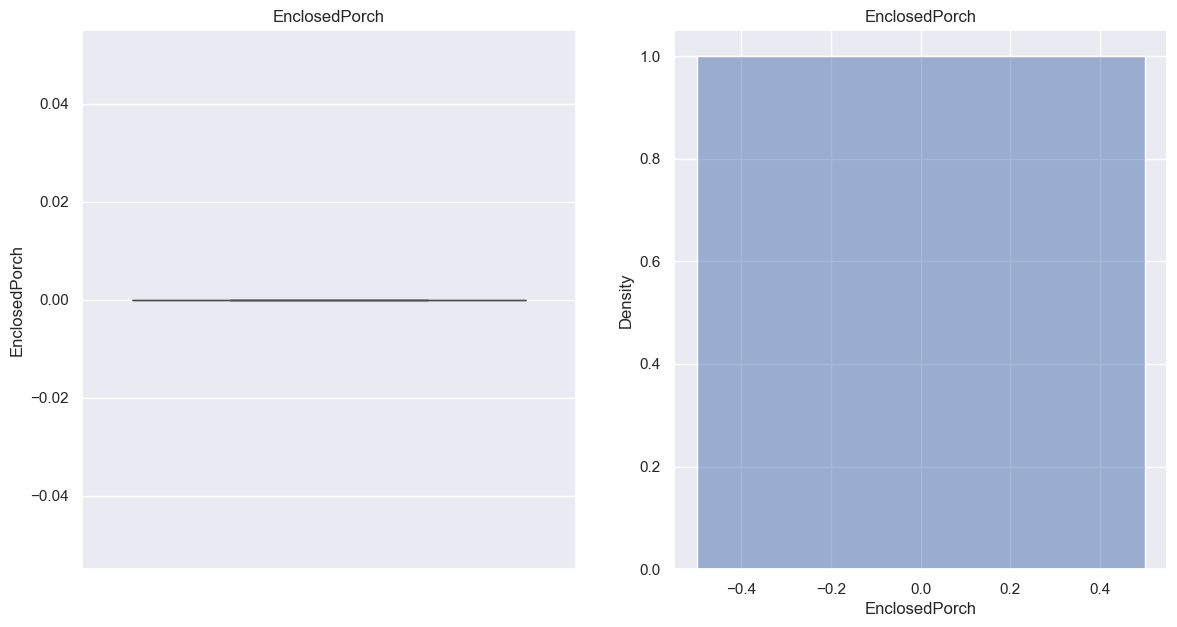

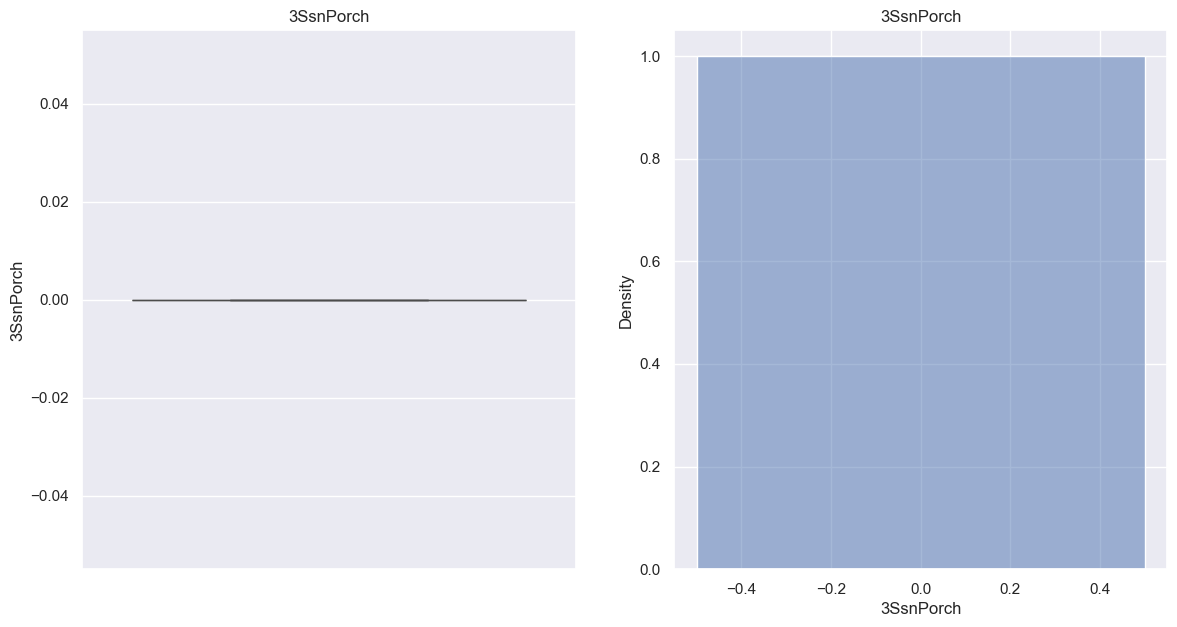

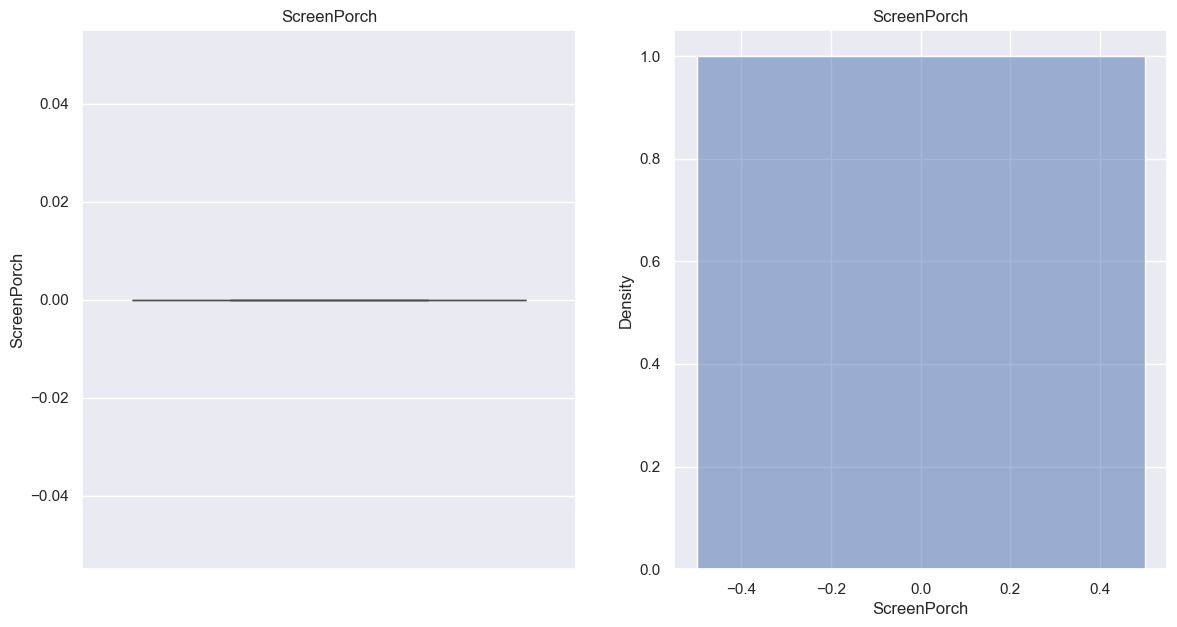

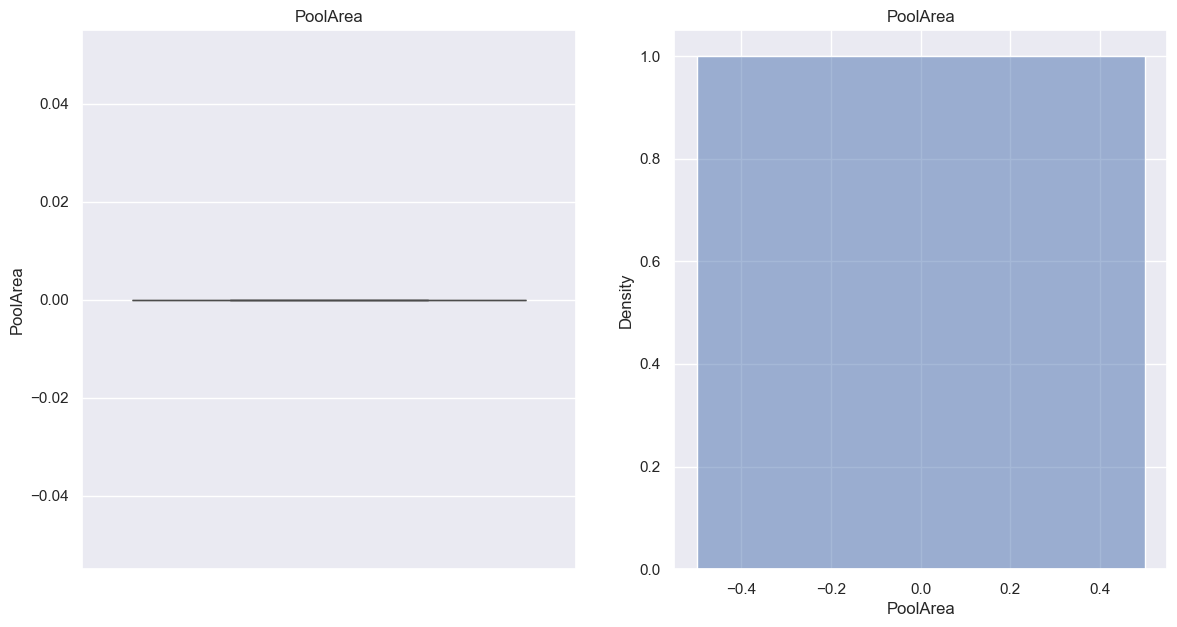

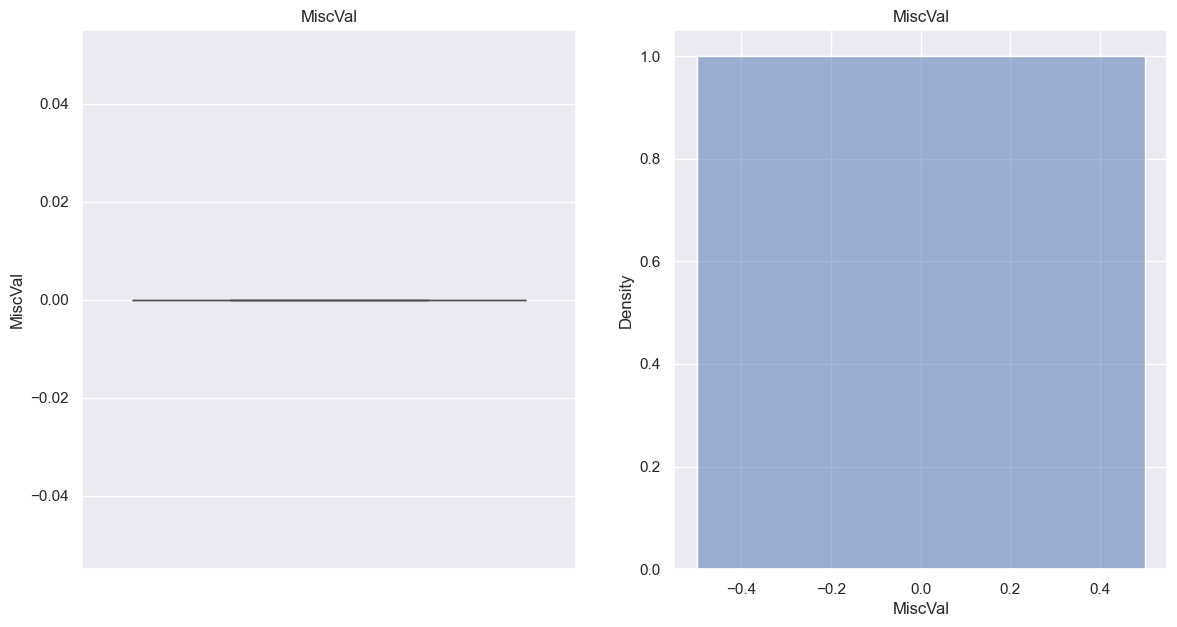

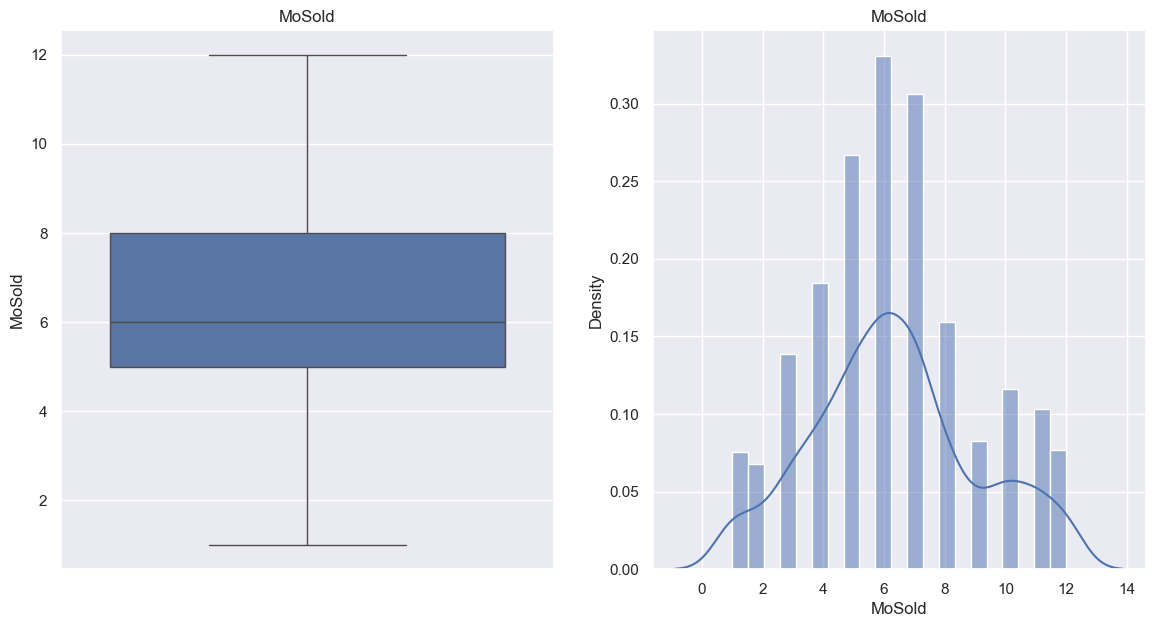

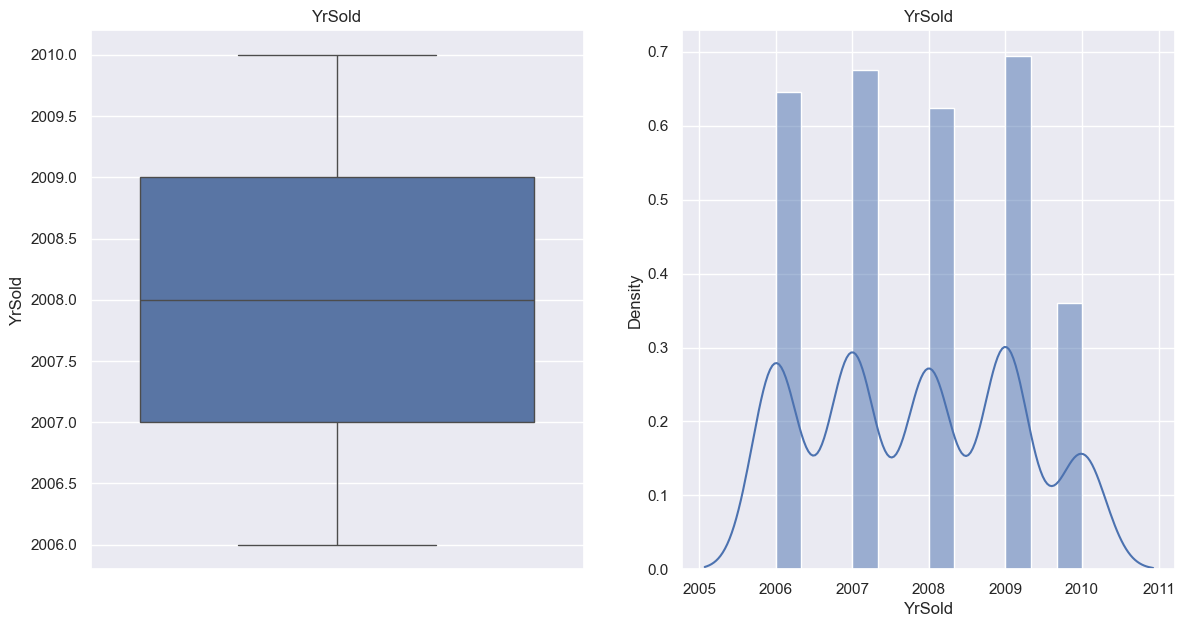

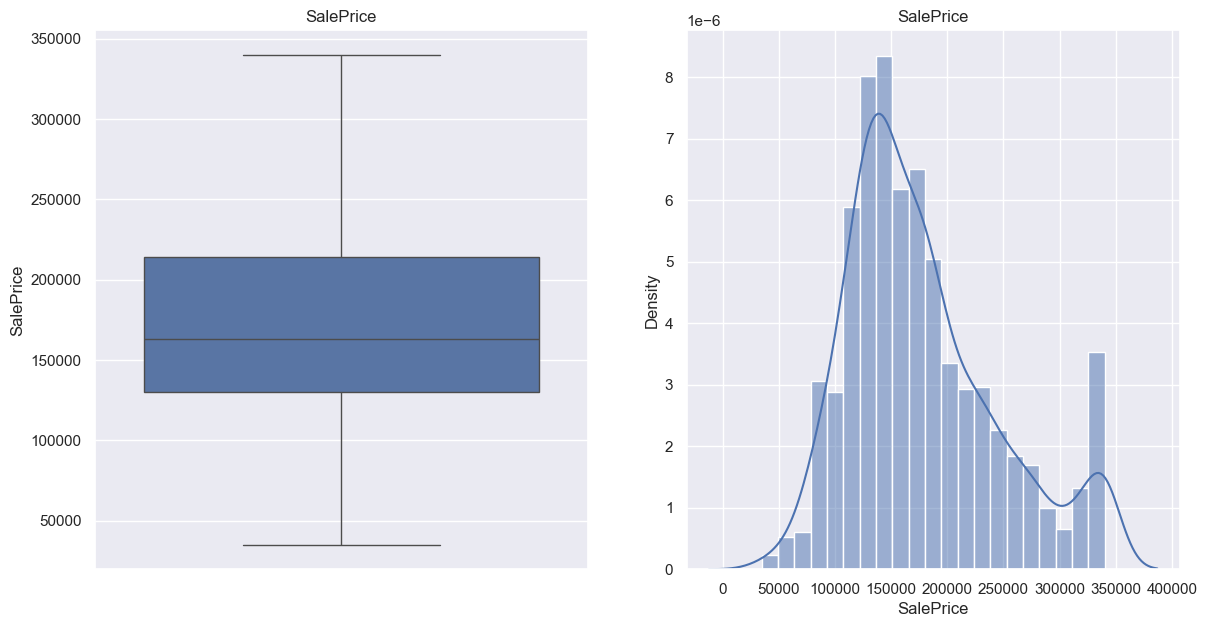

In [101]:
for col in numeric_features:
   plt.figure(figsize=(14,7))
   plt.subplot(121)
   sns.boxplot(new_df_cap[col])
   plt.title(col)
    
   plt.subplot(122)
   sns.histplot(new_df_cap[col], kde=True,stat="density", kde_kws=dict(cut=3))
   plt.title(col)
plt.show()

In [102]:
df_mvi = None 
df_mvi = new_df_cap.copy()

# Feature Transformation

# Convert Categorical Feature into  Numerical Feature

### ordinal Encoding

In [103]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuilt    

# One Hot Encoding for Nominal Categorical Data

In [104]:
df_encod= df_mvi.copy()
df_mvi.to_csv("Clean_data_house_price(80_feature).csv")
obj_feature=df_encod.select_dtypes(include="object").columns.tolist()

print("Total object type feature:",len(obj_feature))

print("Feature: \n ",obj_feature)

Total object type feature: 42
Feature: 
  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [105]:
df_encod[obj_feature].head(8)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                            
1        RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
2        RL   Pave    NA      Reg         Lvl    AllPub       FR2       Gtl   
3        RL   Pave    NA      IR1         Lvl    AllPub    Inside       Gtl   
4        RL   Pave    NA      IR1         Lvl    AllPub    Corner       Gtl   
5        RL   Pave    NA      IR1         Lvl    AllPub       FR2       Gtl   
6        RL   Pave    NA      IR1         Lvl    AllPub    Inside       Gtl   
7        RL   Pave    NA      Reg         Lvl    AllPub    Inside       Gtl   
8        RL   Pave    NA      IR1         Lvl    AllPub    Corner       Gtl   

   Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
Id                                                                             
1       CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
2       Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
3       CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
4       Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
5       NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   
6       Mitchel       Norm       Norm     1Fam     1.5Fin     Gable  CompShg   
7       Somerst       Norm       Norm     1Fam     1Story     Gable  CompShg   
8        NWAmes       PosN       Norm     1Fam     2Story     Gable  CompShg   

   Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
Id                                                                              
1      VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
2      MetalSd     MetalSd         NA        TA        TA     CBlock       Gd   
3      VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
4      Wd Sdng     Wd Shng         NA        TA        TA     BrkTil       TA   
5      VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
6      VinylSd     VinylSd         NA        TA        TA       Wood       Gd   
7      VinylSd     VinylSd      Stone        Gd        TA      PConc       Ex   
8      HdBoard     HdBoard      Stone        TA        TA     CBlock       Gd   

   BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
Id                                                                     
1        TA           No          GLQ          Unf    GasA        Ex   
2        TA           Gd          ALQ          Unf    GasA        Ex   
3        TA           Mn          GLQ          Unf    GasA        Ex   
4        Gd           No          ALQ          Unf    GasA        Gd   
5        TA           Av          GLQ          Unf    GasA        Ex   
6        TA           No          GLQ          Unf    GasA        Ex   
7        TA           Av          GLQ          Unf    GasA        Ex   
8        TA           Mn          ALQ          BLQ    GasA        Ex   

   CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
Id                                                                       
1           Y      SBrkr          Gd        Typ          NA     Attchd   
2           Y      SBrkr          TA        Typ          TA     Attchd   
3           Y      SBrkr          Gd        Typ          TA     Attchd   
4           Y      SBrkr          Gd        Typ          Gd     Detchd   
5           Y      SBrkr          Gd        Typ          TA     Attchd   
6           Y      SBrkr          TA        Typ          NA     Attchd   
7           Y      SBrkr          Gd        Typ          Gd     Attchd   
8           Y      SBrkr          TA        Typ          TA     Attchd   

   GarageFinish GarageQual GarageCond PavedDrive  Fence MiscFeature SaleType  \
Id                                                        

In [106]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[
    ("Tnf1",OneHotEncoder(drop='first',sparse_output=False),obj_feature)
],remainder='passthrough')

In [107]:
col_transformed = transformer.fit_transform(df_encod)

In [108]:
transformed_columns = transformer.get_feature_names_out()

# Convert to DataFrame
# df_encod = pd.DataFrame(col_transformed, columns=transformed_columns, index=df_encod.index)
ohe = transformer.named_transformers_['Tnf1']
ohe_feature_names = ohe.get_feature_names_out(input_features=obj_feature)

# Combine transformed and remainder columns
remainder_columns = [col for col in df.columns if col not in obj_feature]
final_columns = list(ohe_feature_names) + remainder_columns

# Create a new DataFrame with preserved column names
df_transformed = pd.DataFrame(col_transformed, columns=final_columns)

In [109]:
print("SHape of df before encoding:",df_encod.shape)

# df_encod = pd.get_dummies(df_encod, columns=obj_feature, prefix=obj_feature, drop_first=True)


print("SHape of df After encoding:",df_transformed.shape)

SHape of df before encoding: (1460, 79)
SHape of df After encoding: (1460, 257)


In [110]:
df_transformed.head(2)

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_NA  \
0          0.0          0.0          1.0          0.0          1.0       1.0   
1          0.0          0.0          1.0          0.0          1.0       1.0   

   Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
0         0.0           0.0           0.0           1.0              0.0   
1         0.0           0.0           0.0           1.0              0.0   

   LandContour_Low  LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  \
0              0.0              1.0               0.0                0.0   
1              0.0              1.0               0.0                0.0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  \
0            0.0            0.0               1.0            0.0   
1            1.0            0.0               0.0            0.0   

   LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
0            0.0                   0.0                  0.0   
1            0.0                   0.0                  0.0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                   0.0                   0.0                   1.0   
1                   0.0                   0.0                   0.0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                  0.0                   0.0                   0.0   
1                  0.0                   0.0                   0.0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                 0.0                   0.0                  0.0   
1                 0.0                   0.0                  0.0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                 0.0                  0.0                   0.0   
1                 0.0                  0.0                   0.0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   

   Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0                   0.0               0.0              1.0              0.0   
1                   1.0               1.0              0.0              0.0   

   Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   

   Condition1_RRNn  Condition2_Feedr  Condition2_Norm  Condition2_PosA  \
0              0.0               0.0              1.0              0.0   
1              0.0               0.0              1.0              0.0   

   Condition2_PosN  Condition2_RRAe  Condition2_RRAn  Condition2_RRNn  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   

   BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0              0.0              0.0             0.0              0.0   
1              0.0              0.0             0.0              0.0   

   HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  \
0                0.0                0.0                0.0                0.0   
1                0.0                1.0                0.0                0.0   

   HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  RoofStyle_Gable

## Split Data for training & Testing

In [111]:
len_train=df_train.shape[0]
len_train

1460

In [112]:
X=df_transformed.drop("SalePrice",axis=1)
y = df_transformed["SalePrice"]


print("Shape of X_train: ",X.shape)
print("Shape of y_train: ",y.shape)


Shape of X_train:  (1460, 256)
Shape of y_train:  (1460,)


# Feature Scaling

### Using standardScaler

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
# sc = StandardScaler()
# sc.fit(X_train)

# X_train=sc.transform(X_train)
# X_test=sc.transform(X_test)

In [115]:
X_train.shape

(1168, 256)

In [116]:
X_test.shape

(292, 256)

# Train ML Model With r2 score

In [117]:
from sklearn import linear_model

In [118]:
from sklearn.metrics import r2_score

def test_model(model, X_train=X_train, y_train=y_train,X_test=X_test,y_test=y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_test)
    score = r2_score(y_test, y_train_pred)
    return score


In [119]:
X.shape

(1460, 256)

In [120]:
y.shape

(1460,)

In [121]:
from sklearn.linear_model import LinearRegression
reg1 = linear_model.Ridge(alpha=0.8)
reg1.fit(X_train,y_train)
y_pred=reg1.predict(X_test)
r2_score(y_test,y_pred)

0.9058343786005251

In [122]:
# from sklearn.linear_model import LinearRegression
# lin = LinearRegression()
# lin.fit(X_train1,y_train1)
# y_pred=lin.predict(X_test1)
# r2_score(y_test1,y_pred)

In [123]:
reg = linear_model.Ridge(alpha=0.8)
test_model(reg)

0.9058343786005251

In [124]:
lasso = linear_model.Lasso(alpha=1e-4)
test_model(lasso)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.373e+11, tolerance: 5.158e+08
  model = cd_fast.enet_coordinate_descent(


0.8583823857484819

In [125]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression()
test_model(lr1)

0.8587125342758518

In [126]:
# from sklearn.linear_model import LinearRegression
# lin = LinearRegression()
# lin.fit(X_train,y_train)
# y_pred=lin.predict(X_train)
# r2_score(y_train,y_pred)

In [127]:
from sklearn.model_selection import cross_val_score


In [128]:
np.mean(cross_val_score(reg,X_train,y_train,scoring='r2',cv=10))

0.8898594358863416

In [129]:
np.mean(cross_val_score(lr1,X_train,y_train,scoring='r2',cv=10))

0.8599938183180903

In [130]:
# from sklearn.preprocessing import PowerTransformer
# pt1 = PowerTransformer(standardize=False)

# X_train_transformed2 = pt1.fit_transform(X_train)
# X_test_transformed2 = pt1.transform(X_test)

In [131]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=101)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)
print(r2_score(y_test, y_pred))

0.9123629666355615


In [132]:
np.mean(cross_val_score(rfr,X_train,y_train,scoring='r2',cv=10))

0.8779642326469672

In [133]:
import tensorflow as tf


In [134]:
X_train.shape

(1168, 256)

In [135]:
y_test.head(2)

892     154500.0
1105    325000.0
Name: SalePrice, dtype: float64

C:\Users\CHAYAN GHOSH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 30971678720.0000 - mean_absolute_error: 161674.3438 - val_loss: 3772397568.0000 - val_mean_absolute_error: 45964.0781
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2724880640.0000 - mean_absolute_error: 41395.1406 - val_loss: 2793044224.0000 - val_mean_absolute_error: 42206.1172
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2842295296.0000 - mean_absolute_error: 42512.0742 - val_loss: 2608905216.0000 - val_mean_absolute_error: 39805.2930
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2476379904.0000 - mean_absolute_error: 39819.4141 - val_loss: 2401742848.0000 - val_mean_absolute_error: 38408.6250
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2325782272.0000 - mean_absolute_error: 38204.1094 - val_loss: 2348014592.0000 - val_mean_absolute_error: 39811.1602
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 2160128512.0000 - mean_absolute_error: 37117.2734 - val_loss: 2

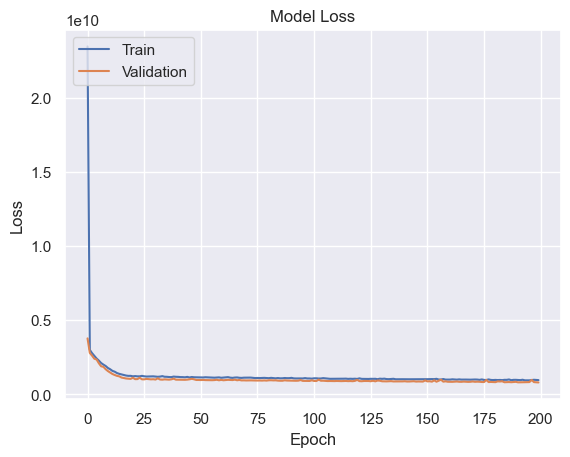

In [136]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
# from sklearn.preprocessing import PowerTransformer
# pt1 = PowerTransformer(standardize=False)

# X_train_transformed2 = pt1.fit_transform(X_train)
# X_test_transformed2 = pt1.transform(X_test)
sc = StandardScaler()
sc.fit(X_train)

X_train_transformed2=sc.transform(X_train)
X_test_transformed2=sc.transform(X_test)
# Initialize the ANN
prediction = Sequential()

# Input and first hidden layer
prediction.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu', input_dim=256))

# Hidden layer
prediction.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))

prediction.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))

# prediction.add(Dense(units=243, kernel_initializer='he_uniform', activation='relu'))

# prediction.add(Dense(units=243, kernel_initializer='he_uniform', activation='relu'))

# Output layer
prediction.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='linear'))

# Compile the ANN
prediction.compile(optimizer='Adamax', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Fit the ANN to the training set
model_history = prediction.fit(
    X_train,
    y_train,
    validation_split=0.33,
    batch_size=10,
    epochs=200
)

# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [137]:
y_pred = prediction.predict(X_test)

# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 
Mean Squared Error: 753133082.3205988
Mean Absolute Error: 19985.979438677226
R² Score: 0.8459614282139942


C:\Users\CHAYAN GHOSH\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 32232073216.0000 - mean_absolute_error: 165906.0156 - val_loss: 6299608064.0000 - val_mean_absolute_error: 61623.9883
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 4474983424.0000 - mean_absolute_error: 51784.4297 - val_loss: 3027372288.0000 - val_mean_absolute_error: 42479.7227
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3820814848.0000 - mean_absolute_error: 46738.7734 - val_loss: 2835598848.0000 - val_mean_absolute_error: 41528.9102
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3872248576.0000 - mean_absolute_error: 48292.4297 - val_loss: 2748391168.0000 - val_mean_absolute_error: 40091.8203
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3582782464.0000 - mean_absolute_error: 45890.9258 - val_loss: 2530149120.0000 - val_mean_absolute_error: 39035.0117
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3450557440.0000 - mean_absolute_error: 45867.0156 - val_loss: 2

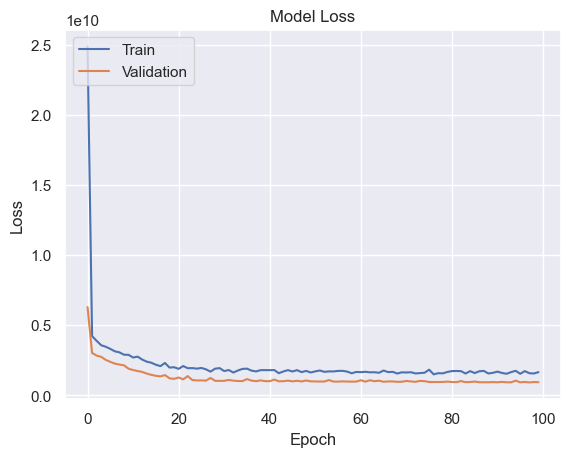

In [138]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Initialize the ANN
prediction1 = Sequential()

# Input and first hidden layer with Dropout
prediction1.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu', input_dim=256))
prediction1.add(Dropout(0.2))  # Dropout with 20% rate

# Second hidden layer with Dropout
prediction1.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))
prediction1.add(Dropout(0.3))  # Dropout with 30% rate

# Third hidden layer with Dropout
prediction1.add(Dense(units=128, kernel_initializer='he_uniform', activation='relu'))
prediction1.add(Dropout(0.3))  # Dropout with 30% rate

# Output layer
prediction1.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='linear'))

# Compile the ANN
prediction1.compile(optimizer='Adamax', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Fit the ANN to the training set
model_history = prediction1.fit(
    X_train,
    y_train,
    validation_split=0.33,
    batch_size=10,
    epochs=100
)

# Summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [139]:
y_pred = prediction1.predict(X_test)

# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 
Mean Squared Error: 889942296.8196293
Mean Absolute Error: 22515.88297303082
R² Score: 0.8179797918959324
